# PROJEKT KOŃCOWY

## 1. Część 1 - Obróbka danych

1.1. Wczytanie danych

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [134]:
! pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import mean_squared_error
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.base import clone
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from scipy import stats
from matplotlib import rcParams
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, classification_report, accuracy_score, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix #metoda która zwraca 4 najpopularniejsze miary (precyzje, recall, fl-score i support)
from sklearn.metrics import precision_score
from scipy.cluster.hierarchy import cut_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import rcParams
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [135]:
import os
os.chdir('downloads')

FileNotFoundError: [WinError 2] Det går inte att hitta filen: 'downloads'

In [136]:
os.getcwd()

'C:\\Users\\petri\\downloads'

In [137]:
data = pd.read_csv('Loan_data.csv') # Wczytanie danych

C:\Users\petri\AppData\Local\Temp\ipykernel_1380\1573991818.py:1: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Loan_data.csv') # Wczytanie danych


In [138]:
data.head() # Wyświetlenie pierwszych 5 wierszy

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501        NaN     5000.0       5000.0           4975.0   36 months   
1  1077430        NaN     2500.0       2500.0           2500.0   60 months   
2  1077175        NaN     2400.0       2400.0           2400.0   36 months   
3  1076863        NaN    10000.0      10000.0          10000.0   36 months   
4  1075358        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0   10.65%       162.87     B        B2  ...                            NaN   
1   15.27%        59.83     C        C4  ...                            NaN   
2   15.96%        84.33     C        C5  ...                            NaN   
3   13.49%       339.31     C        C1  ...                            NaN   
4   12.69%        67.79     B        B5  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  

[5 rows x 151 columns]

In [139]:
#liczba kolumn i wierszy
print(f"liczba wierszy = {data.shape[0] }")
print(f"liczba kolumn = {data.shape[1] }")

liczba wierszy = 42536
liczba kolumn = 151


In [140]:
# krotki opis kolumn
file_path = "LCDataDictionary.csv"

In [141]:
description_data = pd.read_csv(file_path)
description = description_data.dropna(axis=1, how='all').style.set_properties(subset=['Description'], **{'width': '1000px'})

In [142]:
description

 1.2. Usunięcie kolumn, które zawierają powyżej 80% wartości Nan

In [143]:
data.dropna(axis=1, thresh = int(0.8*data.shape[0]), inplace=True)
data

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1      1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2      1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3      1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4      1075358     3000.0       3000.0           3000.0   60 months   12.69%   
...        ...        ...          ...              ...         ...      ...   
42531    73582     3500.0       3500.0            225.0   36 months   10.28%   
42532    72998     1000.0       1000.0              0.0   36 months    9.64%   
42533    72176     2525.0       2525.0            225.0   36 months    9.33%   
42534    71623     6500.0       6500.0              0.0   36 months    8.38%   
42535    70686     5000.0       5000.0              0.0   36 months    7.75%   

       installment grade sub_grade                   emp_title  ...  \
0           162.87     B        B2                         NaN  ...   
1            59.83     C        C4                       Ryder  ...   
2            84.33     C        C5                         NaN  ...   
3           339.31     C        C1         AIR RESOURCES BOARD  ...   
4            67.79     B        B5    University Medical Group  ...   
...            ...   ...       ...                         ...  ...   
42531       113.39     C        C1                         NaN  ...   
42532        32.11     B        B4  Halping hands company inc.  ...   
42533        80.69     B        B3                         NaN  ...   
42534       204.84     A        A5                         NaN  ...   
42535       156.11     A        A3                   Homemaker  ...   

      policy_code application_type  acc_now_delinq chargeoff_within_12_mths  \
0             1.0       Individual             0.0                      0.0   
1             1.0       Individual             0.0                      0.0   
2             1.0       Individual             0.0                      0.0   
3             1.0       Individual             0.0                      0.0   
4             1.0       Individual             0.0                      0.0   
...           ...              ...             ...                      ...   
42531         1.0       Individual             NaN                      NaN   
42532         1.0       Individual             NaN                      NaN   
42533         1.0       Individual             NaN                      NaN   
42534         1.0       Individual             NaN                      NaN   
42535         1.0       Individual             NaN                      NaN   

      delinq_amnt pub_rec_bankruptcies tax_liens hardship_flag  \
0             0.0                  0.0       0.0             N   
1             0.0                  0.0       0.0             N   
2             0.0                  0.0       0.0             N   
3             0.0                  0.0       0.0             N   
4             0.0                  0.0       0.0             N   
...           ...                  ...       ...           ...   
42531         NaN                  NaN       NaN             N   
42532         NaN                  NaN       NaN             N   
42533         NaN                  NaN       NaN             N   
42534         NaN                  NaN       NaN             N   
42535         NaN                  NaN       NaN             N   

      disbursement_method debt_settlement_flag  
0                    Cash                    N  
1                    Cash                    N  
2                    Cash                    N  
3                    Cash                    N  
4                    Cash                    N  
...                   ...                  ...  
42531                Cash                    N  
42532                Cash                    N  
42533          

 1.3. Usunięcie kolumn, które zawierają informacje z przyszłości, niedostępne w momencie udzielania pożyczki

In [144]:
# wyszukanie kolumn, które posiadają w swojej nazwie total. Dane te są z przyszłości, nie są przydatne do modelu
data1=data.filter(like='total').columns
data1

Index(['total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee'],
      dtype='object')

In [145]:
# usuwanie wszystkich kolumn ze słowem total
data.drop('total_acc', axis=1, inplace=True)
data.drop('total_pymnt', axis=1, inplace=True)
data.drop('total_pymnt_inv', axis=1, inplace=True)
data.drop('total_rec_prncp', axis=1, inplace=True)
data.drop('total_rec_int', axis=1, inplace=True)
data.drop('total_rec_late_fee', axis=1, inplace=True)

In [146]:
# wyszukanie kolumn, które posiadają w swojej nazwie last. dane te są z przyszłości, nie są przydatne do modelu
data2=data.filter(like='last').columns
data2

Index(['inq_last_6mths', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low'],
      dtype='object')

In [147]:
# usuwanie wszystkich kolumn ze słowem last
data.drop('inq_last_6mths', axis=1, inplace=True)
data.drop('last_pymnt_d', axis=1, inplace=True)
data.drop('last_credit_pull_d', axis=1, inplace=True)
data.drop('last_fico_range_high', axis=1, inplace=True)
data.drop('last_fico_range_low', axis=1, inplace=True)
data.drop('last_pymnt_amnt', axis=1, inplace=True)

 1.4. Usunięcie kolumn ze zbędnymi informacjami

In [148]:
data.tax_liens.value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

In [149]:
# usuniecie kolumny out_prncp - informacja o pozostałym kapitale do spłaty, niepotrzebne na ten moment
# usuniecie kolumny out_prncp_inv -  informacja o części pozostałego kapitalu do spłaty, niepotrzebne na ten moment
# usuniecie kolumny policy_code -inormacja niezasadna w danej analizie 
# usuniecie kolumny pub_rec - informacja zbieżna z pub_rec_bankruptcies, a więc zostaje usunięta, aby nie tworzyć redundancji w dalszej analizie
# usuniecie kolumny tax_liens - inormacja niezasadna w danej analizie, jedna wartość 1, reszta 0
# usuniecie kolumny url - link do strony LC z danymi aukcji nie wnosi nic do naszego modelu
# usuniecie kolumny zip_code - nic nie wnosi informacja o 3 pierwszych cyfrach kodu 
data.drop('id', axis=1, inplace=True)
data.drop('out_prncp', axis=1, inplace=True)
data.drop('out_prncp_inv', axis=1, inplace=True)
data.drop('policy_code', axis=1, inplace=True)
data.drop('pub_rec', axis=1, inplace=True)
data.drop('tax_liens', axis=1, inplace=True)
data.drop('url', axis=1, inplace=True)
data.drop('emp_title', axis=1, inplace=True)
data.drop('addr_state', axis=1, inplace=True)
data.drop('zip_code', axis=1, inplace=True)
data.drop('recoveries', axis=1, inplace=True)
data.drop('revol_bal', axis=1, inplace=True)
data.drop('funded_amnt', axis=1, inplace=True)
data.drop('funded_amnt_inv', axis=1, inplace=True)

In [150]:
# usuniecie kolumny pymnt_plan - informacja o wprowadzonym planie spłaty
# usuniecie kolumny title -tytuł we wniosku o pożyczkę, niezasadne aby pozostało w analizie
# usuniecie kolumny collection_recovery_fee - inormacja niezasadna w danej analizie
# usuniecie kolumny chargeoff_within_12_mths - inormacja niezasadna w danej analizie
# usunięcie kolumny debt_settlement_flag - informacja z przyszłości
# usunięcie kolumny disbursement_method - informacja w jaki sposób kredytobiorca otrzya pożyczkę, informacja zbędna

data.drop('pymnt_plan', axis=1, inplace=True)
data.drop('title', axis=1, inplace=True)
data.drop('collection_recovery_fee', axis=1, inplace=True)
data.drop('collections_12_mths_ex_med', axis=1, inplace=True)
data.drop('chargeoff_within_12_mths', axis=1, inplace=True)
data.drop('debt_settlement_flag', axis=1, inplace=True) 
data.drop('disbursement_method', axis=1, inplace=True)

 1.5. Usunięcie kolumn tylko z jedną unikalną wartością

In [151]:
# Drop columns with unique value (Cosidering unique values as value that appears less then 3 times)
# Usuwanie kolumn z unikalną wartością (biorąc pod uwagę unikatowe wartości jako wartość, która pojawia się mniej niż 3 razy)
for col in data.columns:
    if (len(data[col].unique()) < 3):
        print(data[col].value_counts())
        print()

f    42535
Name: initial_list_status, dtype: int64

Individual    42535
Name: application_type, dtype: int64

N    42535
Name: hardship_flag, dtype: int64



In [152]:
#wyświetlenie jakie wartości unikatowe posiada kolumna initial_list_status
data['initial_list_status'].unique()

array(['f', nan], dtype=object)

In [153]:
#wyświetlenie jakie wartości unikatowe posiada kolumna application_type
data['application_type'].unique()

array(['Individual', nan], dtype=object)

In [154]:
#wyświetlenie jakie wartości unikatowe posiada kolumna hardship_flag
data['hardship_flag'].unique()

array(['N', nan], dtype=object)

In [155]:
#usunięcie kolumn, które posiadają tylko jedną unikatową wartość
data.drop('hardship_flag', axis=1, inplace=True)
data.drop('application_type', axis=1, inplace=True)
data.drop('initial_list_status', axis=1, inplace=True)

 1.6. Analiza kolumny targetowej - loan_status

In [156]:
#wyświetlenie jakie wartości unikatowe posiada kolumna targetowa - loan_status
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [157]:
#Zmiana wartości w kolumnie targetowej na wartości 0 i 1
#0 - wartość dla osób, które nie spłacily kredyt
#1 - wartość dla osób, które spłaciłyby kredyt
replace_values = {'Fully Paid' : 1, 'Charged Off' : 0, 'Does not meet the credit policy. Status:Charged Off' : 0, 'Does not meet the credit policy. Status:Fully Paid' : 1} 
data['loan_status'] = data['loan_status'].map(replace_values)

In [158]:
#wyświetlenie jakie wartości uniaktowe posiada kolumna targetowa po powyższych zmianach 
data['loan_status'].unique()

array([ 1.,  0., nan])

 1.7. Dostosowanie wartości w kolumnach do eksploracyjnej analizy danych

1.7.1 Dwie kolumny posiadają informacje w formacie liczbowym zamieniam je na float

In [159]:
data.int_rate = data.int_rate.str.rstrip('%')

In [160]:
data.revol_util = data.revol_util.str.rstrip('%')

In [161]:
for col in ['int_rate', 'revol_util']:
    data[col] = data[col].astype('float64')

1.7.2 Zmiana wartości 'emp_lenght' na wartości liczbowe

In [162]:
# zmiana wartości object na wartości liczbowe - staż pracy 
data=data.replace({'emp_length':{"10+ years":"10"}})
data=data.replace({'emp_length':{"< 1 year":"0"}})
data=data.replace({'emp_length':{'1 year':'1'}})
data=data.replace({'emp_length':{'3 years':'3'}})
data=data.replace({'emp_length':{'8 years':'8'}})
data=data.replace({'emp_length':{'9 years':'9'}})
data=data.replace({'emp_length':{'4 years':'4'}})
data=data.replace({'emp_length':{'5 years':'5'}})
data=data.replace({'emp_length':{'6 years':'6'}})
data=data.replace({'emp_length':{'2 years':'2'}})
data=data.replace({'emp_length':{'7 years':'7'}})

 1.8. Analiza brakujących wartości w kolumnach

 1.8.1. Usunięcie wierszy, w których występuje NaN

In [163]:
# Zweryfikowanie sumy występowania wartości Nan w zbiorze
data.isnull().sum()

loan_amnt                  1
term                       1
int_rate                   1
installment                1
grade                      1
sub_grade                  1
emp_length              1113
home_ownership             1
annual_inc                 5
verification_status        1
issue_d                    1
loan_status                1
purpose                    1
dti                        1
delinq_2yrs               30
earliest_cr_line          30
fico_range_low             1
fico_range_high            1
open_acc                  30
revol_util                91
acc_now_delinq            30
delinq_amnt               30
pub_rec_bankruptcies    1366
dtype: int64

In [164]:
# usuwanie wartości Nan w poszczególnych kolumnach na podstawie poprzedniego zapytania

data.dropna(subset=['emp_length'], inplace=True) 
data.dropna(subset=['delinq_2yrs'], inplace=True)
data.dropna(subset=['revol_util'], inplace=True) 
data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [165]:
# Weryfikacja wartości Nan
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
open_acc                0
revol_util              0
acc_now_delinq          0
delinq_amnt             0
pub_rec_bankruptcies    0
dtype: int64

In [166]:
data.nunique(axis=0) # sprawdzam kolumny z unikalna wartoscia

loan_amnt                 877
term                        2
int_rate                  362
installment             15461
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              4
annual_inc               5252
verification_status         3
issue_d                    52
loan_status                 2
purpose                    14
dti                      2880
delinq_2yrs                11
earliest_cr_line          518
fico_range_low             38
fico_range_high            38
open_acc                   40
revol_util               1104
acc_now_delinq              1
delinq_amnt                 1
pub_rec_bankruptcies        3
dtype: int64

In [167]:
# usunięcie zmiennych, które posiadają jedną zmienną 
data.drop('delinq_amnt', axis=1, inplace=True)
data.drop('acc_now_delinq', axis=1, inplace=True)

1.8.2 Zmiana typu wartości w kolumnach:

In [168]:
#zmiana typu danych z object na int64
data.loan_status=pd.to_numeric(data.loan_status)
data.loan_status

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
42371    0.0
42386    1.0
42454    1.0
42466    1.0
42474    1.0
Name: loan_status, Length: 40003, dtype: float64

In [169]:
#zmiana typu danych z object na int64
data.emp_length=pd.to_numeric(data.emp_length)
data.emp_length

0        10
1         0
2        10
3        10
4         1
         ..
42371     4
42386     9
42454     5
42466     8
42474     2
Name: emp_length, Length: 40003, dtype: int64

In [170]:
#zmiana typu danych z object na float64
data.revol_util=data.revol_util.astype('float64')
data.revol_util

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
42371    71.8
42386    96.2
42454    12.6
42466    79.7
42474    50.2
Name: revol_util, Length: 40003, dtype: float64

In [171]:
#zmiana typu danych z object na float64
data.int_rate=data.int_rate.astype('float64')
data.int_rate 

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
42371    15.96
42386    17.86
42454    13.43
42466    12.80
42474    10.91
Name: int_rate, Length: 40003, dtype: float64

In [172]:
print(f"liczba wierszy = {data.shape[0] }")
print(f"liczba kolumn = {data.shape[1] }")

liczba wierszy = 40003
liczba kolumn = 21


In [173]:
data['loan_status']

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
42371    0.0
42386    1.0
42454    1.0
42466    1.0
42474    1.0
Name: loan_status, Length: 40003, dtype: float64

In [174]:
data.loan_status=data.loan_status.astype('int')
data.loan_status

0        1
1        0
2        1
3        1
4        1
        ..
42371    0
42386    1
42454    1
42466    1
42474    1
Name: loan_status, Length: 40003, dtype: int32

Podsumowanie Część 1 - Obróbka danych
 Przeanalizowano wczytany zbiór danych, pod kątem przydatności danych:
- usunięto kolumny, które są zbędne podczas procesu uczenia maszynowego,
- usunięto kolumny, które posiadały więcej niż 80% wartosći Nan,
- usunięto kolumny, w których występowała tylko jedna unikalna wartość,
- usunięto kolumny, które przedstawiały informacje z przyszłości, niedostępne w momencie udzielania pożyczki.
- dane zostały poddane przekształceniu wartości w kolumnach (zmiana wartości procentowych na wartości liczbowe, usunięcie dodatkowych znaków i pozostawienie jedynie wartości liczbowych)
- do dalszej analizy zostało wyselekconowane 21 kolumn ze 151 kolumn zbioru pierwotnego, dodatkowo w pierwotnym zbiorze było 42536 wierszy, obecnie do dalszej analizy będzie brane  40003.

In [175]:
data.shape

(40003, 21)

# Część 2 - Eksploracyjna analiza danych

2.1. Wizualizacja danych, które zostaną poddane do analizy


Do wizualizacji będą brane jedynie kolumny z wartościami o typie float64

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40003 entries, 0 to 42474
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             40003 non-null  float64
 1   term                  40003 non-null  object 
 2   int_rate              40003 non-null  float64
 3   installment           40003 non-null  float64
 4   grade                 40003 non-null  object 
 5   sub_grade             40003 non-null  object 
 6   emp_length            40003 non-null  int64  
 7   home_ownership        40003 non-null  object 
 8   annual_inc            40003 non-null  float64
 9   verification_status   40003 non-null  object 
 10  issue_d               40003 non-null  object 
 11  loan_status           40003 non-null  int32  
 12  purpose               40003 non-null  object 
 13  dti                   40003 non-null  float64
 14  delinq_2yrs           40003 non-null  float64
 15  earliest_cr_line   

In [177]:
# lub dla zmiennych numerycznych

print(*data.select_dtypes('number').columns.to_list(), sep='\n')

loan_amnt
int_rate
installment
emp_length
annual_inc
loan_status
dti
delinq_2yrs
fico_range_low
fico_range_high
open_acc
revol_util
pub_rec_bankruptcies


Dane statystyczne dla każej z kolumn

In [178]:
# Sprawdzam podstawowe informacje - średnią, minimum, maximum, itd.
data.describe().T

count          mean           std      min       25%  \
loan_amnt             40003.0  11232.427568   7443.612602   500.00   5500.00   
int_rate              40003.0     12.201482      3.726918     5.42      9.63   
installment           40003.0    325.718770    209.201013    15.67    167.77   
emp_length            40003.0      4.973877      3.559966     0.00      2.00   
annual_inc            40003.0  69927.616656  63983.814055  3300.00  41628.00   
loan_status           40003.0      0.854111      0.352999     0.00      1.00   
dti                   40003.0     13.440492      6.678122     0.00      8.32   
delinq_2yrs           40003.0      0.149639      0.501641     0.00      0.00   
fico_range_low        40003.0    713.424243     35.670997   640.00    685.00   
fico_range_high       40003.0    717.424243     35.670997   644.00    689.00   
open_acc              40003.0      9.376847      4.436273     1.00      6.00   
revol_util            40003.0     49.349555     28.276366     0.00     26.10   
pub_rec_bankruptcies  40003.0      0.043597      0.205176     0.00      0.00   

                           50%       75%         max  
loan_amnt             10000.00  15000.00    35000.00  
int_rate                 11.99     14.79       24.59  
installment             280.83    432.26     1305.19  
emp_length                4.00      9.00       10.00  
annual_inc            60000.00  84000.00  6000000.00  
loan_status               1.00      1.00        1.00  
dti                      13.53     18.71       29.99  
delinq_2yrs               0.00      0.00       11.00  
fico_range_low          710.00    740.00      825.00  
fico_range_high         714.00    744.00      829.00  
open_acc                  9.00     12.00       46.00  
revol_util               49.90     72.90      108.80  
pub_rec_bankruptcies      0.00      0.00        2.00

Przedstawienie danych za pomocą histogramów

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'emp_length'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'loan_status'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>],
       [<AxesSubplot:title={'center':'fico_range_low'}>,
        <AxesSubplot:title={'center':'fico_range_high'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'pub_rec_bankruptcies'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

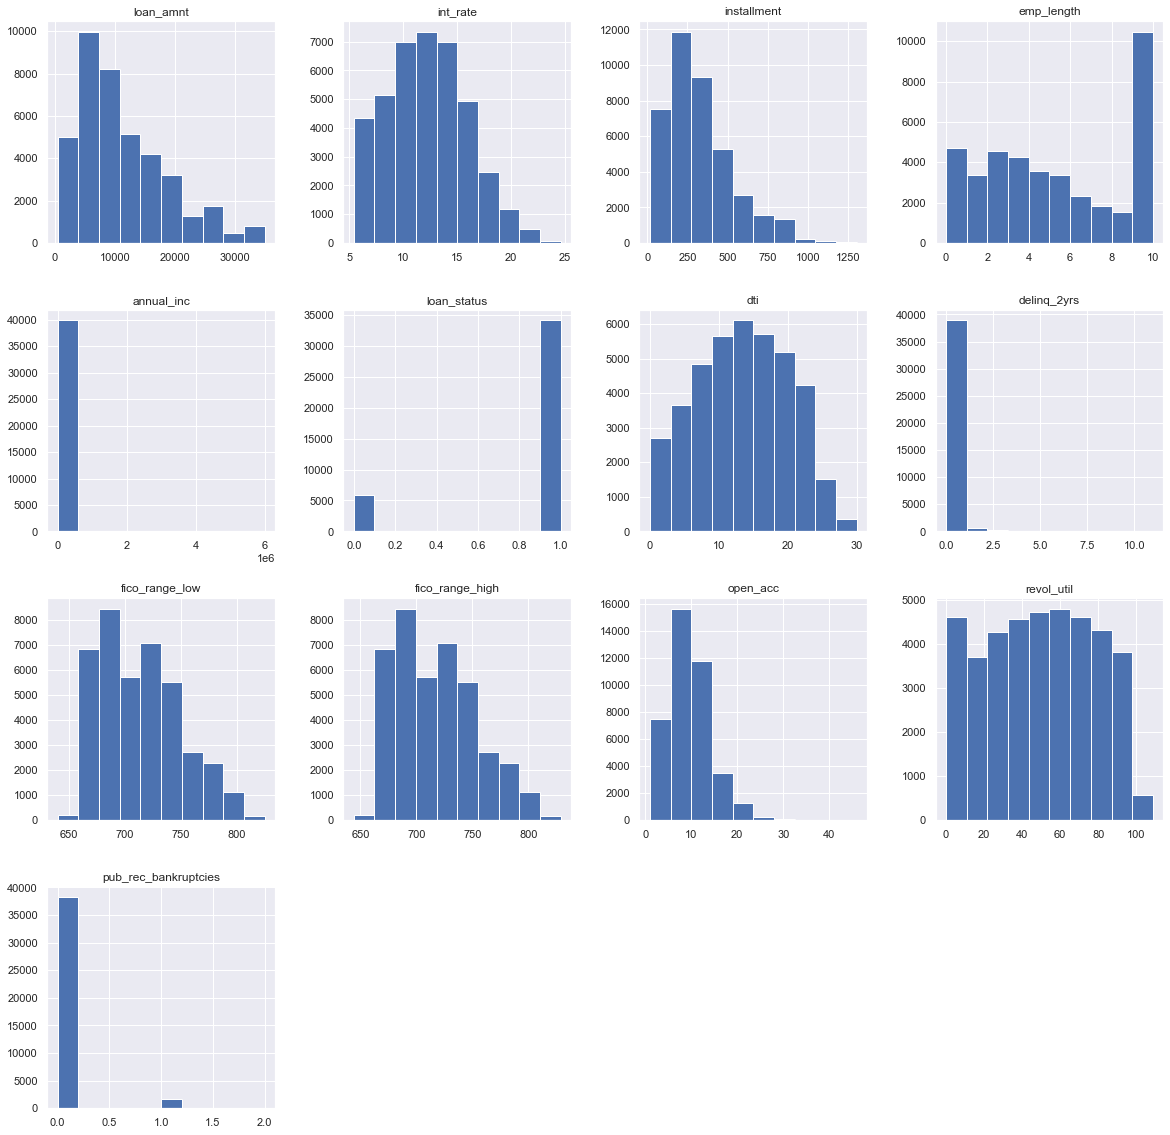

In [179]:
 data.hist(figsize=(20,20))

Zakresy i występowanie outlierów

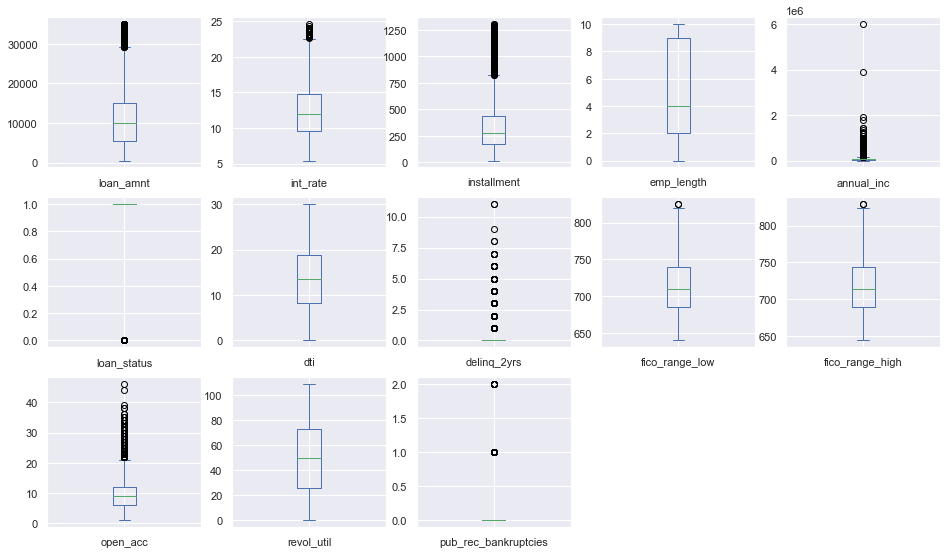

In [180]:
# Plotuję dane, aby mieć graficzny pogląd
data.plot(kind = 'box', figsize = (16, 16), subplots = True, layout = (5, 5), sharex = False, sharey = False)
plt.show()

Weryfikacja kolumny targetowej

In [181]:
print(data.loan_status)

0        1
1        0
2        1
3        1
4        1
        ..
42371    0
42386    1
42454    1
42466    1
42474    1
Name: loan_status, Length: 40003, dtype: int32


In [182]:
#zliczenie ilości występowania 0 i 1  
data.loan_status.value_counts()

1    34167
0     5836
Name: loan_status, dtype: int64

In [183]:
# Zgodnie ze zbiorem danych, aż 32968 osób spłaciło kredyt, jedynie 5549 osób nie spłaciło finalnie kredytu

<AxesSubplot:>

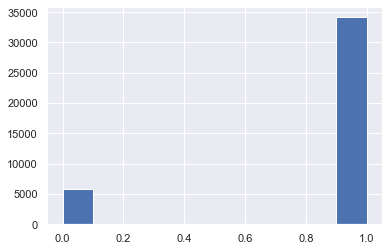

In [184]:
data.loan_status.hist()

Weryfikacja korelacji zmiennych z wartoscią targetową

In [185]:
sns.pairplot(data, hue='loan_status', palette='Set1')...

SyntaxError: invalid syntax (2724041146.py, line 1)

In [186]:
# Przed przystąpieniem do przygotowania macierzy korelacji, przerzucam target na ostatnie miejsce w kolumnie
new_cols = [col for col in data.columns if col != 'loan_status'] + ['loan_status']
data = data[new_cols]

Text(0.5, 1.0, 'Korelacje pomiędzy zmiennymi')

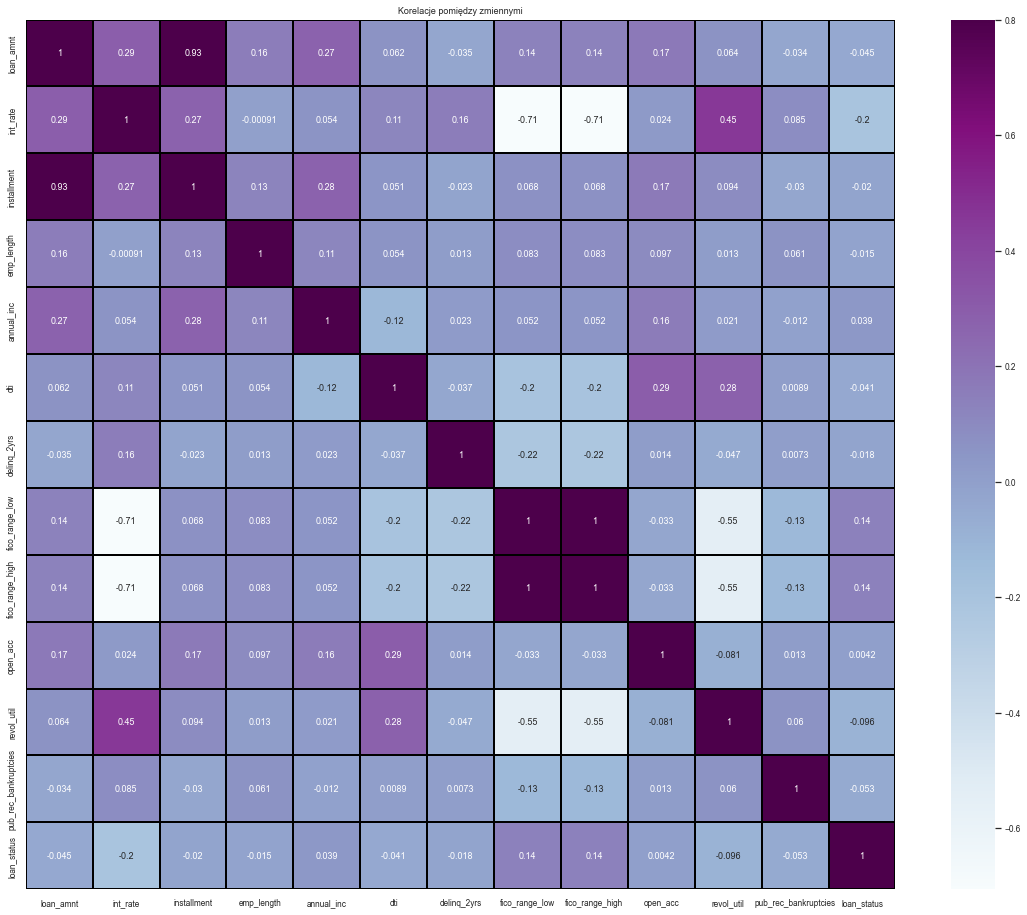

In [187]:
# Tworzę macierz korelacji
corr_all = data.corr()
sns.set(font_scale = 0.75)
plt.figure(figsize = (20, 16))
sns.heatmap(corr_all, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap = 'BuPu', linecolor = 'black')
plt.title('Korelacje pomiędzy zmiennymi')

Większość uzyskanych korelacji to korelacje pozytywne, jednak występują również korelacje negatywne (czyli takie, gdzie gdy wartość jednej zmiennej rośnie to wartość drugiej maleje) - najsilniejsze przy int_rate i fico_range oraz przy fico_range i revol_util

In [188]:
# Pozbywam się outlierów
data = data[(np.abs(stats.zscore(data.select_dtypes(include = np.number))) < 5).all(axis = 1)]

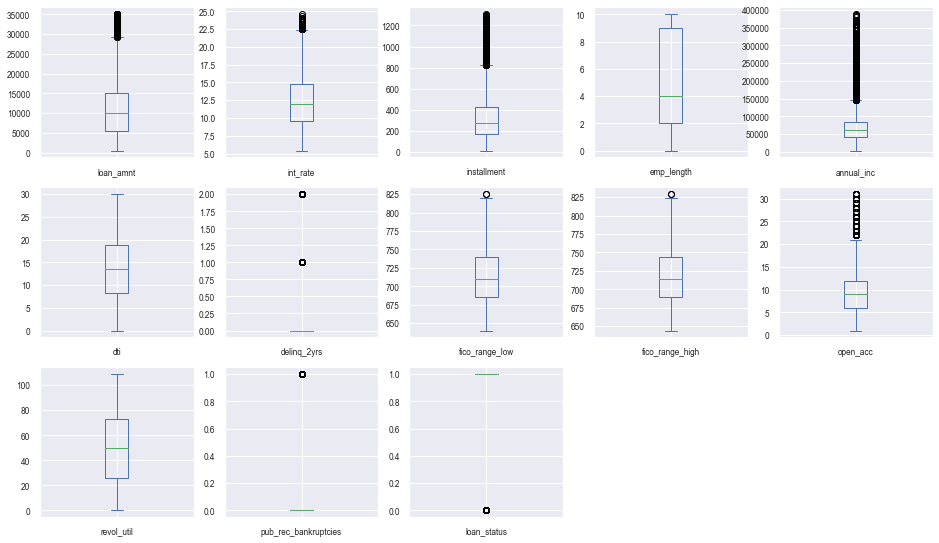

In [189]:
data.plot(kind = 'box', figsize = (16, 16), subplots = True, layout = (5, 5), sharex = False, sharey = False)
plt.show()

In [190]:
#Zamiana wartości odstających na medianę

for kolumna in data[['loan_amnt','installment','annual_inc']]:
    q1 = data[kolumna].quantile(0.25)
    q3 = data[kolumna].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    data.loc[(data[kolumna] < low) | (data[kolumna] > high), kolumna] = data[kolumna].median()

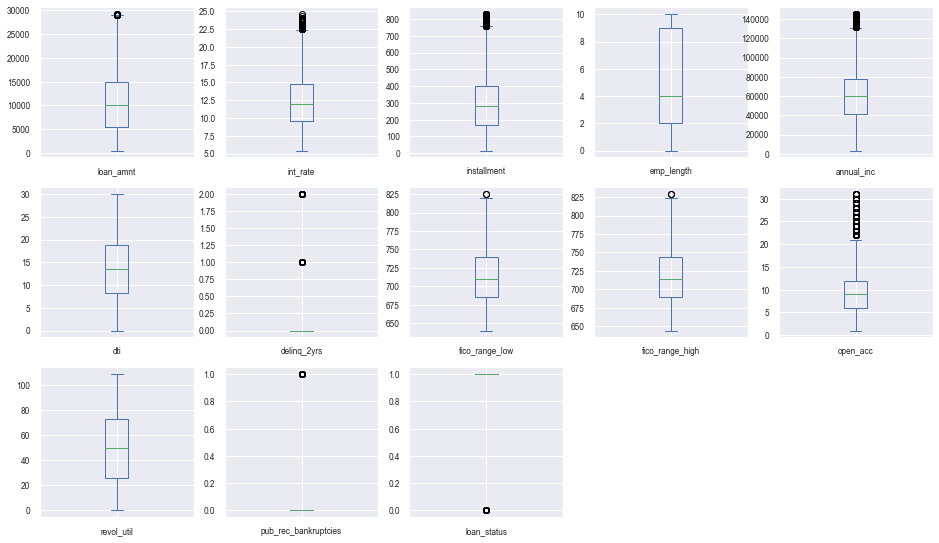

In [191]:
data.plot(kind = 'box', figsize = (16, 16), subplots = True, layout = (5, 5), sharex = False, sharey = False)
plt.show()

1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

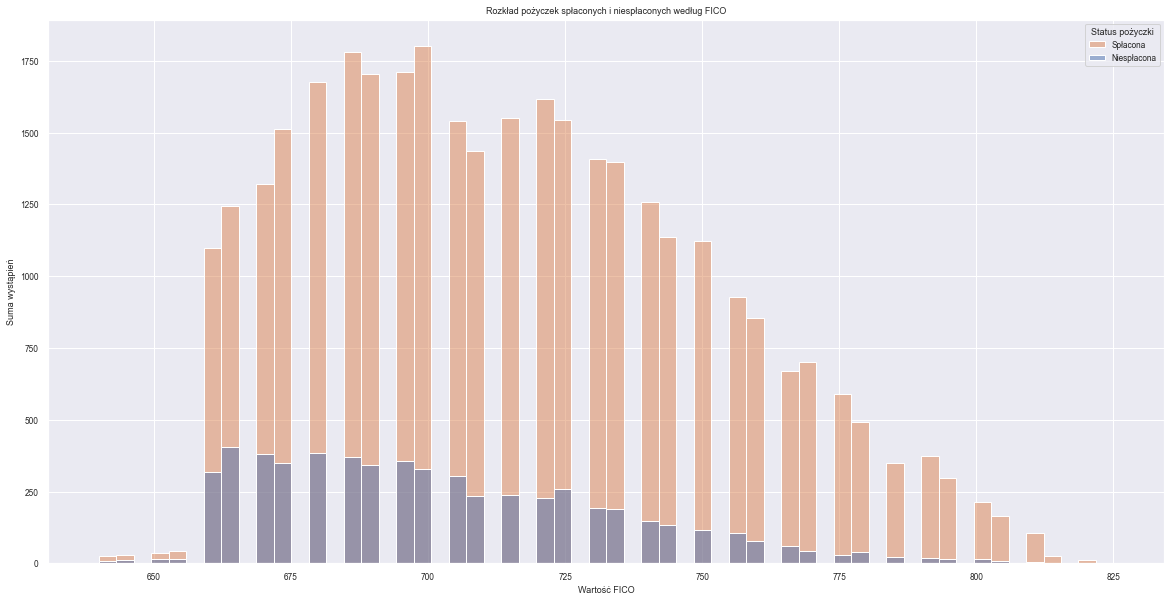

In [192]:
# rysuję wykres z podziałem na pożyczki spłacone i niespłacone
plt.figure(figsize=(20,10))
sns.histplot(data=data, x="fico_range_low", hue="loan_status").set(title="Rozkład pożyczek spłaconych i niespłaconych według FICO", xlabel="Wartość FICO", ylabel="Suma wystąpień")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")

Widzimy, że rozkład nie jest równy, przez co ciężko będzie nam zauważyć, jak dokładnie wygląda ta proporcja, ale możemy na pewno zauważyć, że jest bardzo mało klientów o wartości FICO poniżej ok. 660

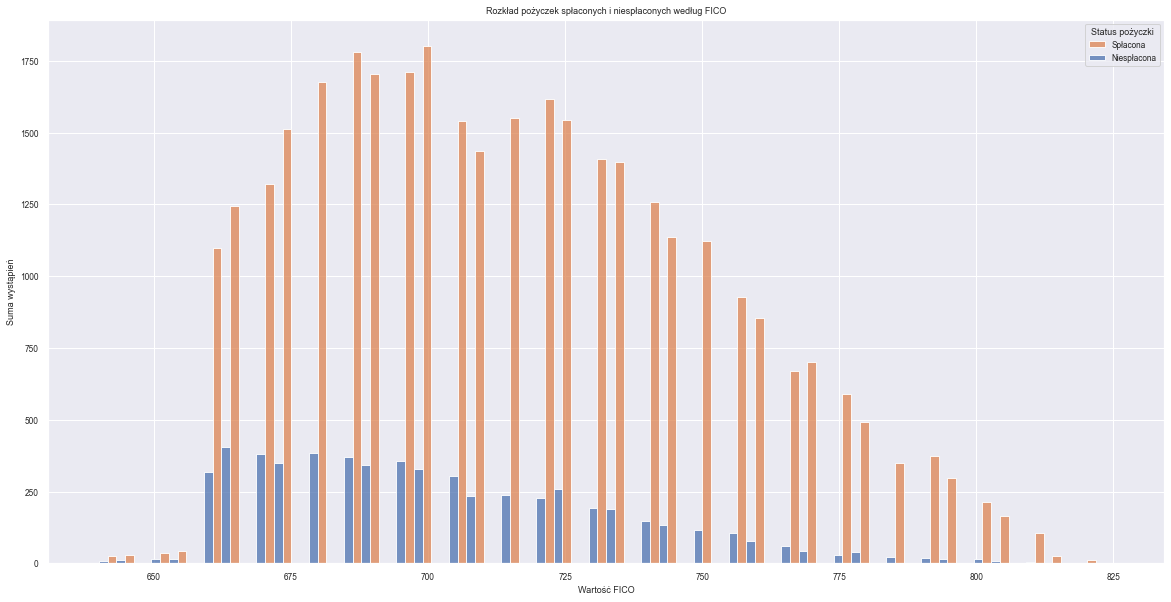

In [193]:
# używam argumentu multiple="dogde", żeby wyraźniej pokazać proporcje między spłaconymi i niespłaconymi pożyczkami
plt.figure(figsize=(20,10))
sns.histplot(data=data, x="fico_range_low", hue="loan_status", multiple="dodge").set(title="Rozkład pożyczek spłaconych i niespłaconych według FICO", xlabel="Wartość FICO", ylabel="Suma wystąpień")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")


Widzimy, że im wyższa wartość FICO, tym częstsze spłacanie pożyczek,natomiast im niższa wartość FICO, tym większe prawdopodobieństwo niespłacenia pożyczki,
Jednocześnie pamiętamy, że proporcje poniżej ok. 660 mogą być zaburzone ze względu na małą liczbę dany

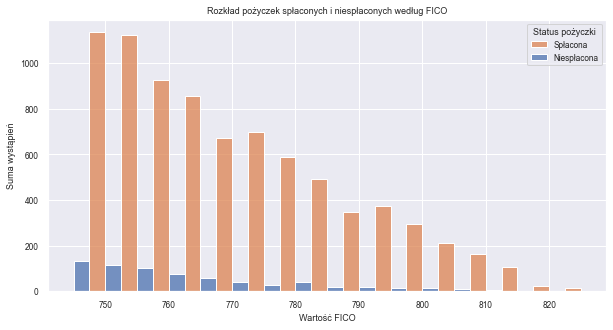

In [194]:
# osobno sprawdzam wartości powyżej 740, żeby znaleźć dokładniejsze miejsce, w którym maleje odsetek niespłaconych pożyczek

plt.figure(figsize=(10,5))
sns.histplot(data=data[data["fico_range_low"]>740], x="fico_range_low", hue="loan_status", multiple="dodge", binwidth=5).set(title="Rozkład pożyczek spłaconych i niespłaconych według FICO", xlabel="Wartość FICO", ylabel="Suma wystąpień")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")

Na podstawie tego wykresu możemy uznać, że wartość FICO równe lub powyżej 740 daje bardzo wysokie prawdopodobieństwo spłaty

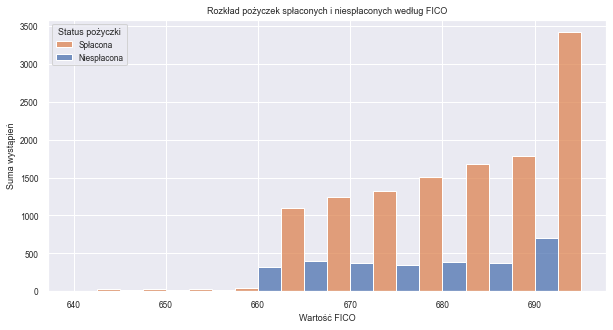

In [195]:
# teraz sprawdzam wartości poniżej 700, żeby znaleźć dokładniejsze miejsce, w którym wzrasta odsetek niespłaconych pożyczek
# odfiltrowuję też FICO < 625 ze względu na to, że występują tam tylko pojedyncze wartości, które zaburzają tendencję
plt.figure(figsize=(10,5))
sns.histplot(data=data[(data["fico_range_low"]<700) & (data["fico_range_low"]>630)], x="fico_range_low", hue="loan_status", multiple="dodge", binwidth=5).set(title="Rozkład pożyczek spłaconych i niespłaconych według FICO", xlabel="Wartość FICO", ylabel="Suma wystąpień")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")

Na podstawie tego wykresu możemy uznać, że wartość FICO równe lub poniżej 660 oznacza znaczne prawdopodobieństwo braku spłaty pożyczki

2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO

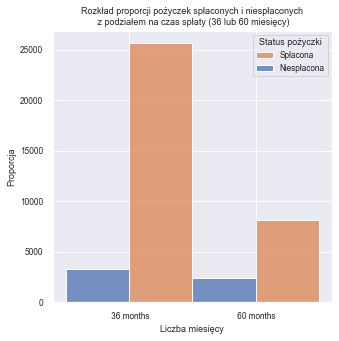

In [196]:
# tutaj zbadam, czy występuje zależność między kolumnami loan_status, term i fico_range

# porównuję status spłaty pożyczki z tym, na ile miesięcy była przyznana
plt.figure(figsize=(5,5))
sns.histplot(data=data, x="term", hue="loan_status",multiple="dodge", discrete=True).set(title="Rozkład proporcji pożyczek spłaconych i niespłaconych\n z podziałem na czas spłaty (36 lub 60 miesięcy)", xlabel="Liczba miesięcy", ylabel="Proporcja")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")

Możemy zauważyć, że pożyczki udzielane na 60 miesięcy są częściej niespłacane w porównaniu z tymi na 36 miesięcy

[Text(0.5, 1.0, 'Rozkład statusu spłaty pożyczki w stosunku do FICO z podziałem na czas spłaty'),
 Text(0.5, 0, 'Status pożyczki (0 - niespłacona, 1 - spłacona)'),
 Text(0, 0.5, 'FICO')]

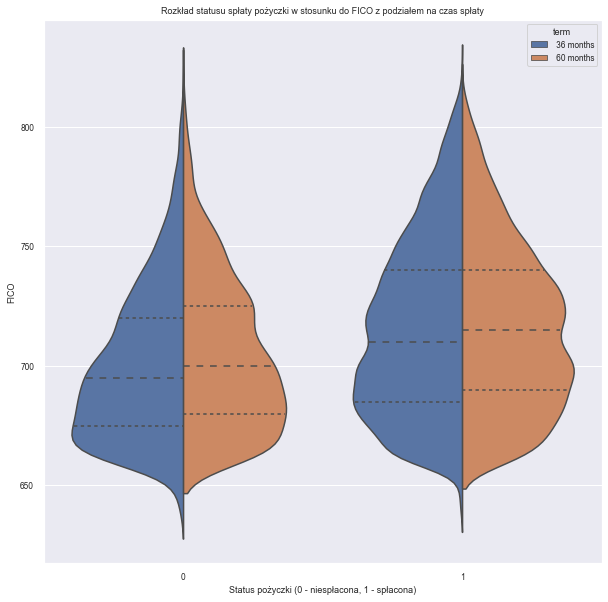

In [197]:
# na wykresie skrzypcowym chcę porównać status spłaty w stosunku do FICO z podziałem na długość kredytu

plt.figure(figsize=(10,10))

sns.violinplot(y="fico_range_low", x="loan_status", hue="term", data=data, inner="quartile", split=True).set(title="Rozkład statusu spłaty pożyczki w stosunku do FICO z podziałem na czas spłaty", xlabel="Status pożyczki (0 - niespłacona, 1 - spłacona)", ylabel="FICO")

Na tych wykresach widzimy wyraźnie, że w przypadku spłaty FICO  nie ma żadnego wpływu, ponieważ kwantyle i mediana występują w tych samych miejscach.
Natomiast w przypadku niespłaconych kredytów FICO jest niższe przy kredytach na 36 miesięcy, co widać po niższym usytuowaniu kwantyli i mediany

3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

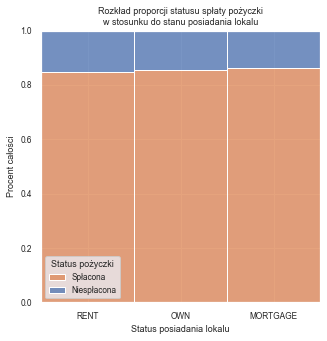

In [198]:
# tutaj zbadam, czy występuje zależność między kolumnami loan_status i występowaniem "mortgage" w kolumnie home_ownership

# tworzę wykres pokazujący proporcje między spłaconymi i niespłaconymi pożyczkami w zależności od statusu posiadania mieszkania,
# pomijam wartość "OTHER", ponieważ jest znacznie mniej takich wartości w bazie danych oraz nie wiemy, co oznacza

plt.figure(figsize=(5,5))
sns.histplot(x="home_ownership", hue="loan_status", data=data[data["home_ownership"]!="OTHER"], multiple="fill").set(title="Rozkład proporcji statusu spłaty pożyczki\nw stosunku do stanu posiadania lokalu", xlabel="Status posiadania lokalu", ylabel="Procent całości")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")

Widzimy, że wynajmowanie mieszkania było skorelowane z najczęstszym niespłacaniem pożyczek, a posiadanie kredytu hipotecznego było skorelowane z najczęstszym spłacaniem pożyczki, ale te różnice są minimalne, na poziomie około 2-4 punktów procentowych

4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

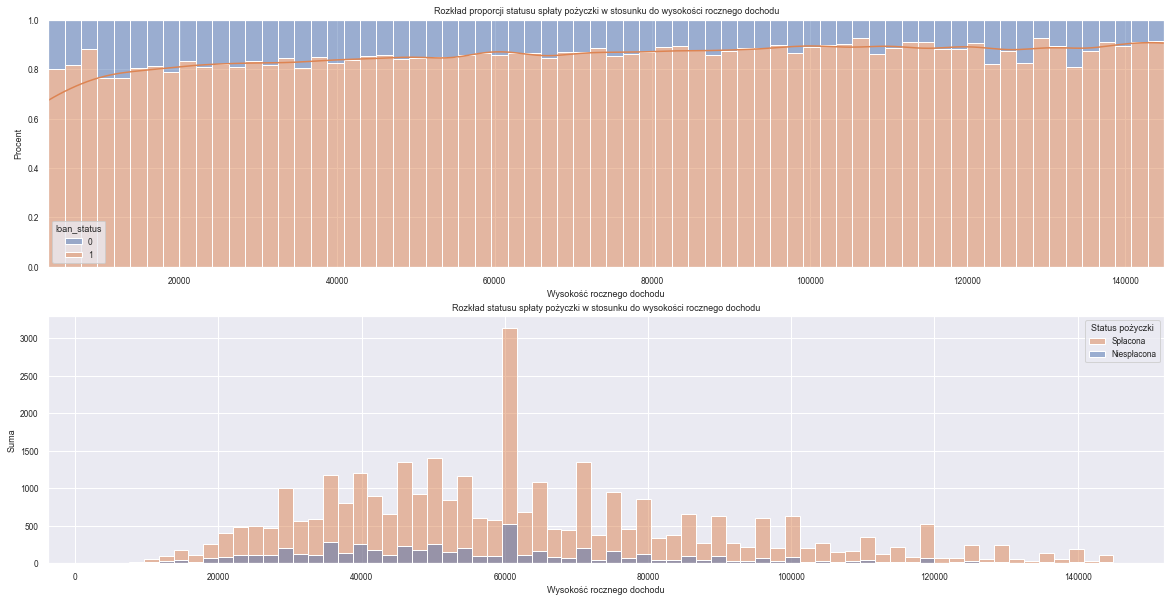

In [199]:

# tutaj zbadam, czy występuje zależność między kolumnami loan_status i wysokością rocznego dochodu z kolumny annual_inc

# dzielę przestrzeń pod dwa wykresy
fig,(ax1,ax2) = plt.subplots(2, 1, figsize=(20,10))
# ten wykres przedstawia proporcje między spłaconymi i niespłaconymi pożyczkami w stosunku do rocznego dochodu
# plus zmniejszam obszar badania do 400 000, ponieważ powyżej tej kwoty pojawiają jedynie pojedyncze rekordy
sns.histplot(x="annual_inc", hue="loan_status", data=data[data["annual_inc"]<400000], multiple="fill", kde=True, ax=ax1).set(title="Rozkład proporcji statusu spłaty pożyczki w stosunku do wysokości rocznego dochodu", xlabel="Wysokość rocznego dochodu", ylabel="Procent")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")

# a ten pokazuje, ile jest rekordów z danym dochodem
sns.histplot(x="annual_inc", hue="loan_status", data=data[data["annual_inc"]<400000], ax=ax2).set(title="Rozkład statusu spłaty pożyczki w stosunku do wysokości rocznego dochodu", xlabel="Wysokość rocznego dochodu", ylabel="Suma")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")

# jak widzimy przy wartościach powyżej ok. 200 000 następuje duża zmienność ze względu na niewiele rekordów
# osobiście nie widzę większej zależności, ale chcę się jeszcze upewnić, więc stworzę wykresy z bardziej ograniczonych danych,
# czyli z użyciem tej części, gdzie występuje dużo rekordów do porównania

Jak widzimy przy wartościach powyżej ok. 200 000 następuje duża zmienność ze względu na niewiele rekordów. Osobiście nie widzę większej zależności, ale chcę się jeszcze upewnić, więc stworzę wykresy z bardziej ograniczonych danych, czyli z użyciem tej części, gdzie występuje dużo rekordów do porównania

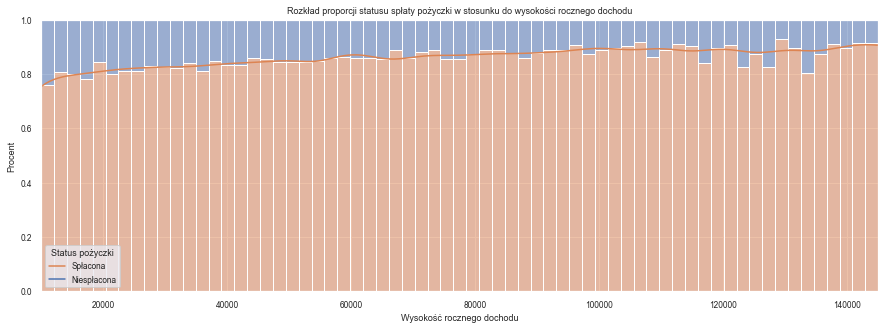

In [200]:
# ograniczam zakres do wartości pomiędzy 10 000 a 160 000

plt.figure(figsize=(15,5))
sns.histplot(x="annual_inc", hue="loan_status", data=data[((data["annual_inc"]>10000) & (data["annual_inc"]<160000))], multiple="fill", kde=True).set(title="Rozkład proporcji statusu spłaty pożyczki w stosunku do wysokości rocznego dochodu", xlabel="Wysokość rocznego dochodu", ylabel="Procent")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")

# tutaj możemy zauważyć, że faktycznie istnieje niewielka zależność między wysokością rocznego dochodu a brakiem spłaty pożyczki,
# przy czym większą różnicę możemy zauważyć przy bardzo niskim dochodzie, gdzie prawdopodobieństwo spłaty maleje,
# a przy dochodzie między ok. 60 000 - 140 000 to prawdopodobieństwo jest w miarę stałe

Tutaj możemy zauważyć, że faktycznie istnieje niewielka zależność między wysokością rocznego dochodu a brakiem spłaty pożyczki, przy czym większą różnicę możemy zauważyć przy bardzo niskim dochodzie, gdzie prawdopodobieństwo spłaty maleje, a przy dochodzie między ok. 60 000 - 140 000 to prawdopodobieństwo jest w miarę stałe

5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

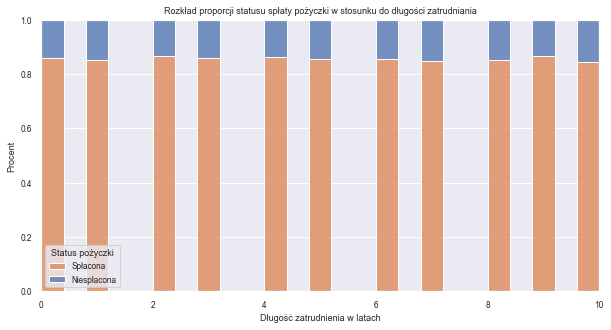

In [201]:
# tutaj zbadam, czy występuje zależność między kolumnami loan_status i emp_length

plt.figure(figsize=(10,5))
sns.histplot(data=data, x="emp_length", hue="loan_status", multiple="fill").set(title="Rozkład proporcji statusu spłaty pożyczki w stosunku do długości zatrudniania", xlabel="Długość zatrudnienia w latach", ylabel="Procent")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")

# w tym przypadku nie widzimy żadnej większej zależności między okresem zatrudnienia a spłatą pożyczki

W tym przypadku nie widzimy żadnej większej zależności między okresem zatrudnienia a spłatą pożyczki

6. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

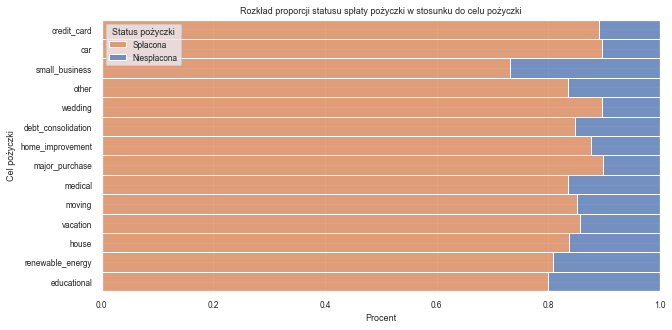

In [202]:
# tutaj zbadam, czy występuje zależność między kolumnami loan_status i purpose
data.purpose.value_counts()

plt.figure(figsize=(10,5))
sns.histplot(data=data, y="purpose", hue="loan_status",multiple="fill").set(title="Rozkład proporcji statusu spłaty pożyczki w stosunku do celu pożyczki", xlabel="Procent", ylabel="Cel pożyczki")
plt.legend(labels=["Spłacona", "Niespłacona"], title="Status pożyczki")

# widzimy, że cel pożyczki wpływa na poziom jej spłacalności, 
# który jest największy przy kredycie na samochód, ślub, większe wydatki i karcie kredytowej,
# a wyrażnie najniższy (bo na poziomie niewiele ponad 70%) przy kredycie dla małych przedsiębiorstw

Widzimy, że cel pożyczki wpływa na poziom jej spłacalności, który jest największy przy kredycie na samochód, ślub, większe wydatki i karcie kredytowej, a wyrażnie najniższy (bo na poziomie niewiele ponad 70%) przy kredycie dla małych przedsiębiorstw

# 3. Feature Engineering – utwórz 20 nowych zmiennych


Część zmiennych "utworzyłem" już tak naprawdę w pierwszej części, gdzie zmieniałem opisy na dane kategoryczne - tutaj prześledzę pozostałe kolumny typu object i zastanowie się czy coś jeszcze może być pomocne przy modelowaniu

In [203]:
data.head()


loan_amnt        term  int_rate  installment grade sub_grade  emp_length  \
0     5000.0   36 months     10.65       162.87     B        B2          10   
1     2500.0   60 months     15.27        59.83     C        C4           0   
2     2400.0   36 months     15.96        84.33     C        C5          10   
3    10000.0   36 months     13.49       339.31     C        C1          10   
4     3000.0   60 months     12.69        67.79     B        B5           1   

  home_ownership  annual_inc verification_status  ...         purpose    dti  \
0           RENT     24000.0            Verified  ...     credit_card  27.65   
1           RENT     30000.0     Source Verified  ...             car   1.00   
2           RENT     12252.0        Not Verified  ...  small_business   8.72   
3           RENT     49200.0     Source Verified  ...           other  20.00   
4           RENT     80000.0     Source Verified  ...           other  17.94   

   delinq_2yrs  earliest_cr_line fico_range_low  fico_range_high  open_acc  \
0          0.0          Jan-1985          735.0            739.0       3.0   
1          0.0          Apr-1999          740.0            744.0       3.0   
2          0.0          Nov-2001          735.0            739.0       2.0   
3          0.0          Feb-1996          690.0            694.0      10.0   
4          0.0          Jan-1996          695.0            699.0      15.0   

   revol_util  pub_rec_bankruptcies  loan_status  
0        83.7                   0.0            1  
1         9.4                   0.0            0  
2        98.5                   0.0            1  
3        21.0                   0.0            1  
4        53.9                   0.0            1  

[5 rows x 21 columns]

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39529 entries, 0 to 42474
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39529 non-null  float64
 1   term                  39529 non-null  object 
 2   int_rate              39529 non-null  float64
 3   installment           39529 non-null  float64
 4   grade                 39529 non-null  object 
 5   sub_grade             39529 non-null  object 
 6   emp_length            39529 non-null  int64  
 7   home_ownership        39529 non-null  object 
 8   annual_inc            39529 non-null  float64
 9   verification_status   39529 non-null  object 
 10  issue_d               39529 non-null  object 
 11  purpose               39529 non-null  object 
 12  dti                   39529 non-null  float64
 13  delinq_2yrs           39529 non-null  float64
 14  earliest_cr_line      39529 non-null  object 
 15  fico_range_low     

In [205]:
# usuwam kolumny, których na pewno nie będę wykorzystywał do tworzenia modeli

data = data.drop(["issue_d", "earliest_cr_line"], axis=1)

<AxesSubplot:xlabel='grade', ylabel='count'>

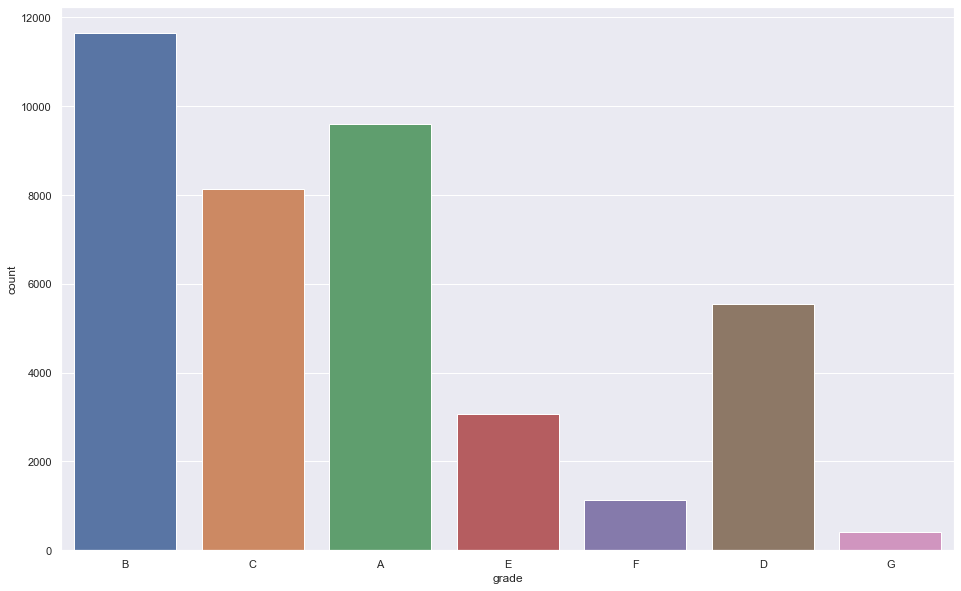

In [206]:
# Przypominam sobie o danych typu object - na początek grade i sub_grade
sns.set(rc = {'figure.figsize':(16, 10)})
sns.countplot(data = data, x = 'grade')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

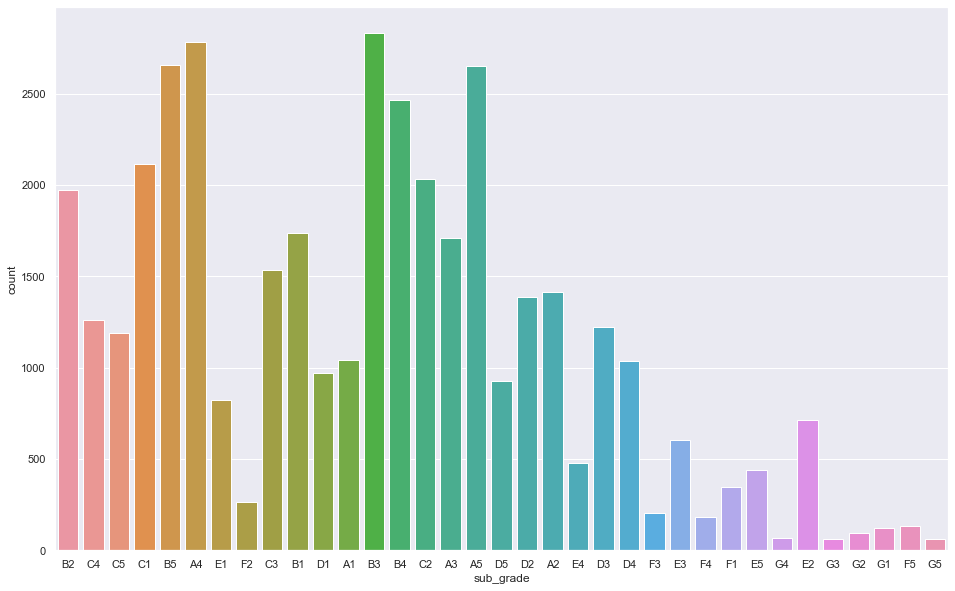

In [207]:
sns.set(rc = {'figure.figsize':(16, 10)})
sns.countplot(data = data, x = 'sub_grade')

In [208]:
# Decyduję, że skorzystam jedynie z kolumny grade - kolumnę sub_grade usuwam
data.drop(['sub_grade'], axis = 1, inplace = True)

In [209]:
# A wartości z kolumny grade zmieniam na kategoryczne
mapper = {"A":7, "B":6, "C":5, "D":4, "E":3, "F":2, "G":1}
data['grade'] = data['grade'].map(mapper)

In [210]:
# I zmieniam typ tej kolumny
data['grade'] = data['grade'].astype(int)

In [211]:
# Pozbywam się months z term
data['term'] = data['term'].str.rstrip("months").astype(float)

In [212]:
# wykorzystuję one-hot encoding w kolumnach, w których nie mogę uszeregować wartości malejąco lub rosnąco

data = pd.get_dummies(data, columns=["home_ownership", "verification_status", "purpose"])
data

loan_amnt  term  int_rate  installment  grade  emp_length  annual_inc  \
0         5000.0  36.0     10.65       162.87      6          10     24000.0   
1         2500.0  60.0     15.27        59.83      5           0     30000.0   
2         2400.0  36.0     15.96        84.33      5          10     12252.0   
3        10000.0  36.0     13.49       339.31      5          10     49200.0   
4         3000.0  60.0     12.69        67.79      6           1     80000.0   
...          ...   ...       ...          ...    ...         ...         ...   
42371    20425.0  36.0     15.96       298.67      2           4     29000.0   
42386     4400.0  36.0     17.86       158.77      1           9    125000.0   
42454     5700.0  36.0     13.43       193.26      3           5     65000.0   
42466     6000.0  36.0     12.80       201.60      4           8     57000.0   
42474    13000.0  36.0     10.91       425.04      5           2     62000.0   

         dti  delinq_2yrs  fico_range_low  ...  purpose_home_improvement  \
0      27.65          0.0           735.0  ...                         0   
1       1.00          0.0           740.0  ...                         0   
2       8.72          0.0           735.0  ...                         0   
3      20.00          0.0           690.0  ...                         0   
4      17.94          0.0           695.0  ...                         0   
...      ...          ...             ...  ...                       ...   
42371  11.42          0.0           665.0  ...                         0   
42386  25.77          1.0           660.0  ...                         0   
42454  18.22          0.0           665.0  ...                         0   
42466  15.20          2.0           665.0  ...                         0   
42474  20.00          0.0           695.0  ...                         0   

       purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0                  0                       0                0               0   
1                  0                       0                0               0   
2                  0                       0                0               0   
3                  0                       0                0               0   
4                  0                       0                0               0   
...              ...                     ...              ...             ...   
42371              0                       0                0               0   
42386              0                       0                0               0   
42454              0                       0                0               0   
42466              0                       0                0               0   
42474              0                       0                0               0   

       purpose_other  purpose_renewable_energy  purpose_small_business  \
0                  0                         0                       0   
1                  0                         0                       0   
2                  0                         0                       1   
3                  1                         0                       0   
4                  1                         0                       0   
...              ...                       ...                     ...   
42371              0                         0                       0   
42386              0                         0                       0   
42454              0                         0                       0   
42466              0                         0                       0   
42474              0                         0                       0   

       purpose_vacation  purpose_wedding  
0                     0                0  
1                     0                0  
2                     0                0  
3                     0                0  
4                     0                0  
...          

In [213]:
data['fico_range_low']

0        735.0
1        740.0
2        735.0
3        690.0
4        695.0
         ...  
42371    665.0
42386    660.0
42454    665.0
42466    665.0
42474    695.0
Name: fico_range_low, Length: 39529, dtype: float64

In [214]:
data['fico_range_high']

0        739.0
1        744.0
2        739.0
3        694.0
4        699.0
         ...  
42371    669.0
42386    664.0
42454    669.0
42466    669.0
42474    699.0
Name: fico_range_high, Length: 39529, dtype: float64

In [215]:
# kodowaanie FICO - ponieważ wartości w fico_range_low i fico_range_high są bardzo zbliżone, utworzę jedna kolumne fico
data['fico_range_high'] = data['fico_range_high'].fillna(method='bfill')
data['fico_range_low'] = data['fico_range_low'].fillna(method='bfill')
data['fico_range_high'] = data['fico_range_high'].astype(int)
data['fico_range_low'] = data['fico_range_low'].astype(int)
data['fico'] = (data['fico_range_high'] + data['fico_range_low']) / 2

In [216]:
#jaki % rocznego dochodu wynosi wnioskowana pozyczka
data['%_loan_to_income'] = round(data['loan_amnt']/data['annual_inc']*100,2)

In [217]:
data['proportions_of_earnings_and_credit']= round(data.annual_inc/data.loan_amnt, 2)

In [218]:
# Ostatni rzut okiem na info o datasecie przed przejściem do modelowania
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39529 entries, 0 to 42474
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            39529 non-null  float64
 1   term                                 39529 non-null  float64
 2   int_rate                             39529 non-null  float64
 3   installment                          39529 non-null  float64
 4   grade                                39529 non-null  int32  
 5   emp_length                           39529 non-null  int64  
 6   annual_inc                           39529 non-null  float64
 7   dti                                  39529 non-null  float64
 8   delinq_2yrs                          39529 non-null  float64
 9   fico_range_low                       39529 non-null  int32  
 10  fico_range_high                      39529 non-null  int32  
 11  open_acc                    

In [219]:
# I na sam dataset
data.head()

loan_amnt  term  int_rate  installment  grade  emp_length  annual_inc  \
0     5000.0  36.0     10.65       162.87      6          10     24000.0   
1     2500.0  60.0     15.27        59.83      5           0     30000.0   
2     2400.0  36.0     15.96        84.33      5          10     12252.0   
3    10000.0  36.0     13.49       339.31      5          10     49200.0   
4     3000.0  60.0     12.69        67.79      6           1     80000.0   

     dti  delinq_2yrs  fico_range_low  ...  purpose_medical  purpose_moving  \
0  27.65          0.0             735  ...                0               0   
1   1.00          0.0             740  ...                0               0   
2   8.72          0.0             735  ...                0               0   
3  20.00          0.0             690  ...                0               0   
4  17.94          0.0             695  ...                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   
1              0                         0                       0   
2              0                         0                       1   
3              1                         0                       0   
4              1                         0                       0   

   purpose_vacation  purpose_wedding   fico  %_loan_to_income  \
0                 0                0  737.0             20.83   
1                 0                0  742.0              8.33   
2                 0                0  737.0             19.59   
3                 0                0  692.0             20.33   
4                 0                0  697.0              3.75   

   proportions_of_earnings_and_credit  
0                                4.80  
1                               12.00  
2                                5.11  
3                                4.92  
4                               26.67  

[5 rows x 39 columns]

In [220]:
data.select_dtypes(include=['object'])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]

[39529 rows x 0 columns]

# 4. Modelowanie (150 pkt)
Wykonaj klasteryzację danych (wypróbuj do tego celu kilka metod, min. 3) i sprawdź, czy występują jakieś segmenty pożyczkobiorców, wykorzystaj odpowiednie metody do określenia optymalnej liczby klastrów (40 pkt)
Wytrenuj 5 różnych modeli, wykorzystując do każdego inny algorytm, a następnie porównaj ich działanie, za metrykę oceny jakości modelu przyjmij AUROC score. (50pkt)
Sprawdź działanie wcześniej użytych metod na skompresowanych danych za pomocą PCA, porównaj wyniki (AUROC score) z modelami wytrenowanymi w poprzednim podpunkcie. (20pkt)
Zbuduj finalny model, którego AUROC score będzie >= 80%, pamiętaj o doborze istotnych zmiennych, kroswalidacji oraz dostrojeniu parametrów modelu, pomyśl również o zbalansowaniu klas. (40pkt)

 4.1. Wyznaczenie danych testowych i danych treningowych:

In [221]:
new_cols = [col for col in data.columns if col != 'loan_status'] 
X = data[new_cols]
y = data['loan_status']

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [223]:
X_train

loan_amnt  term  int_rate  installment  grade  emp_length  annual_inc  \
38787     5000.0  36.0     10.39       118.45      6          10     66000.0   
8147      7000.0  36.0      7.49       217.72      7          10     55000.0   
15996    24000.0  36.0      6.92       740.18      7           0     72000.0   
17932     6000.0  36.0     10.00       193.61      6          10     60000.0   
16440     5000.0  36.0      7.66       155.90      7           6     75000.0   
...          ...   ...       ...          ...    ...         ...         ...   
37124    16000.0  36.0      9.63       513.51      7           0    120000.0   
14938     4000.0  36.0     10.99       130.94      6           7     41000.0   
14153    23200.0  60.0     15.99       564.06      4           2     75000.0   
2990     15000.0  60.0     18.25       382.95      4           7     45000.0   
19828    10000.0  36.0     10.00       322.68      6           1     55000.0   

         dti  delinq_2yrs  fico_range_low  ...  purpose_medical  \
38787   1.56          0.0             695  ...                1   
8147   16.95          0.0             725  ...                0   
15996  17.57          0.0             770  ...                0   
17932  10.16          0.0             710  ...                0   
16440   1.34          0.0             735  ...                0   
...      ...          ...             ...  ...              ...   
37124   2.50          0.0             800  ...                0   
14938  18.70          0.0             715  ...                0   
14153  15.81          0.0             715  ...                0   
2990   14.35          0.0             680  ...                0   
19828   4.45          0.0             700  ...                0   

       purpose_moving  purpose_other  purpose_renewable_energy  \
38787               0              0                         0   
8147                1              0                         0   
15996               0              0                         0   
17932               0              0                         0   
16440               0              0                         0   
...               ...            ...                       ...   
37124               0              0                         0   
14938               0              0                         0   
14153               0              0                         0   
2990                0              0                         0   
19828               0              0                         0   

       purpose_small_business  purpose_vacation  purpose_wedding   fico  \
38787                       0                 0                0  697.0   
8147                        0                 0                0  727.0   
15996                       0                 0                0  772.0   
17932                       0                 0                0  712.0   
16440                       0                 0                0  737.0   
...                       ...               ...              ...    ...   
37124                       1                 0                0  802.0   
14938                       0                 0                0  717.0   
14153                       0                 0                0  717.0   
2990                        0                 0                0  682.0   
19828                       1                 0                0  702.0   

       %_loan_to_income  proportions_of_earnings_and_credit  
38787              7.58                               13.20  
8147              12.73                                7.86  
15996             33.33                                3.00  
17932             10.00                               10.00  
16440              6.67                               15.00  
...                 ...                                 ...  
37124             13.33                                7.50  
14938              9.76                            

In [224]:
X_test

loan_amnt  term  int_rate  installment  grade  emp_length  annual_inc  \
12055     4000.0  36.0      5.99       121.67      7           7     69000.0   
14691    15000.0  36.0     10.99       491.01      6          10     85000.0   
38511     5500.0  36.0     12.22       145.78      5           0     28089.0   
14362     9200.0  36.0     10.99       301.16      6           3     30200.0   
37511     6000.0  36.0     12.21       199.89      6           4     21000.0   
...          ...   ...       ...          ...    ...         ...         ...   
14667     6500.0  36.0     13.99       222.13      5           4     42000.0   
11558     7000.0  36.0     15.99       246.07      4          10    144000.0   
14023     8400.0  36.0      6.99       259.33      7          10     70000.0   
33868    10000.0  36.0     13.22       338.01      5           5     40000.0   
41582     6500.0  36.0     13.55       220.74      4           0     81500.0   

         dti  delinq_2yrs  fico_range_low  ...  purpose_medical  \
12055   2.63          0.0             755  ...                0   
14691  14.44          0.0             705  ...                0   
38511  17.63          1.0             675  ...                0   
14362  15.93          0.0             700  ...                0   
37511  11.77          0.0             710  ...                0   
...      ...          ...             ...  ...              ...   
14667  20.37          0.0             675  ...                0   
11558   2.40          0.0             670  ...                0   
14023   8.66          0.0             745  ...                1   
33868  15.21          0.0             690  ...                0   
41582  10.95          0.0             655  ...                0   

       purpose_moving  purpose_other  purpose_renewable_energy  \
12055               0              1                         0   
14691               0              1                         0   
38511               0              0                         0   
14362               0              0                         0   
37511               0              0                         0   
...               ...            ...                       ...   
14667               0              0                         0   
11558               0              0                         0   
14023               0              0                         0   
33868               0              0                         0   
41582               0              0                         0   

       purpose_small_business  purpose_vacation  purpose_wedding   fico  \
12055                       0                 0                0  757.0   
14691                       0                 0                0  707.0   
38511                       0                 0                0  677.0   
14362                       0                 0                0  702.0   
37511                       0                 0                0  712.0   
...                       ...               ...              ...    ...   
14667                       0                 0                1  677.0   
11558                       0                 0                0  672.0   
14023                       0                 0                0  747.0   
33868                       0                 0                0  692.0   
41582                       0                 0                0  657.0   

       %_loan_to_income  proportions_of_earnings_and_credit  
12055              5.80                               17.25  
14691             17.65                                5.67  
38511             19.58                                5.11  
14362             30.46                                3.28  
37511             28.57                                3.50  
...                 ...                                 ...  
14667             15.48                                6.46  
11558              4.86                            

In [225]:
y_train

38787    1
8147     0
15996    1
17932    1
16440    1
        ..
37124    1
14938    1
14153    1
2990     1
19828    1
Name: loan_status, Length: 27670, dtype: int32

In [226]:
y_test

12055    1
14691    1
38511    1
14362    1
37511    1
        ..
14667    1
11558    0
14023    1
33868    1
41582    1
Name: loan_status, Length: 11859, dtype: int32

 4.2. Skaling

In [227]:
X_scaled=X.apply(stats.zscore)

In [228]:
X_scaled

loan_amnt      term  int_rate  installment     grade  emp_length  \
0      -0.872258 -0.604658 -0.409194    -0.803291  0.452825    1.413450   
1      -1.266366  1.653826  0.833480    -1.384449 -0.252444   -1.396941   
2      -1.282131 -0.604658  1.019075    -1.246266 -0.252444    1.413450   
3      -0.084040 -0.604658  0.354701     0.191851 -0.252444    1.413450   
4      -1.187545  1.653826  0.139519    -1.339553  0.452825   -1.115902   
...          ...       ...       ...          ...       ...         ...   
42371   1.559393 -0.604658  1.019075    -0.037364 -2.368251   -0.272785   
42386  -0.966844 -0.604658  1.530131    -0.826416 -3.073521    1.132411   
42454  -0.761907 -0.604658  0.338562    -0.631888 -1.662982    0.008254   
42466  -0.714614 -0.604658  0.169107    -0.584850 -0.957713    0.851372   
42474   0.388890 -0.604658 -0.339260     0.675378 -0.252444   -0.834863   

       annual_inc       dti  delinq_2yrs  fico_range_low  ...  \
0       -1.376639  2.126807    -0.320375        0.597291  ...   
1       -1.158392 -1.870087    -0.320375        0.737640  ...   
2       -1.803967 -0.712262    -0.320375        0.597291  ...   
3       -0.460001  0.979481    -0.320375       -0.665848  ...   
4        0.660335  0.670528    -0.320375       -0.525500  ...   
...           ...       ...          ...             ...  ...   
42371   -1.194766 -0.307324    -0.320375       -1.367593  ...   
42386    2.297190  1.844850     2.337917       -1.507942  ...   
42454    0.114717  0.712521    -0.320375       -1.367593  ...   
42466   -0.176279  0.259590     4.996208       -1.367593  ...   
42474    0.005594  0.979481    -0.320375       -0.525500  ...   

       purpose_medical  purpose_moving  purpose_other  \
0            -0.132499       -0.121065      -0.334134   
1            -0.132499       -0.121065      -0.334134   
2            -0.132499       -0.121065      -0.334134   
3            -0.132499       -0.121065       2.992813   
4            -0.132499       -0.121065       2.992813   
...                ...             ...            ...   
42371        -0.132499       -0.121065      -0.334134   
42386        -0.132499       -0.121065      -0.334134   
42454        -0.132499       -0.121065      -0.334134   
42466        -0.132499       -0.121065      -0.334134   
42474        -0.132499       -0.121065      -0.334134   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                     -0.048823               -0.219121         -0.095195   
1                     -0.048823               -0.219121         -0.095195   
2                     -0.048823                4.563679         -0.095195   
3                     -0.048823               -0.219121         -0.095195   
4                     -0.048823               -0.219121         -0.095195   
...                         ...                     ...               ...   
42371                 -0.048823               -0.219121         -0.095195   
42386                 -0.048823               -0.219121         -0.095195   
42454                 -0.048823               -0.219121         -0.095195   
42466                 -0.048823               -0.219121         -0.095195   
42474                 -0.048823               -0.219121         -0.095195   

       purpose_wedding      fico  %_loan_to_income  \
0            -0.156584  0.597291          0.190811   
1            -0.156584  0.737640         -0.925240   
2            -0.156584  0.597291          0.080099   
3            -0.156584 -0.665848          0.146169   
4            -0.156584 -0.525500         -1.334161   
...                ...       ...               ...   
42371        -0.156584 -1.367593          4.619300   
42386        -0.156584 -1.507942         -1.354696   
42454        -0.156584 -1.367593         -0.885955   
42466        -0.156584 -1.367593         -0.728815   
42474        -0.156584 -0.525500          0.203311   

       proportions_of_earnings_and_credit  
0                     

In [229]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'open_acc', 'revol_util', 'pub_rec_bankruptcies',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'fico', '%_loan_to_income',
       'proportions_of_earnings_and_credit'],
      dtype='object')

In [230]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [231]:
X_scaled_df.head()

loan_amnt      term  int_rate  installment     grade  emp_length  \
0  -0.872258 -0.604658 -0.409194    -0.803291  0.452825    1.413450   
1  -1.266366  1.653826  0.833480    -1.384449 -0.252444   -1.396941   
2  -1.282131 -0.604658  1.019075    -1.246266 -0.252444    1.413450   
3  -0.084040 -0.604658  0.354701     0.191851 -0.252444    1.413450   
4  -1.187545  1.653826  0.139519    -1.339553  0.452825   -1.115902   

   annual_inc       dti  delinq_2yrs  fico_range_low  ...  purpose_medical  \
0   -1.376639  2.126807    -0.320375        0.597291  ...        -0.132499   
1   -1.158392 -1.870087    -0.320375        0.737640  ...        -0.132499   
2   -1.803967 -0.712262    -0.320375        0.597291  ...        -0.132499   
3   -0.460001  0.979481    -0.320375       -0.665848  ...        -0.132499   
4    0.660335  0.670528    -0.320375       -0.525500  ...        -0.132499   

   purpose_moving  purpose_other  purpose_renewable_energy  \
0       -0.121065      -0.334134                 -0.048823   
1       -0.121065      -0.334134                 -0.048823   
2       -0.121065      -0.334134                 -0.048823   
3       -0.121065       2.992813                 -0.048823   
4       -0.121065       2.992813                 -0.048823   

   purpose_small_business  purpose_vacation  purpose_wedding      fico  \
0               -0.219121         -0.095195        -0.156584  0.597291   
1               -0.219121         -0.095195        -0.156584  0.737640   
2                4.563679         -0.095195        -0.156584  0.597291   
3               -0.219121         -0.095195        -0.156584 -0.665848   
4               -0.219121         -0.095195        -0.156584 -0.525500   

   %_loan_to_income  proportions_of_earnings_and_credit  
0          0.190811                           -0.458906  
1         -0.925240                            0.454482  
2          0.080099                           -0.419580  
3          0.146169                           -0.443683  
4         -1.334161                            2.315509  

[5 rows x 38 columns]

In [232]:
 X_scaled_df

loan_amnt      term  int_rate  installment     grade  emp_length  \
0      -0.872258 -0.604658 -0.409194    -0.803291  0.452825    1.413450   
1      -1.266366  1.653826  0.833480    -1.384449 -0.252444   -1.396941   
2      -1.282131 -0.604658  1.019075    -1.246266 -0.252444    1.413450   
3      -0.084040 -0.604658  0.354701     0.191851 -0.252444    1.413450   
4      -1.187545  1.653826  0.139519    -1.339553  0.452825   -1.115902   
...          ...       ...       ...          ...       ...         ...   
42371   1.559393 -0.604658  1.019075    -0.037364 -2.368251   -0.272785   
42386  -0.966844 -0.604658  1.530131    -0.826416 -3.073521    1.132411   
42454  -0.761907 -0.604658  0.338562    -0.631888 -1.662982    0.008254   
42466  -0.714614 -0.604658  0.169107    -0.584850 -0.957713    0.851372   
42474   0.388890 -0.604658 -0.339260     0.675378 -0.252444   -0.834863   

       annual_inc       dti  delinq_2yrs  fico_range_low  ...  \
0       -1.376639  2.126807    -0.320375        0.597291  ...   
1       -1.158392 -1.870087    -0.320375        0.737640  ...   
2       -1.803967 -0.712262    -0.320375        0.597291  ...   
3       -0.460001  0.979481    -0.320375       -0.665848  ...   
4        0.660335  0.670528    -0.320375       -0.525500  ...   
...           ...       ...          ...             ...  ...   
42371   -1.194766 -0.307324    -0.320375       -1.367593  ...   
42386    2.297190  1.844850     2.337917       -1.507942  ...   
42454    0.114717  0.712521    -0.320375       -1.367593  ...   
42466   -0.176279  0.259590     4.996208       -1.367593  ...   
42474    0.005594  0.979481    -0.320375       -0.525500  ...   

       purpose_medical  purpose_moving  purpose_other  \
0            -0.132499       -0.121065      -0.334134   
1            -0.132499       -0.121065      -0.334134   
2            -0.132499       -0.121065      -0.334134   
3            -0.132499       -0.121065       2.992813   
4            -0.132499       -0.121065       2.992813   
...                ...             ...            ...   
42371        -0.132499       -0.121065      -0.334134   
42386        -0.132499       -0.121065      -0.334134   
42454        -0.132499       -0.121065      -0.334134   
42466        -0.132499       -0.121065      -0.334134   
42474        -0.132499       -0.121065      -0.334134   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                     -0.048823               -0.219121         -0.095195   
1                     -0.048823               -0.219121         -0.095195   
2                     -0.048823                4.563679         -0.095195   
3                     -0.048823               -0.219121         -0.095195   
4                     -0.048823               -0.219121         -0.095195   
...                         ...                     ...               ...   
42371                 -0.048823               -0.219121         -0.095195   
42386                 -0.048823               -0.219121         -0.095195   
42454                 -0.048823               -0.219121         -0.095195   
42466                 -0.048823               -0.219121         -0.095195   
42474                 -0.048823               -0.219121         -0.095195   

       purpose_wedding      fico  %_loan_to_income  \
0            -0.156584  0.597291          0.190811   
1            -0.156584  0.737640         -0.925240   
2            -0.156584  0.597291          0.080099   
3            -0.156584 -0.665848          0.146169   
4            -0.156584 -0.525500         -1.334161   
...                ...       ...               ...   
42371        -0.156584 -1.367593          4.619300   
42386        -0.156584 -1.507942         -1.354696   
42454        -0.156584 -1.367593         -0.885955   
42466        -0.156584 -1.367593         -0.728815   
42474        -0.156584 -0.525500          0.203311   

       proportions_of_earnings_and_credit  
0                     

In [233]:
np.isnan(X_scaled) == True

loan_amnt   term  int_rate  installment  grade  emp_length  annual_inc  \
0          False  False     False        False  False       False       False   
1          False  False     False        False  False       False       False   
2          False  False     False        False  False       False       False   
3          False  False     False        False  False       False       False   
4          False  False     False        False  False       False       False   
...          ...    ...       ...          ...    ...         ...         ...   
42371      False  False     False        False  False       False       False   
42386      False  False     False        False  False       False       False   
42454      False  False     False        False  False       False       False   
42466      False  False     False        False  False       False       False   
42474      False  False     False        False  False       False       False   

         dti  delinq_2yrs  fico_range_low  ...  purpose_medical  \
0      False        False           False  ...            False   
1      False        False           False  ...            False   
2      False        False           False  ...            False   
3      False        False           False  ...            False   
4      False        False           False  ...            False   
...      ...          ...             ...  ...              ...   
42371  False        False           False  ...            False   
42386  False        False           False  ...            False   
42454  False        False           False  ...            False   
42466  False        False           False  ...            False   
42474  False        False           False  ...            False   

       purpose_moving  purpose_other  purpose_renewable_energy  \
0               False          False                     False   
1               False          False                     False   
2               False          False                     False   
3               False          False                     False   
4               False          False                     False   
...               ...            ...                       ...   
42371           False          False                     False   
42386           False          False                     False   
42454           False          False                     False   
42466           False          False                     False   
42474           False          False                     False   

       purpose_small_business  purpose_vacation  purpose_wedding   fico  \
0                       False             False            False  False   
1                       False             False            False  False   
2                       False             False            False  False   
3                       False             False            False  False   
4                       False             False            False  False   
...                       ...               ...              ...    ...   
42371                   False             False            False  False   
42386                   False             False            False  False   
42454                   False             False            False  False   
42466                   False             False            False  False   
42474                   False             False            False  False   

       %_loan_to_income  proportions_of_earnings_and_credit  
0                 False                               False  
1                 False                               False  
2                 False                               False  
3                 False                               False  
4                 False                               False  
...                 ...                                 ...  
42371             False                               False  
42386             False                

<AxesSubplot:>

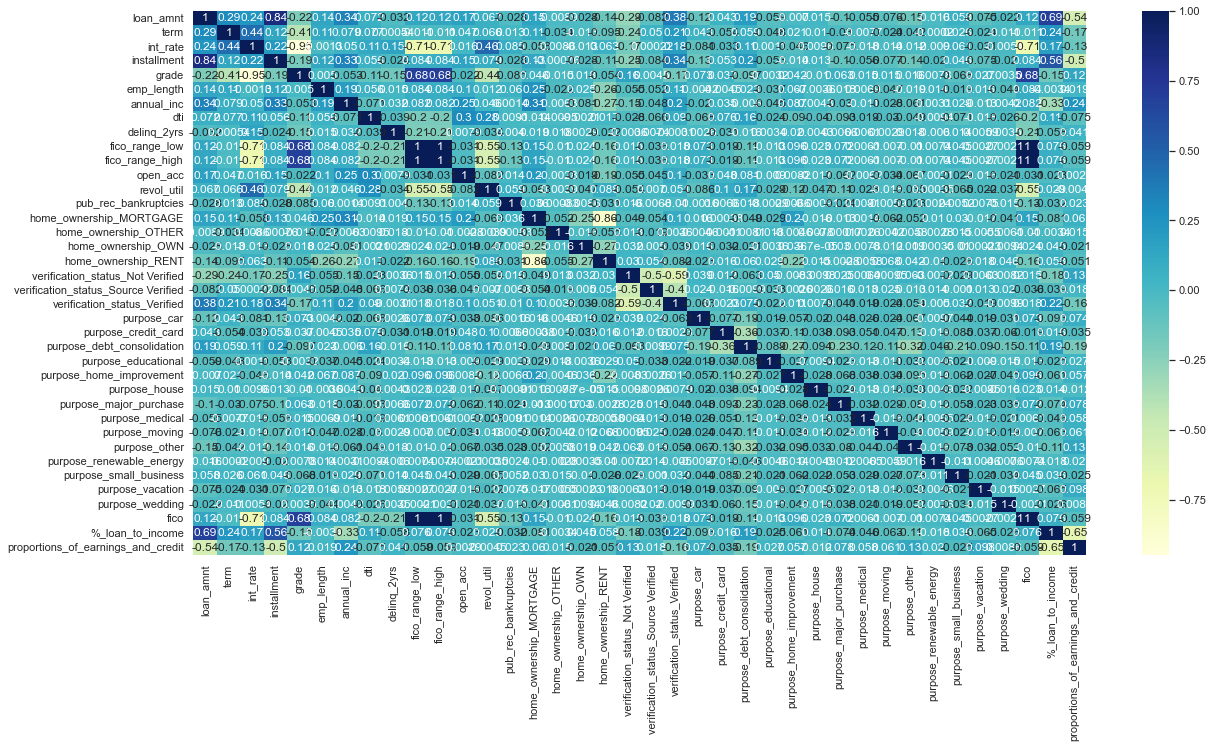

In [234]:
 plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True,cmap="YlGnBu")

In [235]:
X_scaled_df.corr()

loan_amnt      term  int_rate  \
loan_amnt                             1.000000  0.294888  0.235969   
term                                  0.294888  1.000000  0.435094   
int_rate                              0.235969  0.435094  1.000000   
installment                           0.837133  0.118142  0.216783   
grade                                -0.215870 -0.405255 -0.946520   
emp_length                            0.138909  0.112333 -0.001252   
annual_inc                            0.343574  0.079496  0.049597   
dti                                   0.071629  0.076801  0.114007   
delinq_2yrs                          -0.032347  0.000539  0.151291   
fico_range_low                        0.121494 -0.011485 -0.705571   
fico_range_high                       0.121494 -0.011485 -0.705571   
open_acc                              0.167790  0.047052  0.015700   
revol_util                            0.067299  0.065937  0.460321   
pub_rec_bankruptcies                 -0.028239  0.012848  0.084600   
home_ownership_MORTGAGE               0.152740  0.106224 -0.057904   
home_ownership_OTHER                 -0.008949 -0.033735  0.008594   
home_ownership_OWN                   -0.028265 -0.012634 -0.012699   
home_ownership_RENT                  -0.136425 -0.095373  0.063290   
verification_status_Not Verified     -0.290578 -0.239618 -0.173458   
verification_status_Source Verified  -0.081980  0.049845  0.000221   
verification_status_Verified          0.382713  0.206661  0.182863   
purpose_car                          -0.117380  0.042972 -0.081185   
purpose_credit_card                   0.042876 -0.053641 -0.033181   
purpose_debt_consolidation            0.193639  0.058705  0.108388   
purpose_educational                  -0.058622 -0.048097  0.001075   
purpose_home_improvement             -0.007007  0.021326 -0.046311   
purpose_house                         0.015096  0.010091  0.009616   
purpose_major_purchase               -0.102061 -0.029935 -0.075095   
purpose_medical                      -0.054525 -0.007718 -0.018229   
purpose_moving                       -0.076433 -0.023881 -0.014403   
purpose_other                        -0.146793 -0.041605 -0.012084   
purpose_renewable_energy             -0.015799 -0.000195 -0.009036   
purpose_small_business                0.058096  0.026000  0.060834   
purpose_vacation                     -0.075343 -0.024251 -0.030820   
purpose_wedding                      -0.022353 -0.010568 -0.005406   
fico                                  0.121494 -0.011485 -0.705571   
%_loan_to_income                      0.686280  0.235669  0.173823   
proportions_of_earnings_and_credit   -0.536276 -0.169419 -0.133239   

                                     installment     grade  emp_length  \
loan_amnt                               0.837133 -0.215870    0.138909   
term                                    0.118142 -0.405255    0.112333   
int_rate                                0.216783 -0.946520   -0.001252   
installment                             1.000000 -0.186863    0.120240   
grade                                  -0.186863  1.000000    0.005027   
emp_length                              0.120240  0.005027    1.000000   
annual_inc                              0.334453 -0.052573    0.186507   
dti                                     0.055533 -0.105225    0.055856   
delinq_2yrs                            -0.024096 -0.153822    0.014929   
fico_range_low                          0.084138  0.681903    0.083875   
fico_range_high                         0.084138  0.681903    0.083875   
open_acc                                0.153921 -0.021586    0.101390   
revol_util                              0.079147 -0.436260    0.012455   
pub_rec_bankruptcies                   -0.027690 -0.084710    0.060289   
home_ownership_MORTGAGE                 0.126529  0.046384    0.246913   
home_ownership_OTHER                   -0.000761 -0.015436   -0.021506   
home_ownership_OWN                     -0.027574

In [236]:
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)

In [237]:
X_scaled

loan_amnt      term  int_rate  installment     grade  emp_length  \
0      -0.872258 -0.604658 -0.409194    -0.803291  0.452825    1.413450   
1      -1.266366  1.653826  0.833480    -1.384449 -0.252444   -1.396941   
2      -1.282131 -0.604658  1.019075    -1.246266 -0.252444    1.413450   
3      -0.084040 -0.604658  0.354701     0.191851 -0.252444    1.413450   
4      -1.187545  1.653826  0.139519    -1.339553  0.452825   -1.115902   
...          ...       ...       ...          ...       ...         ...   
42371   1.559393 -0.604658  1.019075    -0.037364 -2.368251   -0.272785   
42386  -0.966844 -0.604658  1.530131    -0.826416 -3.073521    1.132411   
42454  -0.761907 -0.604658  0.338562    -0.631888 -1.662982    0.008254   
42466  -0.714614 -0.604658  0.169107    -0.584850 -0.957713    0.851372   
42474   0.388890 -0.604658 -0.339260     0.675378 -0.252444   -0.834863   

       annual_inc       dti  delinq_2yrs  fico_range_low  ...  \
0       -1.376639  2.126807    -0.320375        0.597291  ...   
1       -1.158392 -1.870087    -0.320375        0.737640  ...   
2       -1.803967 -0.712262    -0.320375        0.597291  ...   
3       -0.460001  0.979481    -0.320375       -0.665848  ...   
4        0.660335  0.670528    -0.320375       -0.525500  ...   
...           ...       ...          ...             ...  ...   
42371   -1.194766 -0.307324    -0.320375       -1.367593  ...   
42386    2.297190  1.844850     2.337917       -1.507942  ...   
42454    0.114717  0.712521    -0.320375       -1.367593  ...   
42466   -0.176279  0.259590     4.996208       -1.367593  ...   
42474    0.005594  0.979481    -0.320375       -0.525500  ...   

       purpose_medical  purpose_moving  purpose_other  \
0            -0.132499       -0.121065      -0.334134   
1            -0.132499       -0.121065      -0.334134   
2            -0.132499       -0.121065      -0.334134   
3            -0.132499       -0.121065       2.992813   
4            -0.132499       -0.121065       2.992813   
...                ...             ...            ...   
42371        -0.132499       -0.121065      -0.334134   
42386        -0.132499       -0.121065      -0.334134   
42454        -0.132499       -0.121065      -0.334134   
42466        -0.132499       -0.121065      -0.334134   
42474        -0.132499       -0.121065      -0.334134   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                     -0.048823               -0.219121         -0.095195   
1                     -0.048823               -0.219121         -0.095195   
2                     -0.048823                4.563679         -0.095195   
3                     -0.048823               -0.219121         -0.095195   
4                     -0.048823               -0.219121         -0.095195   
...                         ...                     ...               ...   
42371                 -0.048823               -0.219121         -0.095195   
42386                 -0.048823               -0.219121         -0.095195   
42454                 -0.048823               -0.219121         -0.095195   
42466                 -0.048823               -0.219121         -0.095195   
42474                 -0.048823               -0.219121         -0.095195   

       purpose_wedding      fico  %_loan_to_income  \
0            -0.156584  0.597291          0.190811   
1            -0.156584  0.737640         -0.925240   
2            -0.156584  0.597291          0.080099   
3            -0.156584 -0.665848          0.146169   
4            -0.156584 -0.525500         -1.334161   
...                ...       ...               ...   
42371        -0.156584 -1.367593          4.619300   
42386        -0.156584 -1.507942         -1.354696   
42454        -0.156584 -1.367593         -0.885955   
42466        -0.156584 -1.367593         -0.728815   
42474        -0.156584 -0.525500          0.203311   

       proportions_of_earnings_and_credit  
0                     

In [238]:
X_scaled_train

loan_amnt      term  int_rate  installment     grade  emp_length  \
5774   -0.462385 -0.604658 -1.651869    -0.417225  1.158095    1.413450   
37775   0.704177 -0.604658  0.349321     1.148020 -0.252444    0.570333   
2160   -0.084040 -0.604658  0.066895     0.162804  0.452825   -0.553824   
5785   -1.313659 -0.604658 -1.148882    -1.333631  1.158095   -1.396941   
14553  -0.777672  1.653826  1.565098    -0.919985 -1.662982    1.413450   
...          ...       ...       ...          ...       ...         ...   
1963    1.744624 -0.604658  1.739934     2.721668 -1.662982    0.289293   
14593   0.782999 -0.604658 -1.259163     0.997090  1.158095    1.413450   
27618   2.280612  1.653826 -0.083732     0.845033  0.452825    0.851372   
25579  -1.408245 -0.604658 -0.282775    -1.425904  0.452825   -0.834863   
36340   1.492394 -0.604658  0.179866     2.070291 -0.252444    0.570333   

       annual_inc       dti  delinq_2yrs  fico_range_low  ...  \
5774     1.387826 -0.337319    -0.320375        0.877989  ...   
37775    2.660935 -0.193341    -0.320375       -0.385151  ...   
2160     0.114717  0.958484    -0.320375       -0.385151  ...   
5785     0.478463  1.264438     2.337917       -0.244802  ...   
14553    1.387826 -0.643273    -0.320375       -0.946546  ...   
...           ...       ...          ...             ...  ...   
1963     1.096866  0.630034    -0.320375       -1.507942  ...   
14593    0.151092  0.093115    -0.320375        1.860431  ...   
27618    1.642448  0.024126    -0.320375        1.018338  ...   
25579   -1.271880 -1.852089    -0.320375        0.597291  ...   
36340    0.398439 -0.532290    -0.320375       -0.104453  ...   

       purpose_medical  purpose_moving  purpose_other  \
5774         -0.132499       -0.121065      -0.334134   
37775        -0.132499       -0.121065      -0.334134   
2160         -0.132499       -0.121065      -0.334134   
5785         -0.132499       -0.121065      -0.334134   
14553        -0.132499       -0.121065      -0.334134   
...                ...             ...            ...   
1963         -0.132499       -0.121065      -0.334134   
14593         7.547212       -0.121065      -0.334134   
27618        -0.132499       -0.121065      -0.334134   
25579        -0.132499       -0.121065      -0.334134   
36340        -0.132499       -0.121065      -0.334134   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
5774                  -0.048823               -0.219121         -0.095195   
37775                 -0.048823                4.563679         -0.095195   
2160                  -0.048823               -0.219121         -0.095195   
5785                  -0.048823               -0.219121         -0.095195   
14553                 -0.048823               -0.219121         -0.095195   
...                         ...                     ...               ...   
1963                  -0.048823               -0.219121         -0.095195   
14593                 -0.048823               -0.219121         -0.095195   
27618                 -0.048823               -0.219121         -0.095195   
25579                 -0.048823               -0.219121         -0.095195   
36340                 -0.048823               -0.219121         -0.095195   

       purpose_wedding      fico  %_loan_to_income  \
5774         -0.156584  0.877989         -0.990417   
37775        -0.156584 -0.385151         -0.677030   
2160         -0.156584 -0.385151         -0.295787   
5785         -0.156584 -0.244802         -1.407374   
14553        -0.156584 -0.946546         -1.168985   
...                ...       ...               ...   
1963         -0.156584 -1.507942          0.427414   
14593        -0.156584  1.860431          0.427414   
27618        -0.156584  1.018338          0.416699   
25579        -0.156584  0.597291         -1.137736   
36340        -0.156584 -0.104453          0.783657   

       proportions_of_earnings_and_credit  
5774                  

In [239]:
X_scaled_test

loan_amnt      term  int_rate  installment     grade  emp_length  \
41715   0.704177 -0.604658  1.137425     1.269226 -2.368251   -0.834863   
83     -0.951079 -0.604658 -1.651869    -0.949427  1.158095   -0.272785   
40345  -0.777672 -0.604658 -0.183254    -0.680506  0.452825    0.851372   
1193   -0.084040 -0.604658  0.066895     0.162804  0.452825    1.413450   
29513  -0.084040 -0.604658 -0.083732     0.147689  0.452825    1.413450   
...          ...       ...       ...          ...       ...         ...   
7813    0.420419  1.653826  2.022360     0.237761 -1.662982    0.851372   
40426  -0.714614  1.653826  0.949141    -0.904306 -0.957713   -1.115902   
26163  -1.187545 -0.604658  0.486500    -1.143729 -0.252444   -1.396941   
33465  -1.502832 -0.604658 -0.963288    -1.543556  1.158095   -1.396941   
30017  -0.399327 -0.604658 -0.317742    -0.244863  0.452825   -0.834863   

       annual_inc       dti  delinq_2yrs  fico_range_low  ...  \
41715    1.024081  0.697524     2.337917       -1.648290  ...   
83      -0.321777 -1.354165    -0.320375        1.299036  ...   
40345   -0.467421 -0.902733     2.337917       -0.244802  ...   
1193     0.533024 -0.173844    -0.320375       -0.385151  ...   
29513   -0.273908 -0.920731    -0.320375       -0.385151  ...   
...           ...       ...          ...             ...  ...   
7813     2.479062  0.738018    -0.320375       -1.507942  ...   
40426   -0.929232 -1.172692    -0.320375       -0.525500  ...   
26163   -1.296324  0.123111    -0.320375       -0.385151  ...   
33465    0.311103  0.022626    -0.320375        0.877989  ...   
30017   -0.405439  0.102114    -0.320375        0.737640  ...   

       purpose_medical  purpose_moving  purpose_other  \
41715        -0.132499       -0.121065      -0.334134   
83           -0.132499       -0.121065      -0.334134   
40345        -0.132499       -0.121065      -0.334134   
1193         -0.132499       -0.121065      -0.334134   
29513        -0.132499       -0.121065      -0.334134   
...                ...             ...            ...   
7813         -0.132499       -0.121065      -0.334134   
40426        -0.132499       -0.121065       2.992813   
26163         7.547212       -0.121065      -0.334134   
33465        -0.132499       -0.121065       2.992813   
30017        -0.132499       -0.121065       2.992813   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
41715                 -0.048823               -0.219121         -0.095195   
83                    -0.048823               -0.219121         -0.095195   
40345                 -0.048823               -0.219121         -0.095195   
1193                  -0.048823               -0.219121         -0.095195   
29513                 -0.048823               -0.219121         -0.095195   
...                         ...                     ...               ...   
7813                  -0.048823               -0.219121         -0.095195   
40426                 -0.048823               -0.219121         -0.095195   
26163                 -0.048823               -0.219121         -0.095195   
33465                 -0.048823               -0.219121         -0.095195   
30017                 -0.048823               -0.219121         -0.095195   

       purpose_wedding      fico  %_loan_to_income  \
41715        -0.156584 -1.648290         -0.180611   
83           -0.156584  1.299036         -0.910954   
40345        -0.156584 -0.244802         -0.648459   
1193         -0.156584 -0.385151         -0.502033   
29513        -0.156584 -0.385151         -0.025257   
...                ...       ...               ...   
7813         -0.156584 -1.507942         -0.762743   
40426        -0.156584 -0.525500         -0.193111   
26163        -0.156584 -0.385151         -0.646674   
33465        -0.156584  0.877989         -1.542193   
30017        -0.156584  0.737640         -0.260074   

       proportions_of_earnings_and_credit  
41715                 

In [240]:
 y_train

5774     1
37775    1
2160     1
5785     1
14553    1
        ..
1963     0
14593    1
27618    1
25579    1
36340    1
Name: loan_status, Length: 27670, dtype: int32

In [241]:
y_test

41715    1
83       1
40345    0
1193     1
29513    1
        ..
7813     1
40426    1
26163    1
33465    1
30017    1
Name: loan_status, Length: 11859, dtype: int32

 4.3. Skompresowanie danych metodą PCA

In [242]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(random_state=42)

In [243]:
pca.components_[0]

array([-0.07576253, -0.1152505 , -0.39675069, -0.07518278,  0.38584207,
        0.02232782,  0.01314505, -0.12450546, -0.08829646,  0.40751142,
        0.40751142, -0.02175551, -0.29064052, -0.05895365,  0.07534568,
       -0.00349233,  0.01856337, -0.08429456,  0.07817515, -0.0102712 ,
       -0.07297934,  0.0587142 , -0.0058575 , -0.10806183,  0.00376221,
        0.06523654,  0.008867  ,  0.05998313,  0.01400494,  0.00784116,
        0.01933831,  0.00671119,  0.00653257,  0.01598845,  0.00551844,
        0.40751142, -0.07464812,  0.06393421])

In [244]:
pca.explained_variance_ratio_

array([1.29856416e-01, 9.95294923e-02, 6.43332090e-02, 4.33649419e-02,
       3.82682286e-02, 3.65554741e-02, 3.38318940e-02, 3.10596697e-02,
       2.94225954e-02, 2.85072464e-02, 2.79202336e-02, 2.75697142e-02,
       2.74495958e-02, 2.72182536e-02, 2.69270814e-02, 2.68235844e-02,
       2.66556737e-02, 2.64720003e-02, 2.62961565e-02, 2.58823964e-02,
       2.57977053e-02, 2.54623405e-02, 2.48882914e-02, 2.39197049e-02,
       2.24021873e-02, 2.10227636e-02, 1.71976864e-02, 1.04376745e-02,
       1.00023760e-02, 7.56552722e-03, 4.44738027e-03, 1.63288637e-03,
       1.27961853e-03, 2.56096625e-32, 9.69290758e-33, 7.17859756e-33,
       2.23017498e-33, 2.13233910e-34])

In [245]:
var_cumu = np.cumsum(pca.explained_variance_ratio_) #po dodaniu kazdej wartosci z wariancji otrzymamy w sumie 1
var_cumu

array([0.12985642, 0.22938591, 0.29371912, 0.33708406, 0.37535229,
       0.41190776, 0.44573966, 0.47679933, 0.50622192, 0.53472917,
       0.5626494 , 0.59021912, 0.61766871, 0.64488697, 0.67181405,
       0.69863763, 0.7252933 , 0.7517653 , 0.77806146, 0.80394386,
       0.82974156, 0.8552039 , 0.88009219, 0.9040119 , 0.92641409,
       0.94743685, 0.96463454, 0.97507221, 0.98507459, 0.99264011,
       0.9970875 , 0.99872038, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

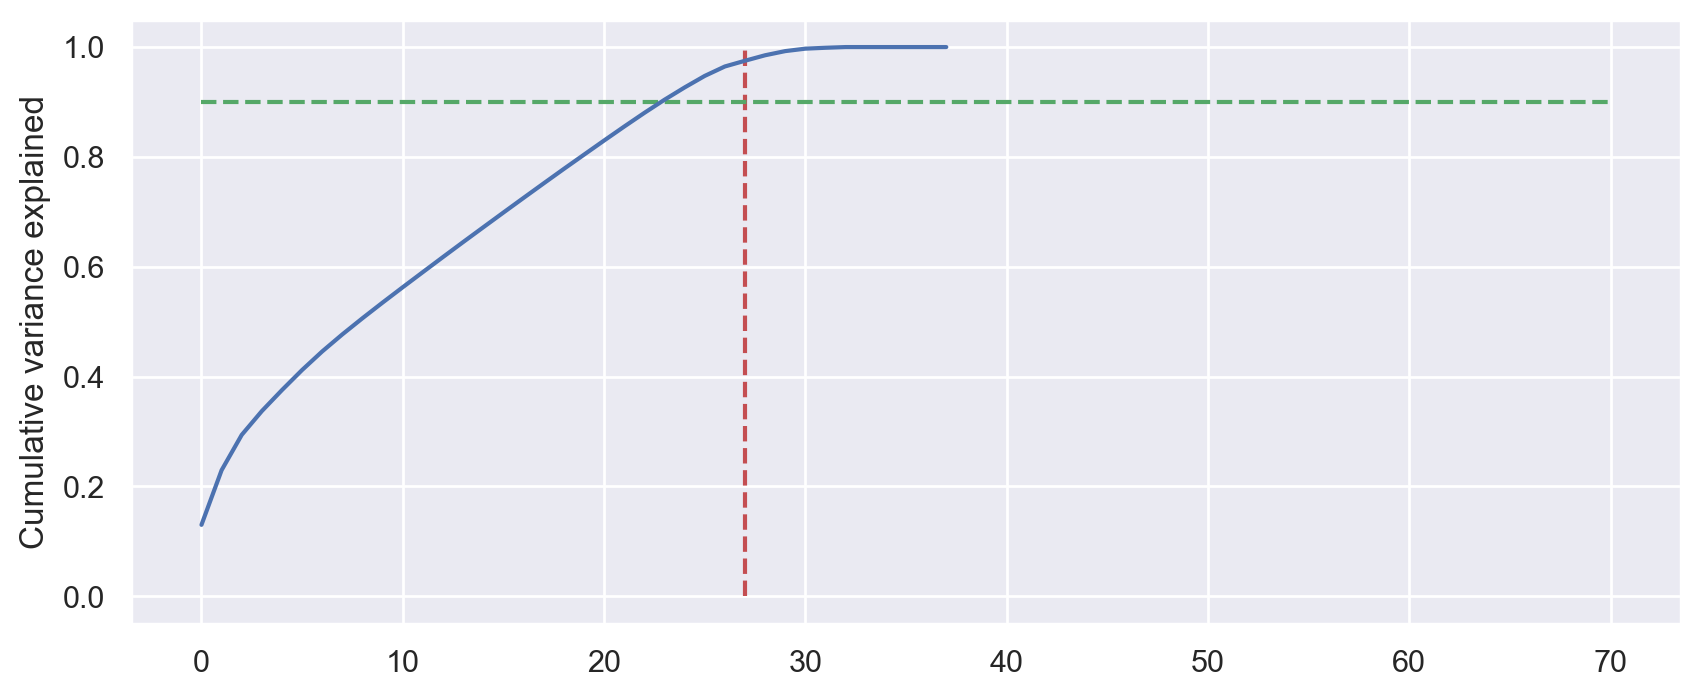

In [246]:
fig = plt.figure(figsize=[10,4],dpi=200)
plt.vlines(x=27, ymax=1, ymin=0, colors="r", linestyles="--") 
plt.hlines(y=0.90, xmax=70, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

 Wnioski:  Wykres pokazuje nam z 36 kolumn (wszytskie dane)ktore opisuje nam 100% a 27 kolumn opisuja nam okolo 90%, stad mozemy usunac 6 kolumn bo ich wartosc dodana jest niewielka.

In [247]:
from sklearn.decomposition import IncrementalPCA 
pca_final = IncrementalPCA(n_components=27)  
X_pca_final = pca_final.fit_transform(X_scaled)

In [248]:
print(X.shape)
print(X_pca_final.shape)

(39529, 38)
(39529, 27)


In [249]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [250]:
corrmat.shape

(27, 27)

<AxesSubplot:>

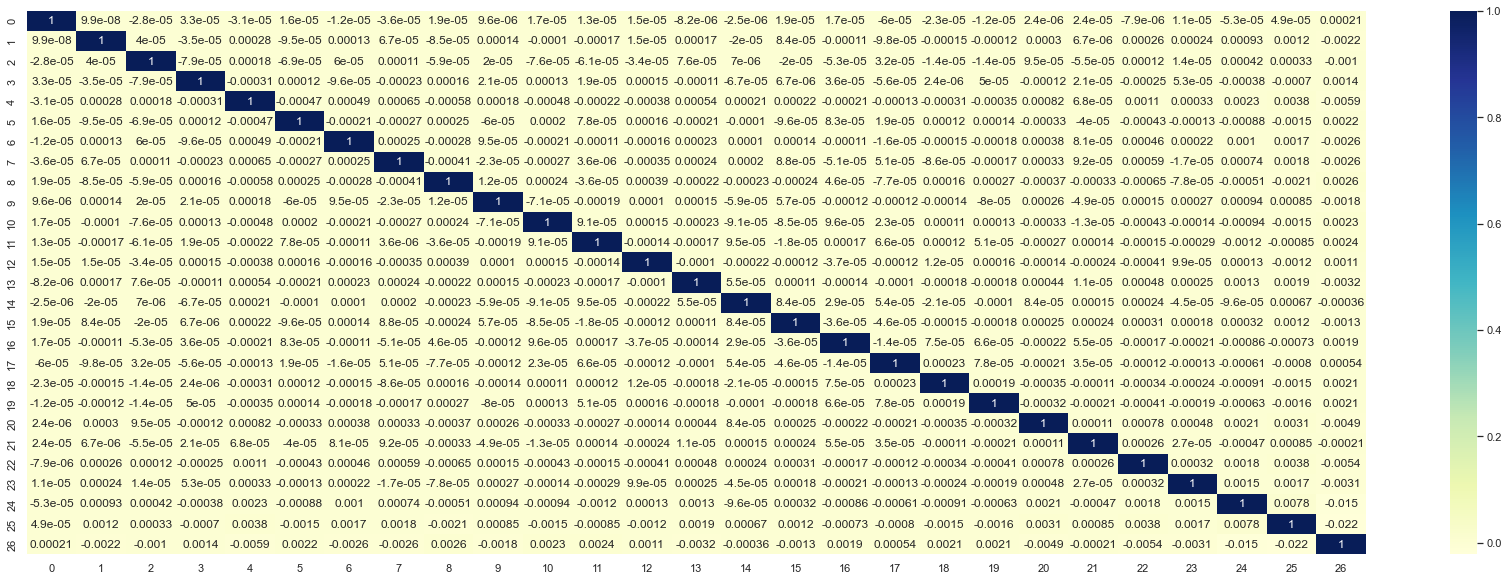

In [251]:
plt.figure(figsize=[30,10])
sns.heatmap(corrmat, annot=True,cmap="YlGnBu") 

 Każda z kolumn niesie dużą wartość informacyjną i żadne z nich nie są do siebie podobne, ponieważ wartości korelacji bliskie są 0 (na diagonalu zawsze będziemy mieć wartość 1).

In [252]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

PC1       PC2      Feature
0 -0.075763 -0.456327    loan_amnt
1 -0.115250 -0.197071         term
2 -0.396751 -0.062228     int_rate
3 -0.075183 -0.416663  installment
4  0.385842  0.053393        grade

In [253]:
pca_df

PC1       PC2                              Feature
0  -0.075763 -0.456327                            loan_amnt
1  -0.115250 -0.197071                                 term
2  -0.396751 -0.062228                             int_rate
3  -0.075183 -0.416663                          installment
4   0.385842  0.053393                                grade
5   0.022328 -0.125331                           emp_length
6   0.013145 -0.153264                           annual_inc
7  -0.124505 -0.048364                                  dti
8  -0.088296  0.049041                          delinq_2yrs
9   0.407511 -0.164598                       fico_range_low
10  0.407511 -0.164598                      fico_range_high
11 -0.021756 -0.118775                             open_acc
12 -0.290641  0.029810                           revol_util
13 -0.058954  0.026473                 pub_rec_bankruptcies
14  0.075346 -0.166934              home_ownership_MORTGAGE
15 -0.003492  0.009980                 home_ownership_OTHER
16  0.018563  0.010524                   home_ownership_OWN
17 -0.084295  0.159663                  home_ownership_RENT
18  0.078175  0.217856     verification_status_Not Verified
19 -0.010271  0.052968  verification_status_Source Verified
20 -0.072979 -0.279053         verification_status_Verified
21  0.058714  0.060020                          purpose_car
22 -0.005858 -0.008435                  purpose_credit_card
23 -0.108062 -0.127616           purpose_debt_consolidation
24  0.003762  0.044844                  purpose_educational
25  0.065237 -0.029212             purpose_home_improvement
26  0.008867 -0.009564                        purpose_house
27  0.059983  0.060219               purpose_major_purchase
28  0.014005  0.035218                      purpose_medical
29  0.007841  0.060339                       purpose_moving
30  0.019338  0.111200                        purpose_other
31  0.006711  0.008246             purpose_renewable_energy
32  0.006533 -0.039937               purpose_small_business
33  0.015988  0.051984                     purpose_vacation
34  0.005518  0.023531                      purpose_wedding
35  0.407511 -0.164598                                 fico
36 -0.074648 -0.335362                     %_loan_to_income
37  0.063934  0.297991   proportions_of_earnings_and_credit

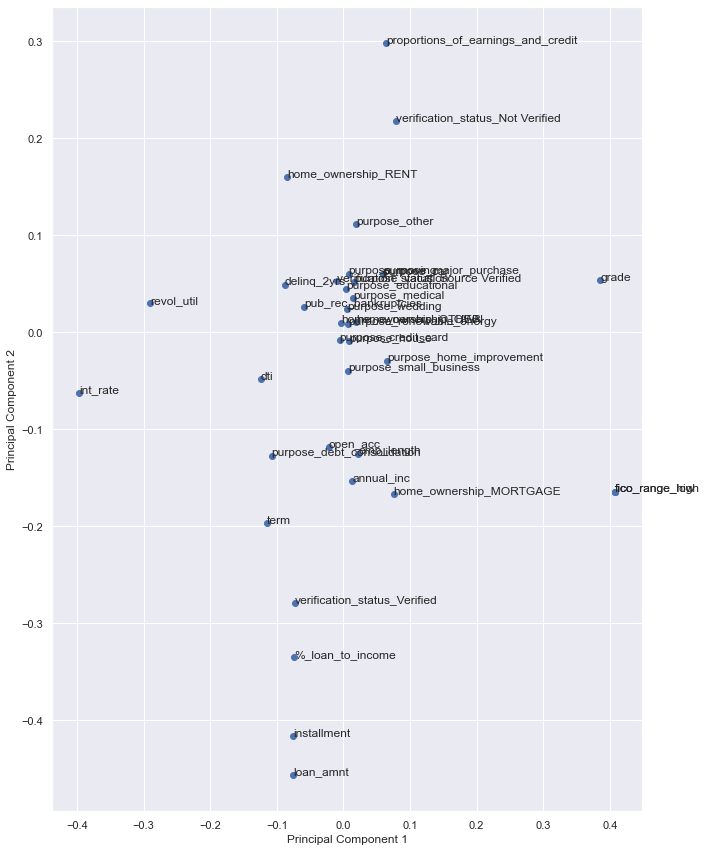

In [254]:
fig = plt.figure(figsize = (10,12))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

4.4 Klasteryzacja

In [255]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [256]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5)

In [257]:
kmeans.labels_

array([3, 4, 3, ..., 3, 3, 1])

4.4.1. Określenie optymalnej liczby klastrów

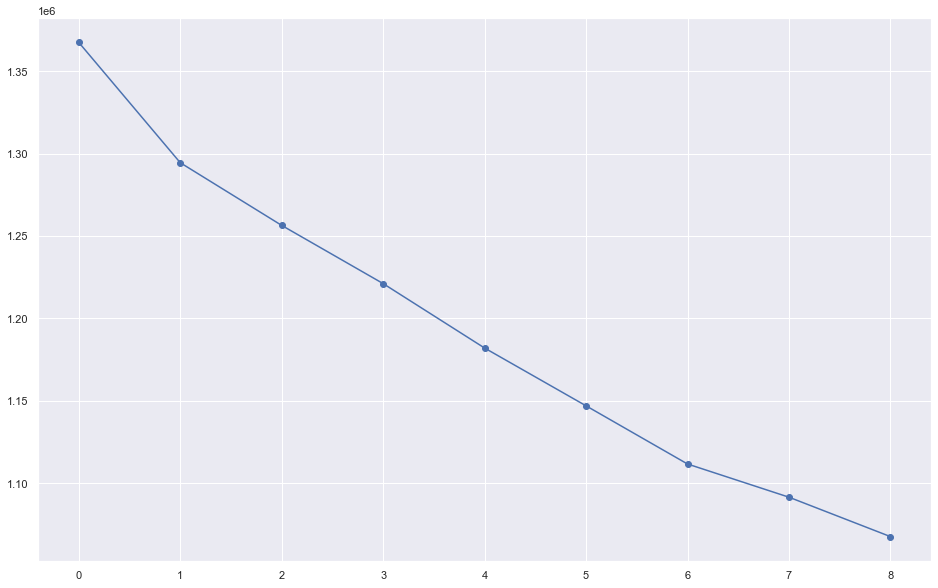

In [258]:
# metoda łokcia - elbow-curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd, marker = "o" )

Metoda łokciowa wyznaczyła optymalną ilość klastrów na 5.

In [259]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.09644521629234146
For n_clusters=3, the silhouette score is 0.07808616347922155
For n_clusters=4, the silhouette score is 0.08383301495886591
For n_clusters=5, the silhouette score is 0.09374887411157452
For n_clusters=6, the silhouette score is 0.09439464434427654
For n_clusters=7, the silhouette score is 0.1057977174994765
For n_clusters=8, the silhouette score is 0.07781816421330902
For n_clusters=9, the silhouette score is 0.07591597456743851
For n_clusters=10, the silhouette score is 0.08473888544679006


In [260]:
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=42)
kmeans.fit(X_scaled)

KMeans(max_iter=1000, n_clusters=5, random_state=42)

In [261]:
kmeans.labels_

array([3, 2, 3, ..., 3, 3, 1])

In [262]:
X_pca_final.shape

(39529, 27)

In [263]:
X.shape

(39529, 38)

 4.4.2. K-Means Clustering

In [264]:
# Dodaję przypisane klastry do datasetu
X['K-Means_Cluster_ID'] = kmeans.labels_

In [265]:
X.head()

loan_amnt  term  int_rate  installment  grade  emp_length  annual_inc  \
0     5000.0  36.0     10.65       162.87      6          10     24000.0   
1     2500.0  60.0     15.27        59.83      5           0     30000.0   
2     2400.0  36.0     15.96        84.33      5          10     12252.0   
3    10000.0  36.0     13.49       339.31      5          10     49200.0   
4     3000.0  60.0     12.69        67.79      6           1     80000.0   

     dti  delinq_2yrs  fico_range_low  ...  purpose_moving  purpose_other  \
0  27.65          0.0             735  ...               0              0   
1   1.00          0.0             740  ...               0              0   
2   8.72          0.0             735  ...               0              0   
3  20.00          0.0             690  ...               0              1   
4  17.94          0.0             695  ...               0              1   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       1                 0   
3                         0                       0                 0   
4                         0                       0                 0   

   purpose_wedding   fico  %_loan_to_income  \
0                0  737.0             20.83   
1                0  742.0              8.33   
2                0  737.0             19.59   
3                0  692.0             20.33   
4                0  697.0              3.75   

   proportions_of_earnings_and_credit  K-Means_Cluster_ID  
0                                4.80                   3  
1                               12.00                   2  
2                                5.11                   3  
3                                4.92                   3  
4                               26.67                   3  

[5 rows x 39 columns]

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='loan_amnt'>

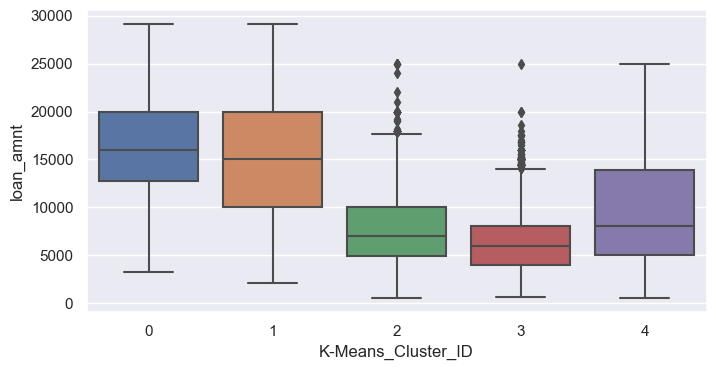

In [266]:
# I plotuję klastry w odniesieniu do loan_amnt
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=X)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='annual_inc'>

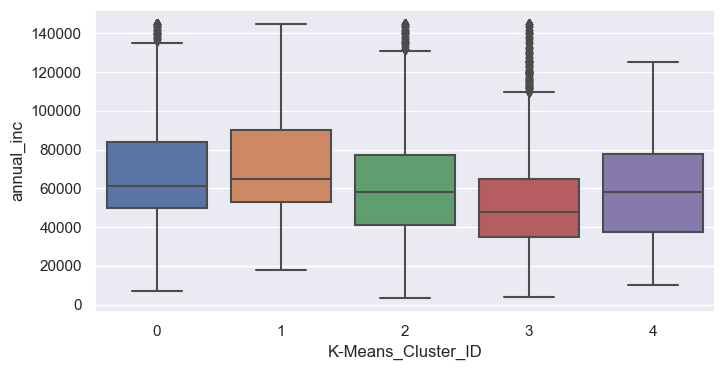

In [267]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=X)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='installment'>

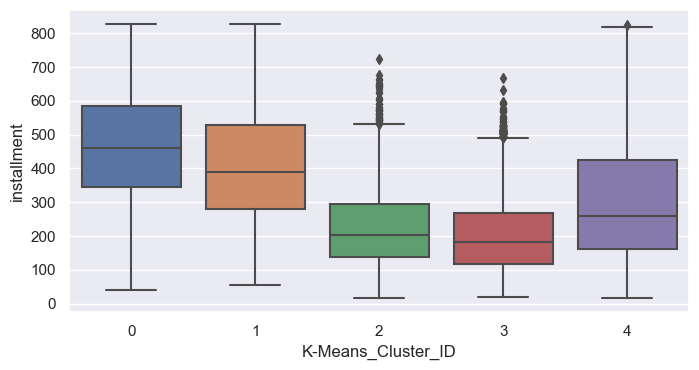

In [268]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='K-Means_Cluster_ID', y='installment', data=X)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='emp_length'>

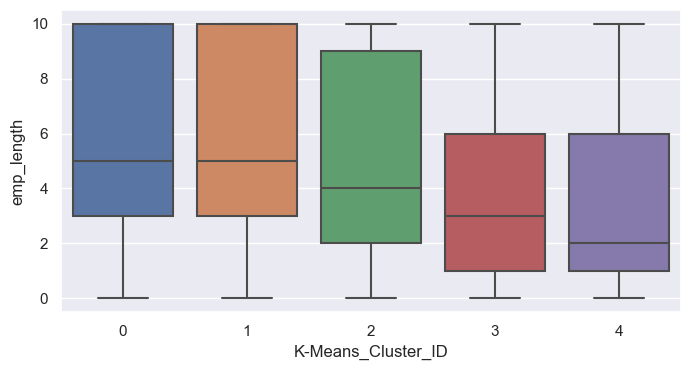

In [269]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='K-Means_Cluster_ID', y='emp_length', data=X)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='fico'>

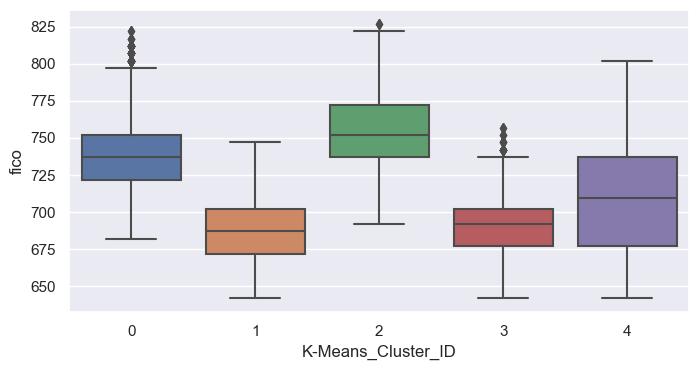

In [270]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='K-Means_Cluster_ID', y='fico', data=X)

In [271]:
X_scaled_df.head()

loan_amnt      term  int_rate  installment     grade  emp_length  \
0  -0.872258 -0.604658 -0.409194    -0.803291  0.452825    1.413450   
1  -1.266366  1.653826  0.833480    -1.384449 -0.252444   -1.396941   
2  -1.282131 -0.604658  1.019075    -1.246266 -0.252444    1.413450   
3  -0.084040 -0.604658  0.354701     0.191851 -0.252444    1.413450   
4  -1.187545  1.653826  0.139519    -1.339553  0.452825   -1.115902   

   annual_inc       dti  delinq_2yrs  fico_range_low  ...  purpose_medical  \
0   -1.376639  2.126807    -0.320375        0.597291  ...        -0.132499   
1   -1.158392 -1.870087    -0.320375        0.737640  ...        -0.132499   
2   -1.803967 -0.712262    -0.320375        0.597291  ...        -0.132499   
3   -0.460001  0.979481    -0.320375       -0.665848  ...        -0.132499   
4    0.660335  0.670528    -0.320375       -0.525500  ...        -0.132499   

   purpose_moving  purpose_other  purpose_renewable_energy  \
0       -0.121065      -0.334134                 -0.048823   
1       -0.121065      -0.334134                 -0.048823   
2       -0.121065      -0.334134                 -0.048823   
3       -0.121065       2.992813                 -0.048823   
4       -0.121065       2.992813                 -0.048823   

   purpose_small_business  purpose_vacation  purpose_wedding      fico  \
0               -0.219121         -0.095195        -0.156584  0.597291   
1               -0.219121         -0.095195        -0.156584  0.737640   
2                4.563679         -0.095195        -0.156584  0.597291   
3               -0.219121         -0.095195        -0.156584 -0.665848   
4               -0.219121         -0.095195        -0.156584 -0.525500   

   %_loan_to_income  proportions_of_earnings_and_credit  
0          0.190811                           -0.458906  
1         -0.925240                            0.454482  
2          0.080099                           -0.419580  
3          0.146169                           -0.443683  
4         -1.334161                            2.315509  

[5 rows x 38 columns]

 4.2.3. Klastering hierarchiczny

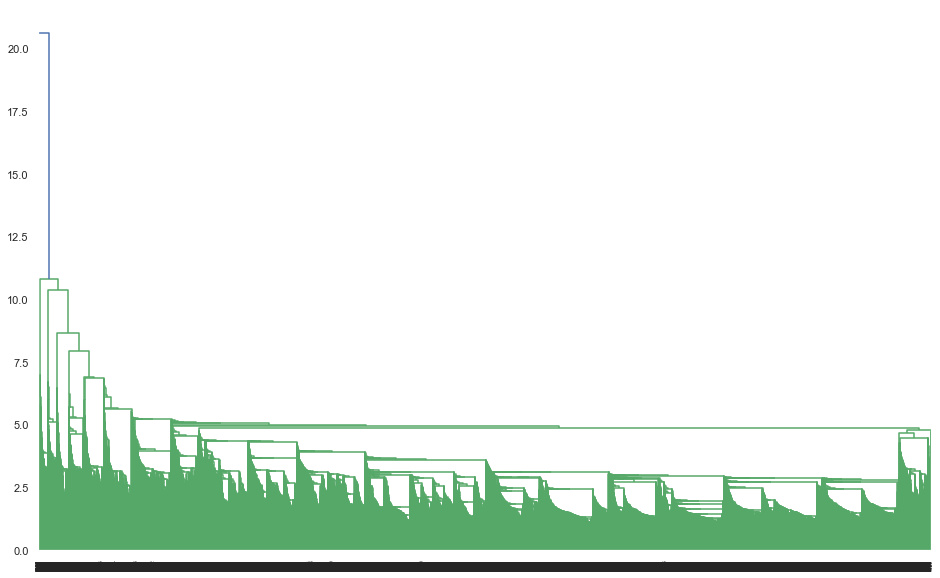

In [272]:
sl_mergings = linkage(X_scaled_df[:10000], method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

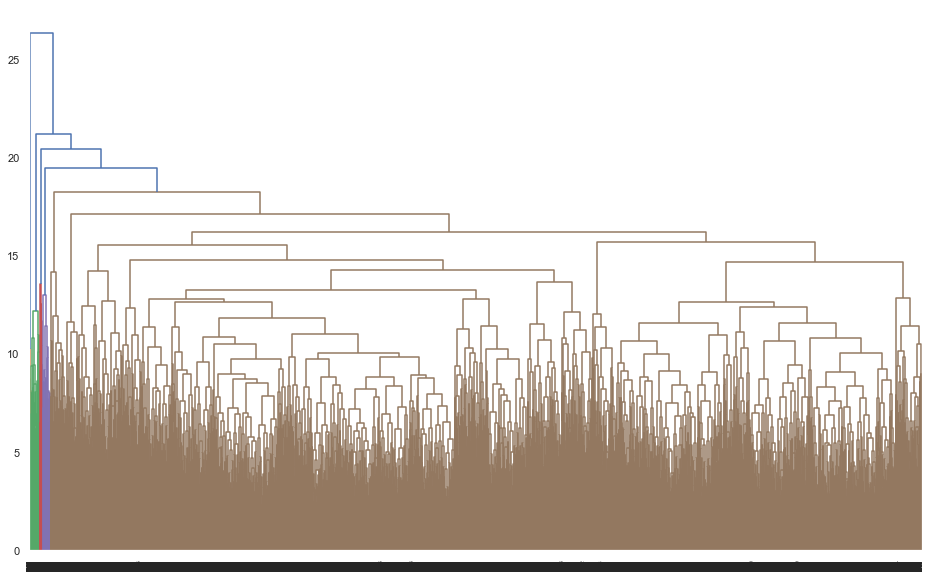

In [273]:
cl_mergings = linkage(X_scaled_df[:10000], method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

In [274]:
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=5).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [275]:
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=5).reshape(-1, )
cl_cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [276]:
df_hierarchical = X[:10000].copy()

In [277]:
df_hierarchical["Hierarchical_Cluster_labels"] = cl_cluster_labels

In [278]:
df_hierarchical.head()

loan_amnt  term  int_rate  installment  grade  emp_length  annual_inc  \
0     5000.0  36.0     10.65       162.87      6          10     24000.0   
1     2500.0  60.0     15.27        59.83      5           0     30000.0   
2     2400.0  36.0     15.96        84.33      5          10     12252.0   
3    10000.0  36.0     13.49       339.31      5          10     49200.0   
4     3000.0  60.0     12.69        67.79      6           1     80000.0   

     dti  delinq_2yrs  fico_range_low  ...  purpose_other  \
0  27.65          0.0             735  ...              0   
1   1.00          0.0             740  ...              0   
2   8.72          0.0             735  ...              0   
3  20.00          0.0             690  ...              1   
4  17.94          0.0             695  ...              1   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       1                 0   
3                         0                       0                 0   
4                         0                       0                 0   

   purpose_wedding   fico  %_loan_to_income  \
0                0  737.0             20.83   
1                0  742.0              8.33   
2                0  737.0             19.59   
3                0  692.0             20.33   
4                0  697.0              3.75   

   proportions_of_earnings_and_credit  K-Means_Cluster_ID  \
0                                4.80                   3   
1                               12.00                   2   
2                                5.11                   3   
3                                4.92                   3   
4                               26.67                   3   

   Hierarchical_Cluster_labels  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 40 columns]

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='loan_amnt'>

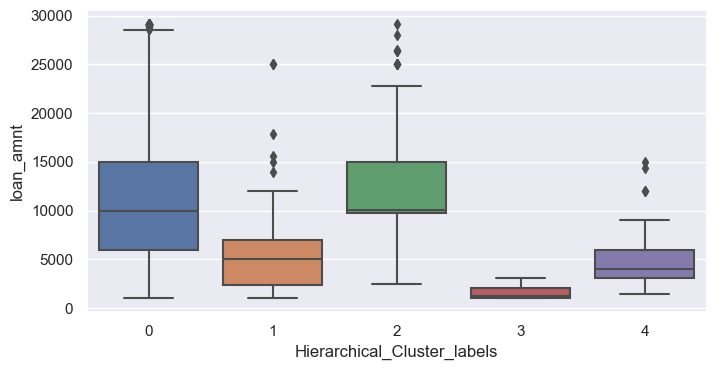

In [279]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='Hierarchical_Cluster_labels', y='loan_amnt', data=df_hierarchical)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='annual_inc'>

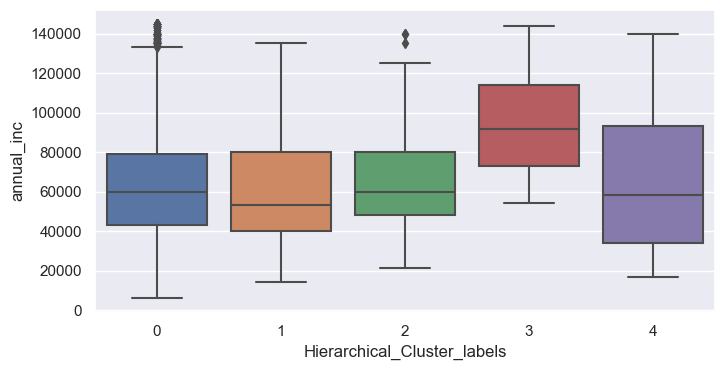

In [280]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='Hierarchical_Cluster_labels', y='annual_inc', data=df_hierarchical)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='installment'>

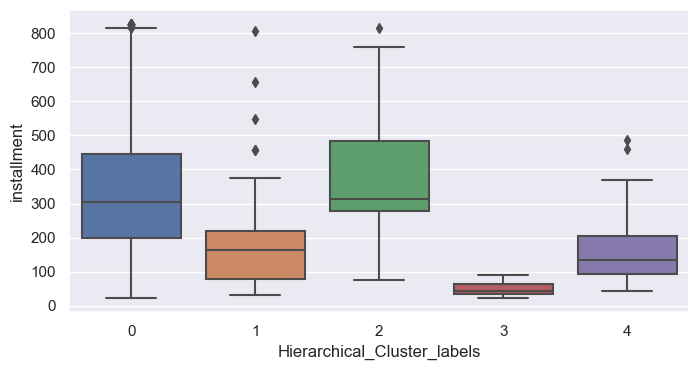

In [281]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='Hierarchical_Cluster_labels', y='installment', data=df_hierarchical)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='emp_length'>

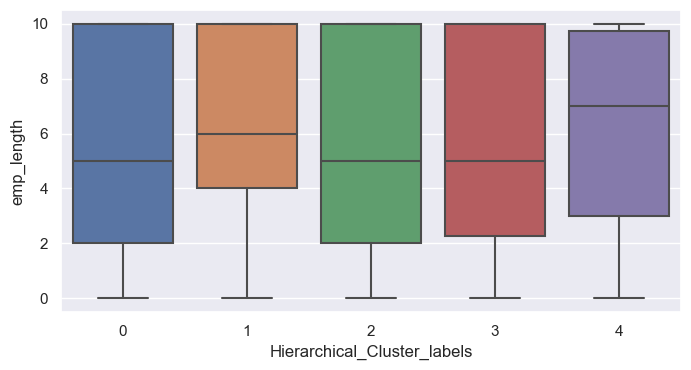

In [282]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='Hierarchical_Cluster_labels', y='emp_length', data=df_hierarchical)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='fico'>

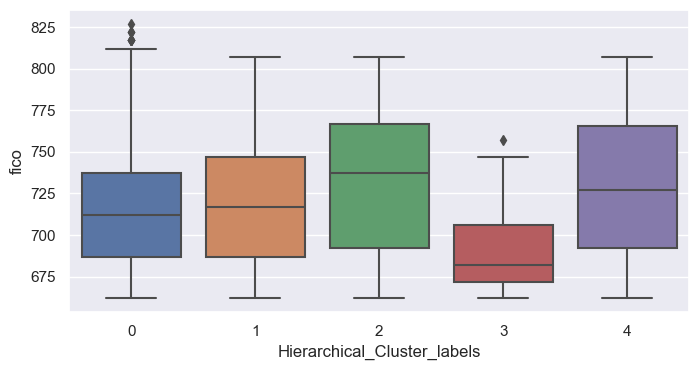

In [283]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='Hierarchical_Cluster_labels', y='fico', data=df_hierarchical)

In [284]:
df_hierarchical

loan_amnt  term  int_rate  installment  grade  emp_length  annual_inc  \
0         5000.0  36.0     10.65       162.87      6          10     24000.0   
1         2500.0  60.0     15.27        59.83      5           0     30000.0   
2         2400.0  36.0     15.96        84.33      5          10     12252.0   
3        10000.0  36.0     13.49       339.31      5          10     49200.0   
4         3000.0  60.0     12.69        67.79      6           1     80000.0   
...          ...   ...       ...          ...    ...         ...         ...   
10460    16000.0  60.0     19.69       421.15      3           7     82000.0   
10461     8000.0  36.0     11.49       263.78      6           5    100000.0   
10462     8000.0  60.0     18.39       204.85      3           7     79010.0   
10464    11000.0  36.0     10.59       358.00      6           3     46000.0   
10465    18000.0  36.0     15.62       629.46      4          10     54000.0   

         dti  delinq_2yrs  fico_range_low  ...  purpose_other  \
0      27.65          0.0             735  ...              0   
1       1.00          0.0             740  ...              0   
2       8.72          0.0             735  ...              0   
3      20.00          0.0             690  ...              1   
4      17.94          0.0             695  ...              1   
...      ...          ...             ...  ...            ...   
10460  22.36          0.0             670  ...              0   
10461  12.64          0.0             680  ...              0   
10462   8.79          0.0             665  ...              0   
10464  14.71          0.0             710  ...              0   
10465  25.58          0.0             720  ...              0   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                             0                       0                 0   
1                             0                       0                 0   
2                             0                       1                 0   
3                             0                       0                 0   
4                             0                       0                 0   
...                         ...                     ...               ...   
10460                         0                       0                 0   
10461                         0                       0                 0   
10462                         0                       0                 0   
10464                         0                       0                 0   
10465                         0                       0                 0   

       purpose_wedding   fico  %_loan_to_income  \
0                    0  737.0             20.83   
1                    0  742.0              8.33   
2                    0  737.0             19.59   
3                    0  692.0             20.33   
4                    0  697.0              3.75   
...                ...    ...               ...   
10460                0  672.0             19.51   
10461                0  682.0              8.00   
10462                0  667.0             10.13   
10464                0  712.0             23.91   
10465                0  722.0             33.33   

       proportions_of_earnings_and_credit  K-Means_Cluster_ID  \
0                                    4.80                   3   
1                                   12.00                   2   
2                                    5.11                   3   
3                                    4.92                   3   
4                                   26.67                   3   
...                                   ...                 ...   
10460                                5.12                   1   
10461                               12.50                   3   
10462                                9.88                   1   
10464                                4.18                   3   
10465       

In [285]:
X

loan_amnt  term  int_rate  installment  grade  emp_length  annual_inc  \
0         5000.0  36.0     10.65       162.87      6          10     24000.0   
1         2500.0  60.0     15.27        59.83      5           0     30000.0   
2         2400.0  36.0     15.96        84.33      5          10     12252.0   
3        10000.0  36.0     13.49       339.31      5          10     49200.0   
4         3000.0  60.0     12.69        67.79      6           1     80000.0   
...          ...   ...       ...          ...    ...         ...         ...   
42371    20425.0  36.0     15.96       298.67      2           4     29000.0   
42386     4400.0  36.0     17.86       158.77      1           9    125000.0   
42454     5700.0  36.0     13.43       193.26      3           5     65000.0   
42466     6000.0  36.0     12.80       201.60      4           8     57000.0   
42474    13000.0  36.0     10.91       425.04      5           2     62000.0   

         dti  delinq_2yrs  fico_range_low  ...  purpose_moving  purpose_other  \
0      27.65          0.0             735  ...               0              0   
1       1.00          0.0             740  ...               0              0   
2       8.72          0.0             735  ...               0              0   
3      20.00          0.0             690  ...               0              1   
4      17.94          0.0             695  ...               0              1   
...      ...          ...             ...  ...             ...            ...   
42371  11.42          0.0             665  ...               0              0   
42386  25.77          1.0             660  ...               0              0   
42454  18.22          0.0             665  ...               0              0   
42466  15.20          2.0             665  ...               0              0   
42474  20.00          0.0             695  ...               0              0   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                             0                       0                 0   
1                             0                       0                 0   
2                             0                       1                 0   
3                             0                       0                 0   
4                             0                       0                 0   
...                         ...                     ...               ...   
42371                         0                       0                 0   
42386                         0                       0                 0   
42454                         0                       0                 0   
42466                         0                       0                 0   
42474                         0                       0                 0   

       purpose_wedding   fico  %_loan_to_income  \
0                    0  737.0             20.83   
1                    0  742.0              8.33   
2                    0  737.0             19.59   
3                    0  692.0             20.33   
4                    0  697.0              3.75   
...                ...    ...               ...   
42371                0  667.0             70.43   
42386                0  662.0              3.52   
42454                0  667.0              8.77   
42466                0  667.0             10.53   
42474                0  697.0             20.97   

       proportions_of_earnings_and_credit  K-Means_Cluster_ID  
0                                    4.80                   3  
1                                   12.00                   2  
2                                    5.11                   3  
3                                    4.92                   3  
4                                   26.67                   3  
...                                   ...                 ...  
42371                                1.42                   1  
42386                  

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='fico'>

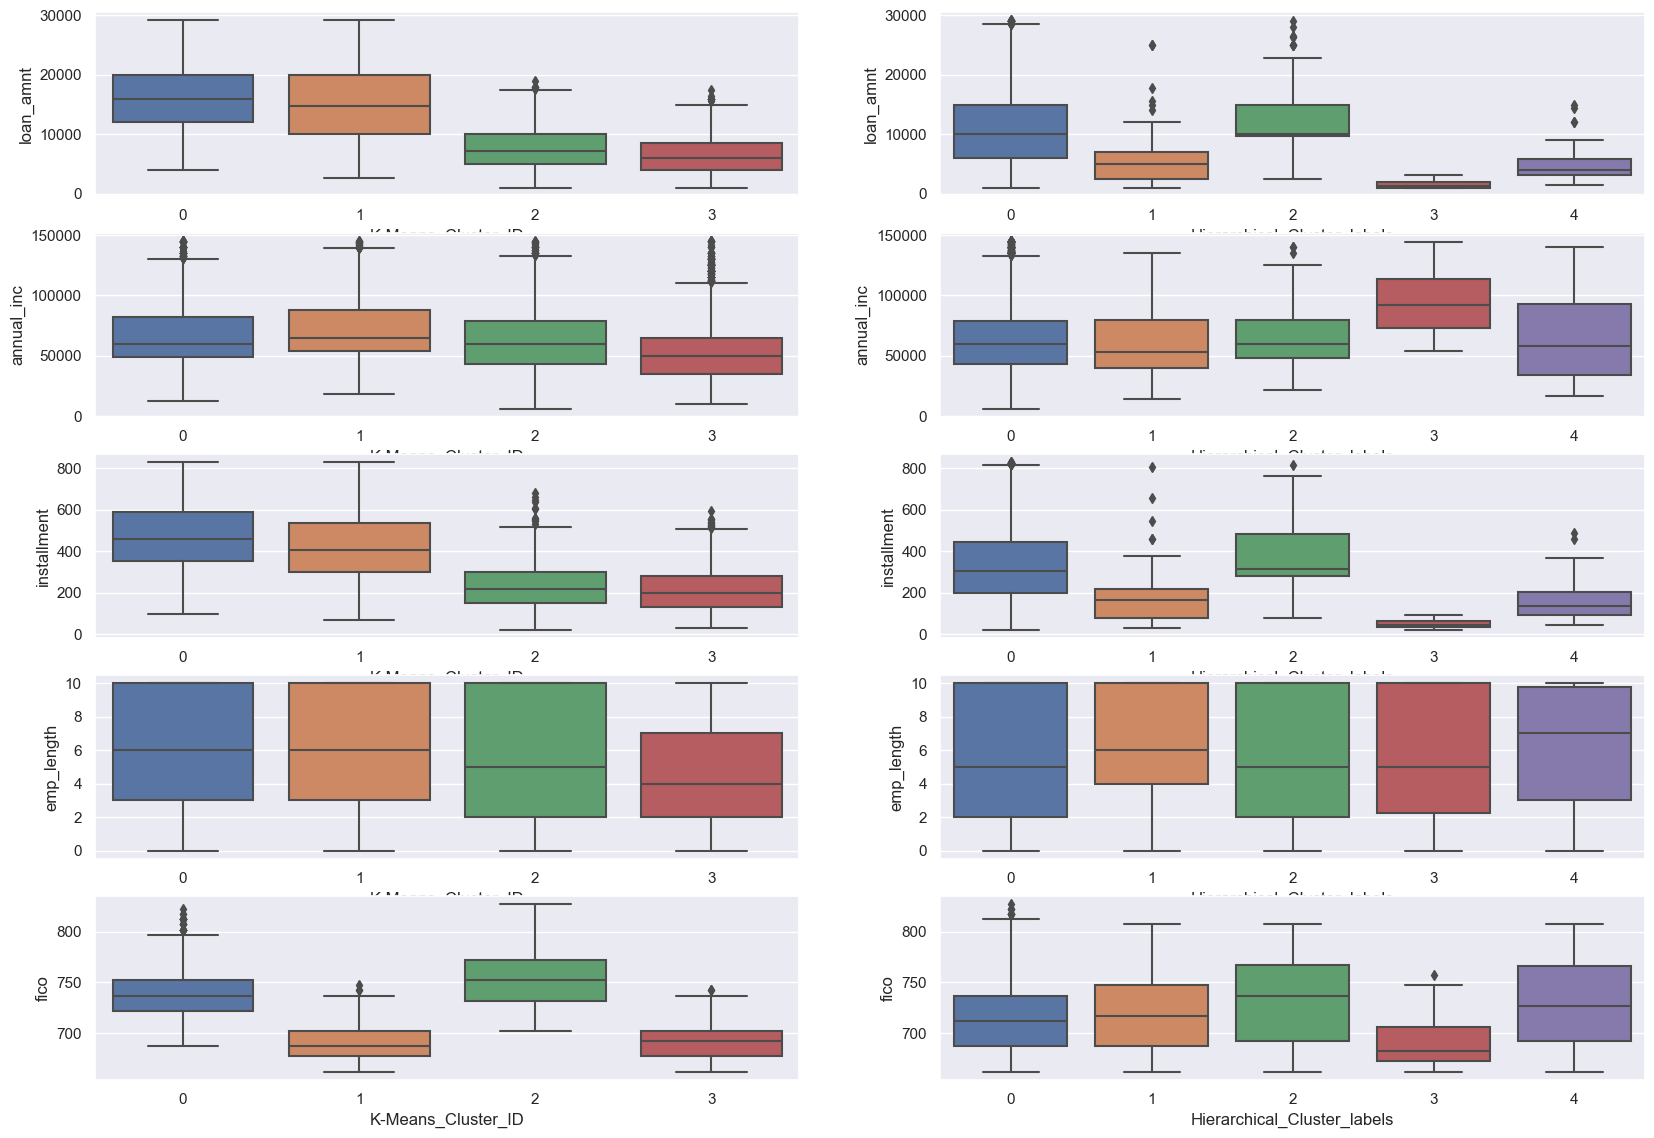

In [286]:
plt.figure(figsize=(20,20), dpi=100)

plt.subplot(7,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=df_hierarchical)

plt.subplot(7,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='loan_amnt', data=df_hierarchical)

plt.subplot(7,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=df_hierarchical)

plt.subplot(7,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='annual_inc', data=df_hierarchical)

plt.subplot(7,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='installment', data=df_hierarchical)

plt.subplot(7,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='installment', data=df_hierarchical)

plt.subplot(7,2,7)
sns.boxplot(x='K-Means_Cluster_ID', y='emp_length', data=df_hierarchical)

plt.subplot(7,2,8)
sns.boxplot(x='Hierarchical_Cluster_labels', y='emp_length', data=df_hierarchical)

plt.subplot(7,2,9)
sns.boxplot(x='K-Means_Cluster_ID', y='fico', data=df_hierarchical)

plt.subplot(7,2,10)
sns.boxplot(x='Hierarchical_Cluster_labels', y='fico', data=df_hierarchical)



 Na przykładzie fico widzimy,że klastry pożyczkobiorców są zróżnicowane. Według metody K-Means mediana w klastrze 0  wynosi 705, dla klastra 1 jest to wartość około 740, dla klastra 2 wartość około 730, dla klastra 3 wartosc to ok. 750 a dla 4 to ok. 640. W klastrze 1 znajduje się najwięcej outlierów, troche mniej ale równiez znajduje się w klastrze 4. Wielkość klastrów jest zróżnicowana, najwiekszy jest klaster 2, klastry 0 i 3 są o podobnym rozmiarze. w miarę porównywalna, klaster 2 jest minimalnie większy od klastra 1. Klaster 0 i 1 są zbliżonej wielkości.
 Według metody klasyfikacji hierarchicznej mediana dla klastra 0 wynosi 705 (czyli tyle ile dla klastra 1 w metodzie K-means). Wielkosci klastrów nie sa już tak zróżnicowane, 0,1 i 2 są zbliżonego rozmiaru, podobnie jak 3 i 4 (ale są większe od poprzednich)
    

In [287]:
X_pca_final.shape

(39529, 27)

In [288]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
                                                   'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16','PC17','PC18','PC19',
                                                   'PC20','PC21','PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27']) 

In [289]:
X_pca_final_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.387961 -0.247137 -1.501631  0.638822  0.205914  2.271054  1.708445   
1  1.406500 -2.176332 -1.291822 -3.993196  0.574214 -1.214674 -0.130623   
2  0.187103 -1.658590 -1.619348 -0.985562 -2.208632  0.051060 -0.435178   
3 -0.882642 -0.803344 -0.855103 -1.057516  0.636994  0.171939  0.929344   
4 -0.494237 -2.859810  0.792656 -1.539764  2.023658  0.889900  0.110960   

        PC8       PC9      PC10  ...      PC18      PC19      PC20      PC21  \
0  2.108503 -0.671079 -0.528939  ... -0.229330  0.537530  0.591114 -0.610111   
1  0.554812 -3.462447 -1.416853  ... -1.083426  1.549662  0.012686 -0.410558   
2 -0.808264 -1.837096 -0.136632  ...  0.209232 -1.069288  0.191458 -1.358166   
3  1.217192  0.308697  2.746599  ...  0.228813 -0.096209  0.402398  1.114574   
4  1.824484 -0.344737  2.363552  ...  0.257181 -0.886282 -0.129606  0.098330   

       PC22      PC23      PC24      PC25      PC26      PC27  
0 -1.068212  2.468388  0.382438  0.671480 -0.212040 -0.544282  
1  0.381582 -0.991561 -0.334739 -0.432511 -0.365155 -0.240799  
2 -0.763502  2.779279  1.375914  0.127760  1.464116 -0.328204  
3  0.675217  0.230872  1.843733 -0.819337 -1.217487 -0.459217  
4  1.660738 -0.648407 -0.746425  0.485379  0.293614  0.781567  

[5 rows x 27 columns]

In [290]:
X_pca_final_df_hierarchical= X_pca_final_df[:10000].copy()

In [291]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df_hierarchical['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [292]:
 X_pca_final_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.387961 -0.247137 -1.501631  0.638822  0.205914  2.271054  1.708445   
1  1.406500 -2.176332 -1.291822 -3.993196  0.574214 -1.214674 -0.130623   
2  0.187103 -1.658590 -1.619348 -0.985562 -2.208632  0.051060 -0.435178   
3 -0.882642 -0.803344 -0.855103 -1.057516  0.636994  0.171939  0.929344   
4 -0.494237 -2.859810  0.792656 -1.539764  2.023658  0.889900  0.110960   

        PC8       PC9      PC10  ...      PC19      PC20      PC21      PC22  \
0  2.108503 -0.671079 -0.528939  ...  0.537530  0.591114 -0.610111 -1.068212   
1  0.554812 -3.462447 -1.416853  ...  1.549662  0.012686 -0.410558  0.381582   
2 -0.808264 -1.837096 -0.136632  ... -1.069288  0.191458 -1.358166 -0.763502   
3  1.217192  0.308697  2.746599  ... -0.096209  0.402398  1.114574  0.675217   
4  1.824484 -0.344737  2.363552  ... -0.886282 -0.129606  0.098330  1.660738   

       PC23      PC24      PC25      PC26      PC27  K_Means_Cluster_ID  
0  2.468388  0.382438  0.671480 -0.212040 -0.544282                   3  
1 -0.991561 -0.334739 -0.432511 -0.365155 -0.240799                   2  
2  2.779279  1.375914  0.127760  1.464116 -0.328204                   3  
3  0.230872  1.843733 -0.819337 -1.217487 -0.459217                   3  
4 -0.648407 -0.746425  0.485379  0.293614  0.781567                   3  

[5 rows x 28 columns]

In [293]:
 X_pca_final_df_hierarchical.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.387961 -0.247137 -1.501631  0.638822  0.205914  2.271054  1.708445   
1  1.406500 -2.176332 -1.291822 -3.993196  0.574214 -1.214674 -0.130623   
2  0.187103 -1.658590 -1.619348 -0.985562 -2.208632  0.051060 -0.435178   
3 -0.882642 -0.803344 -0.855103 -1.057516  0.636994  0.171939  0.929344   
4 -0.494237 -2.859810  0.792656 -1.539764  2.023658  0.889900  0.110960   

        PC8       PC9      PC10  ...      PC19      PC20      PC21      PC22  \
0  2.108503 -0.671079 -0.528939  ...  0.537530  0.591114 -0.610111 -1.068212   
1  0.554812 -3.462447 -1.416853  ...  1.549662  0.012686 -0.410558  0.381582   
2 -0.808264 -1.837096 -0.136632  ... -1.069288  0.191458 -1.358166 -0.763502   
3  1.217192  0.308697  2.746599  ... -0.096209  0.402398  1.114574  0.675217   
4  1.824484 -0.344737  2.363552  ... -0.886282 -0.129606  0.098330  1.660738   

       PC23      PC24      PC25      PC26      PC27  \
0  2.468388  0.382438  0.671480 -0.212040 -0.544282   
1 -0.991561 -0.334739 -0.432511 -0.365155 -0.240799   
2  2.779279  1.375914  0.127760  1.464116 -0.328204   
3  0.230872  1.843733 -0.819337 -1.217487 -0.459217   
4 -0.648407 -0.746425  0.485379  0.293614  0.781567   

   Hierarchical_Cluster_Labels  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 28 columns]

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

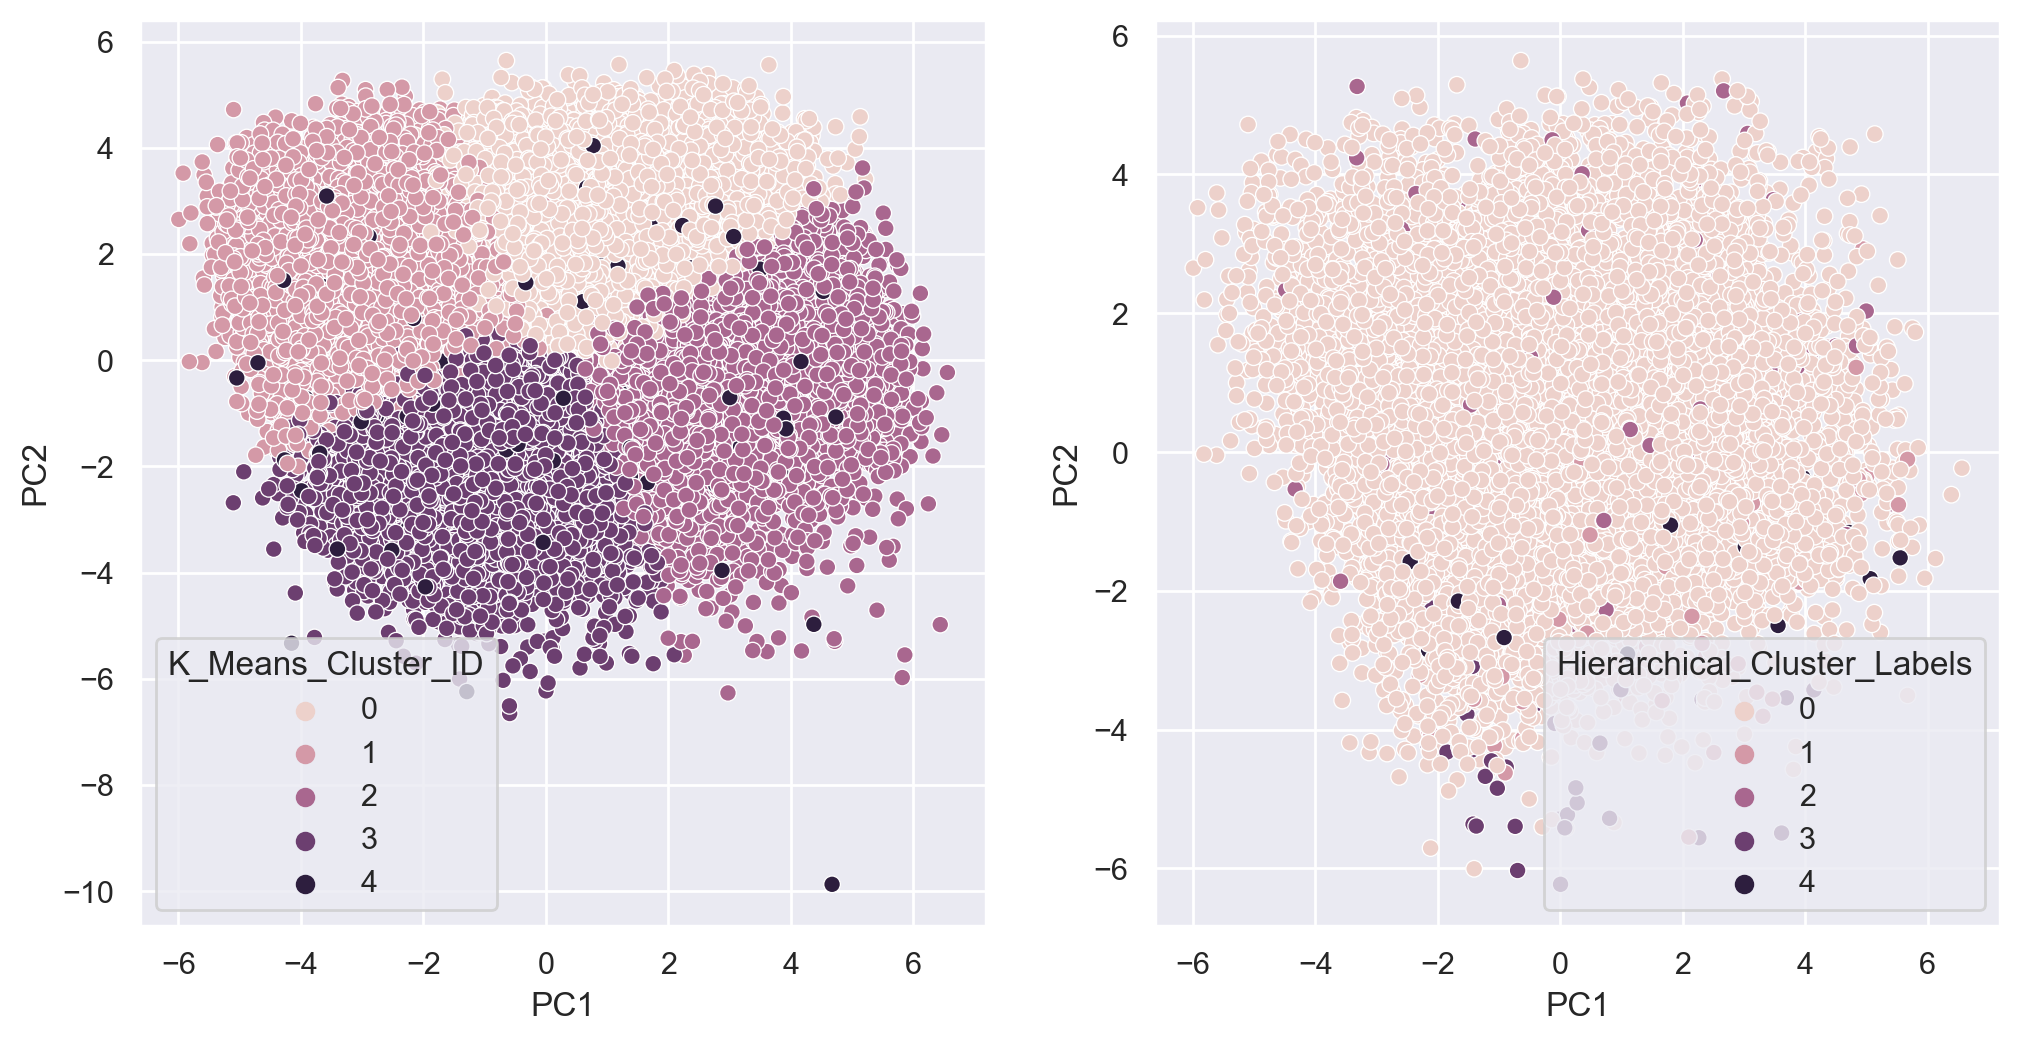

In [294]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df_hierarchical,hue='Hierarchical_Cluster_Labels')

<AxesSubplot:xlabel='loan_amnt', ylabel='emp_length'>

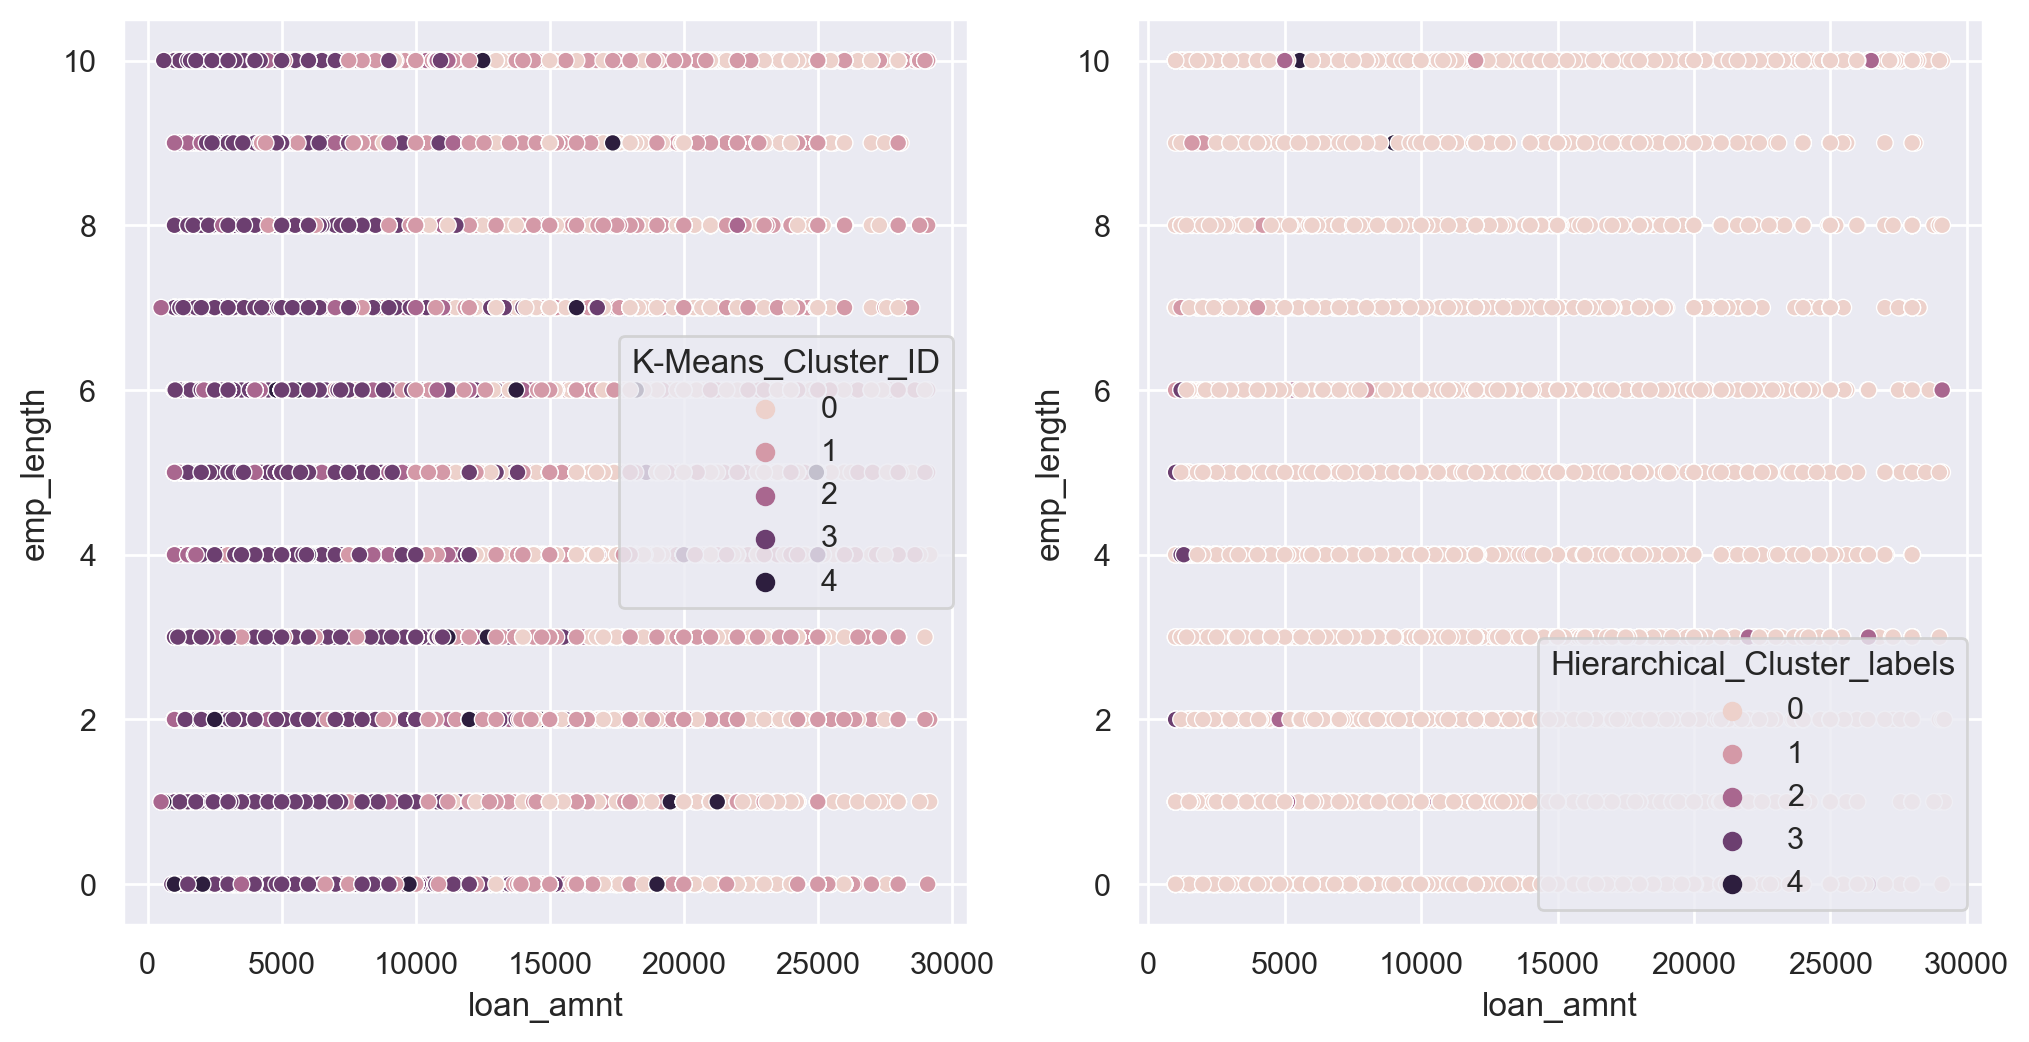

In [295]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='loan_amnt',y='emp_length',data=X,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='loan_amnt',y='emp_length',data=df_hierarchical,hue='Hierarchical_Cluster_labels')

 4.2.4. DBSCAN

In [296]:
X_scaled

loan_amnt      term  int_rate  installment     grade  emp_length  \
0      -0.872258 -0.604658 -0.409194    -0.803291  0.452825    1.413450   
1      -1.266366  1.653826  0.833480    -1.384449 -0.252444   -1.396941   
2      -1.282131 -0.604658  1.019075    -1.246266 -0.252444    1.413450   
3      -0.084040 -0.604658  0.354701     0.191851 -0.252444    1.413450   
4      -1.187545  1.653826  0.139519    -1.339553  0.452825   -1.115902   
...          ...       ...       ...          ...       ...         ...   
42371   1.559393 -0.604658  1.019075    -0.037364 -2.368251   -0.272785   
42386  -0.966844 -0.604658  1.530131    -0.826416 -3.073521    1.132411   
42454  -0.761907 -0.604658  0.338562    -0.631888 -1.662982    0.008254   
42466  -0.714614 -0.604658  0.169107    -0.584850 -0.957713    0.851372   
42474   0.388890 -0.604658 -0.339260     0.675378 -0.252444   -0.834863   

       annual_inc       dti  delinq_2yrs  fico_range_low  ...  \
0       -1.376639  2.126807    -0.320375        0.597291  ...   
1       -1.158392 -1.870087    -0.320375        0.737640  ...   
2       -1.803967 -0.712262    -0.320375        0.597291  ...   
3       -0.460001  0.979481    -0.320375       -0.665848  ...   
4        0.660335  0.670528    -0.320375       -0.525500  ...   
...           ...       ...          ...             ...  ...   
42371   -1.194766 -0.307324    -0.320375       -1.367593  ...   
42386    2.297190  1.844850     2.337917       -1.507942  ...   
42454    0.114717  0.712521    -0.320375       -1.367593  ...   
42466   -0.176279  0.259590     4.996208       -1.367593  ...   
42474    0.005594  0.979481    -0.320375       -0.525500  ...   

       purpose_medical  purpose_moving  purpose_other  \
0            -0.132499       -0.121065      -0.334134   
1            -0.132499       -0.121065      -0.334134   
2            -0.132499       -0.121065      -0.334134   
3            -0.132499       -0.121065       2.992813   
4            -0.132499       -0.121065       2.992813   
...                ...             ...            ...   
42371        -0.132499       -0.121065      -0.334134   
42386        -0.132499       -0.121065      -0.334134   
42454        -0.132499       -0.121065      -0.334134   
42466        -0.132499       -0.121065      -0.334134   
42474        -0.132499       -0.121065      -0.334134   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                     -0.048823               -0.219121         -0.095195   
1                     -0.048823               -0.219121         -0.095195   
2                     -0.048823                4.563679         -0.095195   
3                     -0.048823               -0.219121         -0.095195   
4                     -0.048823               -0.219121         -0.095195   
...                         ...                     ...               ...   
42371                 -0.048823               -0.219121         -0.095195   
42386                 -0.048823               -0.219121         -0.095195   
42454                 -0.048823               -0.219121         -0.095195   
42466                 -0.048823               -0.219121         -0.095195   
42474                 -0.048823               -0.219121         -0.095195   

       purpose_wedding      fico  %_loan_to_income  \
0            -0.156584  0.597291          0.190811   
1            -0.156584  0.737640         -0.925240   
2            -0.156584  0.597291          0.080099   
3            -0.156584 -0.665848          0.146169   
4            -0.156584 -0.525500         -1.334161   
...                ...       ...               ...   
42371        -0.156584 -1.367593          4.619300   
42386        -0.156584 -1.507942         -1.354696   
42454        -0.156584 -1.367593         -0.885955   
42466        -0.156584 -1.367593         -0.728815   
42474        -0.156584 -0.525500          0.203311   

       proportions_of_earnings_and_credit  
0                     

In [297]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [298]:
dbs = DBSCAN(eps = 0.75, min_samples = 5).fit(X_scaled)
core_samples_mask = np.zeros_like(dbs.labels_, dtype = bool)
core_samples_mask[dbs.core_sample_indices_] = True
dbs_labels = dbs.labels_
n_clusters_ = len(set(dbs_labels)) - (1 if -1 in dbs_labels else 0)
n_noise_ = list(dbs_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 39529


 Metoda DBScan sugeruje podzial na 6 klastrow
 

# 5. Trenowanie modeli

In [299]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

 5.1. Regresja logistyczna

In [300]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [302]:
y=y.astype('int')
y.dtypes

dtype('int32')

In [303]:
model_log_reg = LogisticRegression()
model_log_reg.fit(X_scaled_train, y_train)
lr_predictions = model_log_reg.predict(X_scaled_test) 
print(classification_report(y_test,lr_predictions))
log_reg_pr= evaluate(lr_predictions,y_test)
log_reg_pr

              precision    recall  f1-score   support

           0       0.39      0.01      0.03      1706
           1       0.86      1.00      0.92     10153

    accuracy                           0.86     11859
   macro avg       0.63      0.51      0.47     11859
weighted avg       0.79      0.86      0.79     11859



{'f1-score': 0.92, 'accuracy': 0.86}

In [304]:
import sklearn.linear_model as lm

In [305]:
from sklearn.metrics import roc_auc_score
import sklearn.linear_model as lm

print('roc_auc_score lr:')
round(roc_auc_score(y_test, model_log_reg.predict_proba(X_scaled_test)[:, 1]),2)  

roc_auc_score lr:


0.69

In [306]:
AUROC_LR= round(roc_auc_score(y_test, model_log_reg.predict_proba(X_scaled_test)[:, 1]),2)

In [307]:
results = pd.DataFrame({'Method':['LogisticRegression'], 'AUROC': [AUROC_LR]},index={'1'})
results = results[['Method', 'AUROC']]
results

Method  AUROC
1  LogisticRegression   0.69

5.2. Drzewo decyzyjne

In [308]:
from sklearn.tree import DecisionTreeClassifier

In [309]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_scaled_train, y_train)
dt_predictions = dt_model.predict(X_scaled_test) 
print(classification_report(y_test,dt_predictions))
dt_pr= evaluate(dt_predictions,y_test)
dt_pr

              precision    recall  f1-score   support

           0       0.19      0.22      0.20      1706
           1       0.87      0.84      0.85     10153

    accuracy                           0.75     11859
   macro avg       0.53      0.53      0.53     11859
weighted avg       0.77      0.75      0.76     11859



{'f1-score': 0.85, 'accuracy': 0.75}

In [310]:
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_scaled_train.columns))

Feature importances: 
                                           Imp
loan_amnt                            0.038317
term                                 0.007655
int_rate                             0.114246
installment                          0.083023
grade                                0.009292
emp_length                           0.044354
annual_inc                           0.098743
dti                                  0.115104
delinq_2yrs                          0.009122
fico_range_low                       0.025648
fico_range_high                      0.025192
open_acc                             0.063464
revol_util                           0.113621
pub_rec_bankruptcies                 0.007289
home_ownership_MORTGAGE              0.009840
home_ownership_OTHER                 0.000886
home_ownership_OWN                   0.006305
home_ownership_RENT                  0.010389
verification_status_Not Verified     0.010095
verification_status_Source Verified  0.010766
verificatio

In [311]:
features = list(data.columns[:-1])
features

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'revol_util',
 'pub_rec_bankruptcies',
 'loan_status',
 'home_ownership_MORTGAGE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'fico',
 '%_loan_to_income']

In [312]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score dt:')
round(roc_auc_score(y_test, dt_model.predict_proba(X_scaled_test)[:, 1]),2)

roc_auc_score dt:


0.53

In [313]:
AUROC_DT= round(roc_auc_score(y_test, dt_model.predict_proba(X_scaled_test)[:, 1]),2)

In [314]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'AUROC': [AUROC_DT]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1  LogisticRegression   0.69
2       Decision Tree   0.53

5.3.  Random Forest

In [315]:
 from sklearn.ensemble import RandomForestClassifier

In [316]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_scaled_train, y_train)
rf_predictions = rf_model.predict(X_scaled_test) 
print(classification_report(y_test,rf_predictions))
rf_pr= evaluate(rf_predictions,y_test)
rf_pr

              precision    recall  f1-score   support

           0       0.31      0.01      0.02      1706
           1       0.86      1.00      0.92     10153

    accuracy                           0.85     11859
   macro avg       0.58      0.50      0.47     11859
weighted avg       0.78      0.85      0.79     11859



{'f1-score': 0.92, 'accuracy': 0.85}

In [317]:
print('Feature importances: \n',pd.DataFrame(rf_model.feature_importances_,columns=['Imp'],index=X_scaled_train.columns))

Feature importances: 
                                           Imp
loan_amnt                            0.055953
term                                 0.013775
int_rate                             0.082358
installment                          0.076759
grade                                0.025444
emp_length                           0.045294
annual_inc                           0.075395
dti                                  0.084659
delinq_2yrs                          0.009541
fico_range_low                       0.037341
fico_range_high                      0.036615
open_acc                             0.057208
revol_util                           0.084912
pub_rec_bankruptcies                 0.006367
home_ownership_MORTGAGE              0.010930
home_ownership_OTHER                 0.001066
home_ownership_OWN                   0.005945
home_ownership_RENT                  0.011147
verification_status_Not Verified     0.010392
verification_status_Source Verified  0.009889
verificatio

In [318]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score rf:')
round(roc_auc_score(y_test, rf_model.predict_proba(X_scaled_test)[:, 1]),2)

roc_auc_score rf:


0.67

In [319]:
AUROC_RF= round(roc_auc_score(y_test, rf_model.predict_proba(X_scaled_test)[:, 1]),2)

In [320]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'AUROC': [AUROC_RF]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1  LogisticRegression   0.69
2       Decision Tree   0.53
3       Random Forest   0.67

5.4. AdaBoost

In [321]:
from sklearn.ensemble import AdaBoostClassifier

In [322]:
AdaB_model = AdaBoostClassifier(random_state=1)
AdaB_model.fit(X_scaled_train, y_train)
ab_predictions = AdaB_model.predict(X_scaled_test) 
print(classification_report(y_test,ab_predictions))
ab_pr= evaluate(ab_predictions,y_test)
ab_pr

              precision    recall  f1-score   support

           0       0.41      0.01      0.02      1706
           1       0.86      1.00      0.92     10153

    accuracy                           0.86     11859
   macro avg       0.63      0.50      0.47     11859
weighted avg       0.79      0.86      0.79     11859



{'f1-score': 0.92, 'accuracy': 0.86}

In [323]:
print('Feature importances: \n',pd.DataFrame(AdaB_model.feature_importances_,columns=['Imp'],index=X_scaled_train.columns))

Feature importances: 
                                       Imp
loan_amnt                            0.04
term                                 0.02
int_rate                             0.20
installment                          0.02
grade                                0.02
emp_length                           0.04
annual_inc                           0.12
dti                                  0.08
delinq_2yrs                          0.02
fico_range_low                       0.00
fico_range_high                      0.02
open_acc                             0.02
revol_util                           0.10
pub_rec_bankruptcies                 0.02
home_ownership_MORTGAGE              0.00
home_ownership_OTHER                 0.00
home_ownership_OWN                   0.00
home_ownership_RENT                  0.00
verification_status_Not Verified     0.00
verification_status_Source Verified  0.00
verification_status_Verified         0.00
purpose_car                          0.02
purpose_cre

In [324]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score AdaB:')
round(roc_auc_score(y_test, AdaB_model.predict_proba(X_scaled_test)[:, 1]),2)

roc_auc_score AdaB:


0.69

In [325]:
AUROC_AB= round(roc_auc_score(y_test, AdaB_model.predict_proba(X_scaled_test)[:, 1]),2)

In [326]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'], 'AUROC': [AUROC_AB]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1  LogisticRegression   0.69
2       Decision Tree   0.53
3       Random Forest   0.67
4            AdaBoost   0.69

 5.5. XGBoost

In [327]:
!conda install -c conda-forge xgboost 
import xgboost as xgb

^C


In [382]:
xgb_model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb_model.fit(X_scaled_train, y_train)
xgb_predictions = xgb_model.predict(X_scaled_test) 
print(classification_report(y_test,xgb_predictions))
xgb_pr= evaluate(ab_predictions,y_test)
xgb_pr

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1674
           1       0.86      1.00      0.92     10185

    accuracy                           0.86     11859
   macro avg       0.43      0.50      0.46     11859
weighted avg       0.74      0.86      0.79     11859



C:\Users\petri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\petri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\petri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\petri\anaconda3\lib\site-packages\sklearn\metr

{'f1-score': 0.92, 'accuracy': 0.86}

In [383]:
print('Feature importances: \n',pd.DataFrame(xgb_model.feature_importances_,columns=['Imp'],index=X_scaled_train.columns))

Feature importances: 
                                           Imp
loan_amnt                            0.028267
term                                 0.020412
int_rate                             0.026042
installment                          0.038431
grade                                0.040601
emp_length                           0.027031
annual_inc                           0.029053
dti                                  0.030074
delinq_2yrs                          0.035197
fico_range_low                       0.031372
fico_range_high                      0.000000
open_acc                             0.027738
revol_util                           0.030395
pub_rec_bankruptcies                 0.025408
home_ownership_MORTGAGE              0.030024
home_ownership_OTHER                 0.000000
home_ownership_OWN                   0.022414
home_ownership_RENT                  0.000000
verification_status_Not Verified     0.029373
verification_status_Source Verified  0.037008
verificatio

In [384]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score XGB:')
round(roc_auc_score(y_test, xgb_model.predict_proba(X_scaled_test)[:, 1]),2)

roc_auc_score XGB:


0.5

In [385]:
AUROC_XGB= round(roc_auc_score(y_test, xgb_model.predict_proba(X_scaled_test)[:, 1]),2)

In [386]:
tempResultsDf = pd.DataFrame({'Method':['XGB'], 'AUROC': [AUROC_XGB]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1                               LogisticRegression    NaN
2                                    Decision Tree    NaN
3                                    Random Forest    NaN
4                                         AdaBoost    NaN
5                                              XGB    NaN
6                           LogisticRegression_PCA    NaN
7                                Decision Tree_PCA    NaN
8                                 RandomForest_PCA    NaN
9                                     AdaBoost_PCA    NaN
10                                         XGB_PCA    NaN
FINAL CHOICE                             Ada Boost    NaN
FINAL CHOICE                         Random Forest    NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold    NaN
5                                              XGB    0.5

Na podstwie danych AUROC najlepszy osiągnięty wynik  to 0,69, który został osiągnięty przez model Logistic Regression oraz AdaBoost - na podstawie tych modeli jesteśmy w stanie z dokładnością 69% ocenić czy pożyczkobiorca spłaci pożyczkę czy nie. 
Pozostałe modele osiągają bardzo zbliżone wartości - 68% dla modelu XGBoost, 66% dla Random Forest. Najsłabszy wynik osiągnął model Decision Tree, na poziomie 53%.
Wyniki te nie są jednak zadowalające. Konieczne jest ulepszenie modeli, sprawdzenie ich na danych PCA, a póżniej optymalizacja modelu wykazującego najlepszy wynik AUROC.

5.6. Wytrenowanie modeli

In [387]:
pca_final = IncrementalPCA(n_components=27)
X_pca = pca_final.fit_transform(X_scaled)

In [388]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.30)

 5.6.1. Regresja logistyczna PCA

In [389]:
model_log_reg_pca = LogisticRegression()
model_log_reg_pca.fit(X_pca_train, y_train)
lr_predictions_pca = model_log_reg_pca.predict(X_pca_test)
print(classification_report(y_test,lr_predictions_pca))
log_reg_pr_pca= evaluate(lr_predictions_pca,y_test)
log_reg_pr_pca

              precision    recall  f1-score   support

           0       0.32      0.01      0.02      1743
           1       0.85      1.00      0.92     10116

    accuracy                           0.85     11859
   macro avg       0.59      0.50      0.47     11859
weighted avg       0.78      0.85      0.79     11859



{'f1-score': 0.92, 'accuracy': 0.85}

In [390]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score lr:')
round(roc_auc_score(y_test, model_log_reg_pca.predict_proba(X_pca_test)[:, 1]),2)

roc_auc_score lr:


0.68

In [391]:
AUROC_LR_pca= round(roc_auc_score(y_test, model_log_reg_pca.predict_proba(X_pca_test)[:, 1]),2)

In [392]:
tempResultsDf = pd.DataFrame({'Method':['LogisticRegression_PCA'], 'AUROC': [AUROC_LR_pca]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1                               LogisticRegression    NaN
2                                    Decision Tree    NaN
3                                    Random Forest    NaN
4                                         AdaBoost    NaN
5                                              XGB    NaN
6                           LogisticRegression_PCA    NaN
7                                Decision Tree_PCA    NaN
8                                 RandomForest_PCA    NaN
9                                     AdaBoost_PCA    NaN
10                                         XGB_PCA    NaN
FINAL CHOICE                             Ada Boost    NaN
FINAL CHOICE                         Random Forest    NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold    NaN
5                                              XGB   0.50
6                           LogisticRegression_PCA   0.68

AUSCORE modelu Logistic Regression dla danych wytrenowanych wynosi: 0,69, a dla danych PCA wynik wynosi 0,70. Jest bardzo zbliżony, jednak na danych skompresowanych jest on lepszy niż na danych zeskalowanych.

 5.6.2. Drzewo decyzyjne PCA

In [393]:
dt_model_pca = DecisionTreeClassifier()
dt_model_pca.fit(X_pca_train, y_train)
dt_predictions_pca = dt_model_pca.predict(X_pca_test)
print(classification_report(y_test,dt_predictions_pca))
dt_model_pr_pca= evaluate(dt_predictions_pca,y_test)
dt_model_pr_pca

              precision    recall  f1-score   support

           0       0.20      0.22      0.21      1743
           1       0.86      0.85      0.86     10116

    accuracy                           0.76     11859
   macro avg       0.53      0.53      0.53     11859
weighted avg       0.77      0.76      0.76     11859



{'f1-score': 0.86, 'accuracy': 0.76}

In [394]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score dt:')
round(roc_auc_score(y_test, dt_model_pca.predict_proba(X_pca_test)[:, 1]),2)

roc_auc_score dt:


0.53

In [395]:
AUROC_DT_pca= round(roc_auc_score(y_test, dt_model_pca.predict_proba(X_pca_test)[:, 1]),2)

In [396]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree_PCA'], 'AUROC': [AUROC_DT_pca]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1                               LogisticRegression    NaN
2                                    Decision Tree    NaN
3                                    Random Forest    NaN
4                                         AdaBoost    NaN
5                                              XGB    NaN
6                           LogisticRegression_PCA    NaN
7                                Decision Tree_PCA    NaN
8                                 RandomForest_PCA    NaN
9                                     AdaBoost_PCA    NaN
10                                         XGB_PCA    NaN
FINAL CHOICE                             Ada Boost    NaN
FINAL CHOICE                         Random Forest    NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold    NaN
5                                              XGB   0.50
6                           LogisticRegression_PCA   0.68
7                                Decision Tree_PCA   0.53

 5.6.3. RandomForest PCA

In [397]:
rf_model_pca = RandomForestClassifier(n_estimators=100)
rf_model_pca.fit(X_pca_train, y_train)
rf_predictions_pca = rf_model_pca.predict(X_pca_test)
print(classification_report(y_test,rf_predictions_pca))
rf_model_pr_pca= evaluate(rf_predictions_pca,y_test)
rf_model_pr_pca

              precision    recall  f1-score   support

           0       0.36      0.02      0.03      1743
           1       0.85      0.99      0.92     10116

    accuracy                           0.85     11859
   macro avg       0.61      0.51      0.48     11859
weighted avg       0.78      0.85      0.79     11859



{'f1-score': 0.92, 'accuracy': 0.85}

In [398]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score rf:')
round(roc_auc_score(y_test, rf_model_pca.predict_proba(X_pca_test)[:, 1]),2)

roc_auc_score rf:


0.65

In [399]:
AUROC_RF_pca= round(roc_auc_score(y_test, rf_model_pca.predict_proba(X_pca_test)[:, 1]),2)

In [400]:
tempResultsDf = pd.DataFrame({'Method':['RandomForest_PCA'], 'AUROC': [AUROC_RF_pca]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1                               LogisticRegression    NaN
2                                    Decision Tree    NaN
3                                    Random Forest    NaN
4                                         AdaBoost    NaN
5                                              XGB    NaN
6                           LogisticRegression_PCA    NaN
7                                Decision Tree_PCA    NaN
8                                 RandomForest_PCA    NaN
9                                     AdaBoost_PCA    NaN
10                                         XGB_PCA    NaN
FINAL CHOICE                             Ada Boost    NaN
FINAL CHOICE                         Random Forest    NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold    NaN
5                                              XGB   0.50
6                           LogisticRegression_PCA   0.68
7                                Decision Tree_PCA   0.53
8                                 RandomForest_PCA   0.65

 5.6.4. AdaBoost PCA

In [401]:
AdaB_model_pca = AdaBoostClassifier(random_state=1)
AdaB_model_pca.fit(X_pca_train, y_train)
ab_predictions_pca = AdaB_model_pca.predict(X_pca_test)
print(classification_report(y_test,ab_predictions_pca))
ab_pr_pca= evaluate(ab_predictions_pca,y_test)
ab_pr_pca

              precision    recall  f1-score   support

           0       0.24      0.01      0.02      1743
           1       0.85      0.99      0.92     10116

    accuracy                           0.85     11859
   macro avg       0.55      0.50      0.47     11859
weighted avg       0.76      0.85      0.79     11859



{'f1-score': 0.92, 'accuracy': 0.85}

In [402]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score AdaB:')
round(roc_auc_score(y_test, AdaB_model_pca.predict_proba(X_pca_test)[:, 1]),2)

roc_auc_score AdaB:


0.66

In [403]:
AUROC_AB_pca= round(roc_auc_score(y_test, AdaB_model_pca.predict_proba(X_pca_test)[:, 1]),2)

In [404]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost_PCA'], 'AUROC': [AUROC_AB_pca]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1                               LogisticRegression    NaN
2                                    Decision Tree    NaN
3                                    Random Forest    NaN
4                                         AdaBoost    NaN
5                                              XGB    NaN
6                           LogisticRegression_PCA    NaN
7                                Decision Tree_PCA    NaN
8                                 RandomForest_PCA    NaN
9                                     AdaBoost_PCA    NaN
10                                         XGB_PCA    NaN
FINAL CHOICE                             Ada Boost    NaN
FINAL CHOICE                         Random Forest    NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold    NaN
5                                              XGB   0.50
6                           LogisticRegression_PCA   0.68
7                                Decision Tree_PCA   0.53
8                                 RandomForest_PCA   0.65
9                                     AdaBoost_PCA   0.66

5.6.5. XGBoost PCA

In [405]:
xgb_model_pca = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb_model_pca.fit(X_pca_train, y_train)
xgb_predictions_pca = xgb_model_pca.predict(X_pca_test)
print(classification_report(y_test,xgb_predictions_pca))
xgb_model_pr_pca= evaluate(xgb_predictions_pca,y_test)
xgb_model_pr_pca

              precision    recall  f1-score   support

           0       0.33      0.01      0.01      1743
           1       0.85      1.00      0.92     10116

    accuracy                           0.85     11859
   macro avg       0.59      0.50      0.47     11859
weighted avg       0.78      0.85      0.79     11859



{'f1-score': 0.92, 'accuracy': 0.85}

In [406]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score xgb:')
round(roc_auc_score(y_test, xgb_model_pca.predict_proba(X_pca_test)[:, 1]),2)

roc_auc_score xgb:


0.67

In [407]:
AUROC_XGB_pca= round(roc_auc_score(y_test, xgb_model_pca.predict_proba(X_pca_test)[:, 1]),2)

In [408]:
tempResultsDf = pd.DataFrame({'Method':['XGB_PCA'], 'AUROC': [AUROC_XGB_pca]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1                               LogisticRegression    NaN
2                                    Decision Tree    NaN
3                                    Random Forest    NaN
4                                         AdaBoost    NaN
5                                              XGB    NaN
6                           LogisticRegression_PCA    NaN
7                                Decision Tree_PCA    NaN
8                                 RandomForest_PCA    NaN
9                                     AdaBoost_PCA    NaN
10                                         XGB_PCA    NaN
FINAL CHOICE                             Ada Boost    NaN
FINAL CHOICE                         Random Forest    NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold    NaN
5                                              XGB   0.50
6                           LogisticRegression_PCA   0.68
7                                Decision Tree_PCA   0.53
8                                 RandomForest_PCA   0.65
9                                     AdaBoost_PCA   0.66
10                                         XGB_PCA   0.67

 Najlepsze wyniki zostały osiągnięte przez model Logistic Regression_PCA na danych skomprensowanych. Na podstawie powyższych danych ten model powinien zostać wybrany jako finalny.

 7. Porównanie wyników modeli pomiędzy danymi treningowymi a danymi testowymi.

 7.1. Regresja logistyczna

In [409]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [410]:
y_pred = model_log_reg.predict(X_scaled_test)  
print('Performance on training data using LR:',model_log_reg.score(X_scaled_train,y_train))
print('Performance on testing data using LR:',model_log_reg.score(X_scaled_test,y_test))
AUROC_LR2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC LR: ',AUROC_LR2)
print('MSE LR: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using LR: 0.8511745572822551
Performance on testing data using LR: 0.8493970823846867
AUROC LR:  0.5000115697495966
MSE LR:  0.15060291761531328


In [411]:
y_pred = model_log_reg_pca.predict(X_pca_test)  

print('Performance on training data using LR_PCA:',model_log_reg_pca.score(X_pca_train,y_train))
print('Performance on testing data using LR_PCA:',model_log_reg_pca.score(X_pca_test,y_test))
AUROC_LR2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC LR_PCA: ',AUROC_LR2)
print('MSE LR_PCA: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using LR_PCA: 0.8546078785688471
Performance on testing data using LR_PCA: 0.851589510076735
AUROC LR_PCA:  0.5027212731624686
MSE LR_PCA:  0.14841048992326503


 W obu modelach LogisticRegression (na danych zeskalowanych oraz na danych PCA) minimalnie lepsze wyniki osiągnięte są na danych testowych. Minimalnie lepiej wypada model na danych skompresowanych PCA zarówno dla danych testowych jak i treningowych. AUROC minimalnie wyższy na danych skomprensowanych (0,5073 vs. 0,5013).

 7.2. Drzewo decyzyjne

In [412]:
y_pred = dt_model.predict(X_scaled_test)  
print('Performance on training data using DT:',dt_model.score(X_scaled_train,y_train))
print('Performance on testing data using DT:',dt_model.score(X_scaled_test,y_test))
AUROC_DT2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC DT: ',AUROC_DT2)
print('MSE DT: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.750596313697145
Performance on testing data using DT: 0.7405346150602917
AUROC DT:  0.5074322880404859
MSE DT:  0.2594653849397082


In [413]:
y_pred = dt_model_pca.predict(X_pca_test)  
print('Performance on training data using DT_PCA:',dt_model_pca.score(X_pca_train,y_train))
print('Performance on testing data using DT_PCA:',dt_model_pca.score(X_pca_test,y_test))
AUROC_DT2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC DT_PCA: ',AUROC_DT2)
print('MSE DT_PCA: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT_PCA: 1.0
Performance on testing data using DT_PCA: 0.755544312336622
AUROC DT_PCA:  0.5330881226992362
MSE DT_PCA:  0.24445568766337802


 7.3. RandomForest

In [414]:
y_pred = rf_model.predict(X_scaled_test)  
print('Performance on training data using RF:',rf_model.score(X_scaled_train,y_train))
print('Performance on testing data using RF:',rf_model.score(X_scaled_test,y_test))
AUROC_RF2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC RF: ',AUROC_RF2)
print('MSE RF: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RF: 0.749584387423202
Performance on testing data using RF: 0.8529386963487646
AUROC RF:  0.4999505733491499
MSE RF:  0.14706130365123535


In [415]:
y_pred = rf_model_pca.predict(X_pca_test)  
print('Performance on training data using RF_PCA:',rf_model_pca.score(X_pca_train,y_train))
print('Performance on testing data using RF_PCA:',rf_model_pca.score(X_pca_test,y_test))
AUROC_RF2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC RF_PCA: ',AUROC_RF2)
print('MSE RF_PCA: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RF_PCA: 1.0
Performance on testing data using RF_PCA: 0.8509149169407201
AUROC RF_PCA:  0.5063622563461778
MSE RF_PCA:  0.14908508305927987


 7.4. AdaBoost

In [416]:
y_pred = AdaB_model.predict(X_scaled_test)  
print('Performance on training data using AB:',AdaB_model.score(X_scaled_train,y_train))
print('Performance on testing data using AB:',AdaB_model.score(X_scaled_test,y_test))
AUROC_AB2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC AB: ',AUROC_AB2)
print('MSE AB: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using AB: 0.8547885796891941
Performance on testing data using AB: 0.8530230204907665
AUROC AB:  0.5
MSE AB:  0.1469769795092335


In [417]:
y_pred = AdaB_model_pca.predict(X_pca_test)  
print('Performance on training data using AB_PCA:',AdaB_model_pca.score(X_pca_train,y_train))
print('Performance on testing data using AB_PCA:',AdaB_model_pca.score(X_pca_test,y_test))
print('AUROC AB_PCA: ',AUROC_AB2)
print('MSE AB_PCA: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using AB_PCA: 0.8547885796891941
Performance on testing data using AB_PCA: 0.8493127582426849
AUROC AB_PCA:  0.5
MSE AB_PCA:  0.15068724175731513


7.5. XGBoost

In [418]:
y_pred = xgb_model.predict(X_scaled_test)  
print('Performance on training data using XGB:',xgb_model.score(X_scaled_train,y_train))
print('Performance on testing data using XGB:',xgb_model.score(X_scaled_test,y_test))
AUROC_XGB2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC XGB: ',AUROC_XGB2)
print('MSE XGB: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using XGB: 0.8545355981207083
Performance on testing data using XGB: 0.8530230204907665
AUROC XGB:  0.5
MSE XGB:  0.1469769795092335


In [419]:
y_pred = xgb_model_pca.predict(X_pca_test)  
print('Performance on training data using XGB_PCA:',xgb_model_pca.score(X_pca_train,y_train))
print('Performance on testing data using XGB_PCA:',xgb_model_pca.score(X_pca_test,y_test))
AUROC_XGB2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC XGB_PCA: ',AUROC_XGB2)
print('MSE XGB_PCA: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using XGB_PCA: 0.8582941814239248
Performance on testing data using XGB_PCA: 0.8521797790707479
AUROC XGB_PCA:  0.501880084309446
MSE XGB_PCA:  0.14782022092925204


 Wyniki wszytskich sprawdzonych modeli są bardzo zbliżone, zanim podejme decyzję sprawdze jeszcze AdaBoost oraz Random Forest, które mialy nojmocniejszy score.

In [420]:
AdaB_model = AdaBoostClassifier(random_state=1)
AdaB_model.fit(X_scaled_train, y_train)
ab_predictions = AdaB_model.predict(X_scaled_test) 
print(classification_report(y_test,ab_predictions))
ab_pr= evaluate(ab_predictions,y_test)
ab_pr

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1743
           1       0.85      1.00      0.92     10116

    accuracy                           0.85     11859
   macro avg       0.43      0.50      0.46     11859
weighted avg       0.73      0.85      0.79     11859



{'f1-score': 0.92, 'accuracy': 0.85}

In [421]:
AUROC_AdaB= round(roc_auc_score(y_test, AdaB_model.predict_proba(X_scaled_test)[:, 1]),2)

In [422]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boost'], 'AUROC': [AUROC_AdaB]},index={'FINAL CHOICE'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1                               LogisticRegression    NaN
2                                    Decision Tree    NaN
3                                    Random Forest    NaN
4                                         AdaBoost    NaN
5                                              XGB    NaN
6                           LogisticRegression_PCA    NaN
7                                Decision Tree_PCA    NaN
8                                 RandomForest_PCA    NaN
9                                     AdaBoost_PCA    NaN
10                                         XGB_PCA    NaN
FINAL CHOICE                             Ada Boost    NaN
FINAL CHOICE                         Random Forest    NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold    NaN
5                                              XGB   0.50
6                           LogisticRegression_PCA   0.68
7                                Decision Tree_PCA   0.53
8                                 RandomForest_PCA   0.65
9                                     AdaBoost_PCA   0.66
10                                         XGB_PCA   0.67
FINAL CHOICE                             Ada Boost   0.50

In [423]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_scaled_train, y_train)
rf_predictions = rf_model.predict(X_scaled_test) 
print(classification_report(y_test,rf_predictions))
rf_pr= evaluate(rf_predictions,y_test)
rf_pr

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1743
           1       0.85      1.00      0.92     10116

    accuracy                           0.85     11859
   macro avg       0.43      0.50      0.46     11859
weighted avg       0.73      0.85      0.79     11859



{'f1-score': 0.92, 'accuracy': 0.85}

In [424]:
AUROC_RF= round(roc_auc_score(y_test, rf_model.predict_proba(X_scaled_test)[:, 1]),2)

In [425]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'AUROC': [AUROC_RF]},index={'FINAL CHOICE'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1                               LogisticRegression    NaN
2                                    Decision Tree    NaN
3                                    Random Forest    NaN
4                                         AdaBoost    NaN
5                                              XGB    NaN
6                           LogisticRegression_PCA    NaN
7                                Decision Tree_PCA    NaN
8                                 RandomForest_PCA    NaN
9                                     AdaBoost_PCA    NaN
10                                         XGB_PCA    NaN
FINAL CHOICE                             Ada Boost    NaN
FINAL CHOICE                         Random Forest    NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold    NaN
5                                              XGB   0.50
6                           LogisticRegression_PCA   0.68
7                                Decision Tree_PCA   0.53
8                                 RandomForest_PCA   0.65
9                                     AdaBoost_PCA   0.66
10                                         XGB_PCA   0.67
FINAL CHOICE                             Ada Boost   0.50
FINAL CHOICE                         Random Forest   0.51

 Finalny model, który wybrałem do dalszej analizy to model Random Forest

In [426]:
rf_prediction = rf_model.predict(X_test)

In [427]:
rf_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [428]:
y_test.tolist()

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


 8.1 Walidacja krzyżowa

In [430]:
num_folds = 20
seed = 50
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results1 = cross_val_score(rf_model,X_scaled_train, y_train, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8546454626576221
Standard Deviation:  0.011066819931944827


In [431]:
results1

array([0.83815029, 0.8533237 , 0.83742775, 0.85621387, 0.85549133,
       0.85982659, 0.84537572, 0.84682081, 0.86560694, 0.8482659 ,
       0.86550976, 0.87563268, 0.84887925, 0.84887925, 0.87997108,
       0.84815618, 0.85321764, 0.86767896, 0.85032538, 0.84815618])

In [432]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'FINAL CHOICE_CROSS'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                               LogisticRegression       NaN
2                                    Decision Tree       NaN
3                                    Random Forest       NaN
4                                         AdaBoost       NaN
5                                              XGB       NaN
6                           LogisticRegression_PCA       NaN
7                                Decision Tree_PCA       NaN
8                                 RandomForest_PCA       NaN
9                                     AdaBoost_PCA       NaN
10                                         XGB_PCA       NaN
FINAL CHOICE                             Ada Boost       NaN
FINAL CHOICE                         Random Forest       NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold       NaN
5                                              XGB       NaN
6                           LogisticRegression_PCA       NaN
7                                Decision Tree_PCA       NaN
8                                 RandomForest_PCA       NaN
9                                     AdaBoost_PCA       NaN
10                                         XGB_PCA       NaN
FINAL CHOICE                             Ada Boost       NaN
FINAL CHOICE                         Random Forest       NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold  0.854645

 8.2. Optymalizacja parametrów modelu

In [433]:
from sklearn.model_selection import RandomizedSearchCV

In [434]:
param_rand = {'n_estimators': np.arange(100,800,100), #od 100 do 800, skaczemy co 100)
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2, 5, 10],
              'max_depth' : np.arange(5,15,1),
              'max_leaf_nodes': np.arange(2,5,1),
             }

In [437]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_rand, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [438]:
rf_random.fit(X_scaled_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': array([2, 3, 4]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700])},
                   random_state=42, verbose=2)

In [439]:
rf_random.best_params_ 

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 3,
 'max_features': 'auto',
 'max_depth': 7}

In [440]:
rf_randomized = RandomForestClassifier(n_estimators= 600,min_samples_split= 10, min_samples_leaf = 1,
                                       max_leaf_nodes= 3,max_features= 'auto',max_depth= 7)
rf_randomized.fit(X_scaled_train,y_train)

RandomForestClassifier(max_depth=7, max_features='auto', max_leaf_nodes=3,
                       min_samples_split=10, n_estimators=600)

In [441]:
rf_rand_prediction = rf_randomized.predict(X_scaled_test)

In [442]:
print(classification_report(y_test,rf_rand_prediction))
rf_rand_pr = evaluate(rf_rand_prediction,y_test)
rf_rand_pr

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1743
           1       0.85      1.00      0.92     10116

    accuracy                           0.85     11859
   macro avg       0.43      0.50      0.46     11859
weighted avg       0.73      0.85      0.79     11859



C:\Users\petri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\petri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\petri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\petri\anaconda3\lib\site-packages\sklearn\metr

{'f1-score': 0.92, 'accuracy': 0.85}

In [443]:
AUROC_RF_cross= round(roc_auc_score(y_test, rf_randomized.predict(X_scaled_test), average=None),2)

In [444]:
print('Average AUROC: ',AUROC_RF_cross)

Average AUROC:  0.5


 8.3. Learning curve

In [445]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [446]:
def plot_learning_curve(estimator, title, X_scaled_train, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_scaled_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [447]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

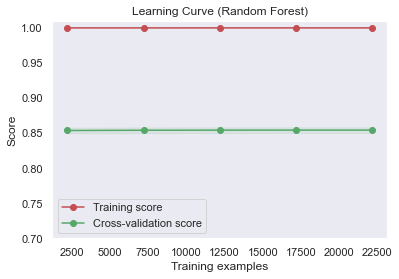

In [448]:
from sklearn.ensemble import RandomForestClassifier
model_rb = RandomForestClassifier(random_state=0)
plot_learning_curve(model_rb, 'Learning Curve (Random Forest)', X_scaled_train, y_train, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

 8.4. Undersampling i oversampling classification

In [449]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [450]:
model = RandomForestClassifier(n_estimators= 600,min_samples_split= 10, min_samples_leaf = 1,
                                       max_leaf_nodes= 3,max_features= 'auto',max_depth= 7)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]

In [451]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
X_scaled_train, y_train = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
model = RandomForestClassifier(n_estimators= 600,min_samples_split= 10, min_samples_leaf = 1,
                                       max_leaf_nodes= 3,max_features= 'auto',max_depth= 7)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_scaled_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.916


 Ostateczny model po optymalizacji osiągnął wynik ROC AUC w wysokości 0,916, co oznacza, że finalny model jest w stanie w ponad 91% przewidzieć czy dany pożyczkobiorca spłaci swoje zobowiązanie czy nie.

In [452]:
model.fit(X_scaled_train, y_train)

RandomForestClassifier(max_depth=7, max_features='auto', max_leaf_nodes=3,
                       min_samples_split=10, n_estimators=600)

 8.5. Wyznaczenie krzywej ROC

In [453]:
import sklearn.metrics as metrics
preds=probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'probs' is not defined